# Ekstraksi Zoning 3 Zona dengan 135 Data

## Import Library 

In [1]:
import os
import cv2
import numpy as np
import math
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
from skimage import io, color
import seaborn as sns

## Training

### Preprocessing

#### Load Data Training

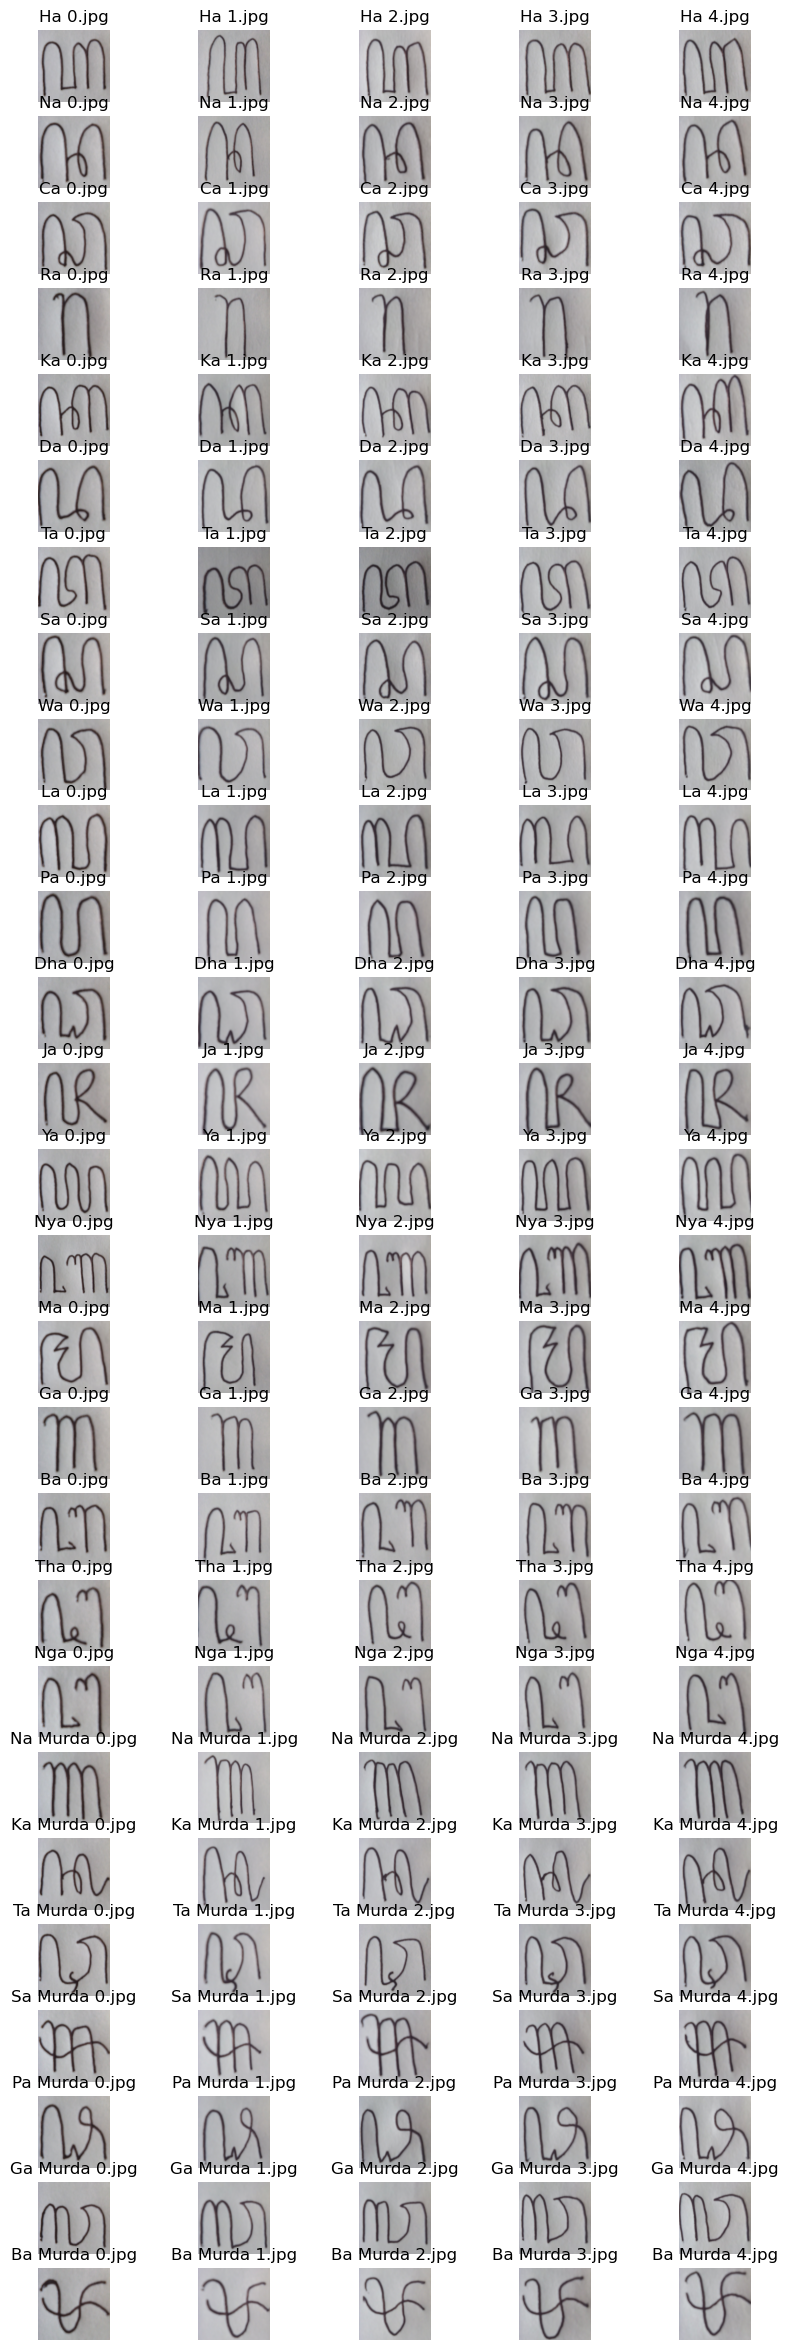

In [69]:
i = 0
k = 0
images = []
name = np.empty(135, dtype=object)
root_folder = 'Data Training 1'
subfolders = ['Ha', 'Na', 'Ca', 'Ra', 'Ka', 'Da', 'Ta', 'Sa', 'Wa', 
              'La', 'Pa', 'Dha', 'Ja','Ya', 'Nya', 'Ma', 'Ga', 'Ba', 
              'Tha', 'Nga', 'Na Murda', 'Ka Murda', 'Ta Murda', 'Sa Murda', 'Pa Murda', 'Ga Murda', 'Ba Murda']
fig, axs = plt.subplots(nrows = 27, ncols = 5, figsize = (10,30))
axs = axs.flatten()

for subfolder in subfolders:
    subfolder_path = os.path.join(root_folder, subfolder)
    
    for file in os.listdir(subfolder_path):
        if file.lower().endswith(('.jpg')):
            image_path = os.path.join(subfolder_path, file)
            image = Image.open(image_path)
            images.append(image)
            axs[i].imshow(image)
            axs[i].axis('off')
            filename = os.path.basename(file)
            name[i] = filename
            axs[i].set_title(filename)
            i += 1
            
plt.show() 

#### Resize Data Training

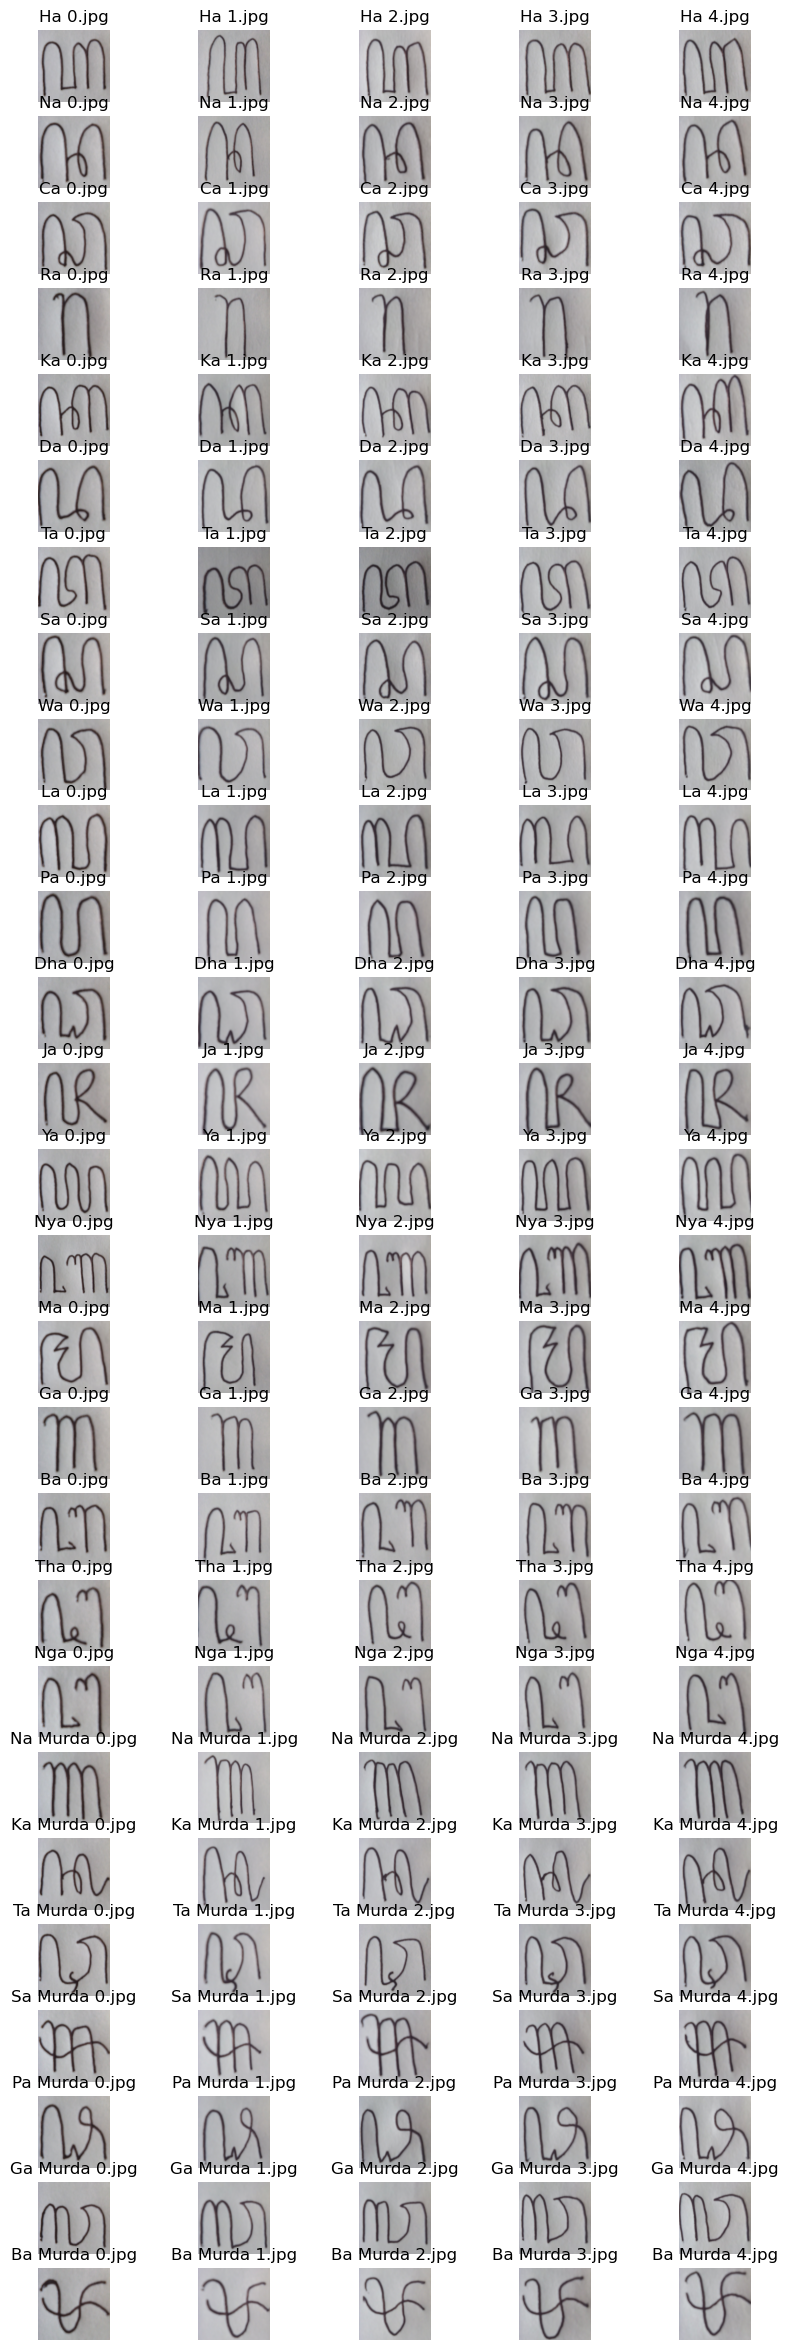

In [70]:
i = 0
resized_images = []
fig, axs = plt.subplots(nrows = 27, ncols = 5, figsize = (10,30))
axs = axs.flatten()

for image in images:
    resized_image = image.resize((120, 120))
    resized_images.append(resized_image)
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(name[i])
    i += 1

plt.show()

#### Grayscale Data Training

In [71]:
grayscale_images = []
for image in resized_images:
    width, height = image.size
    grayscale_img = Image.new("L", (width, height))
        
    for x in range(width):
            
        for y in range(height):
            r, g, b = image.getpixel((x, y))
            brightness = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
            grayscale_img.putpixel((x, y), brightness)
            
    grayscale_images.append(grayscale_img)

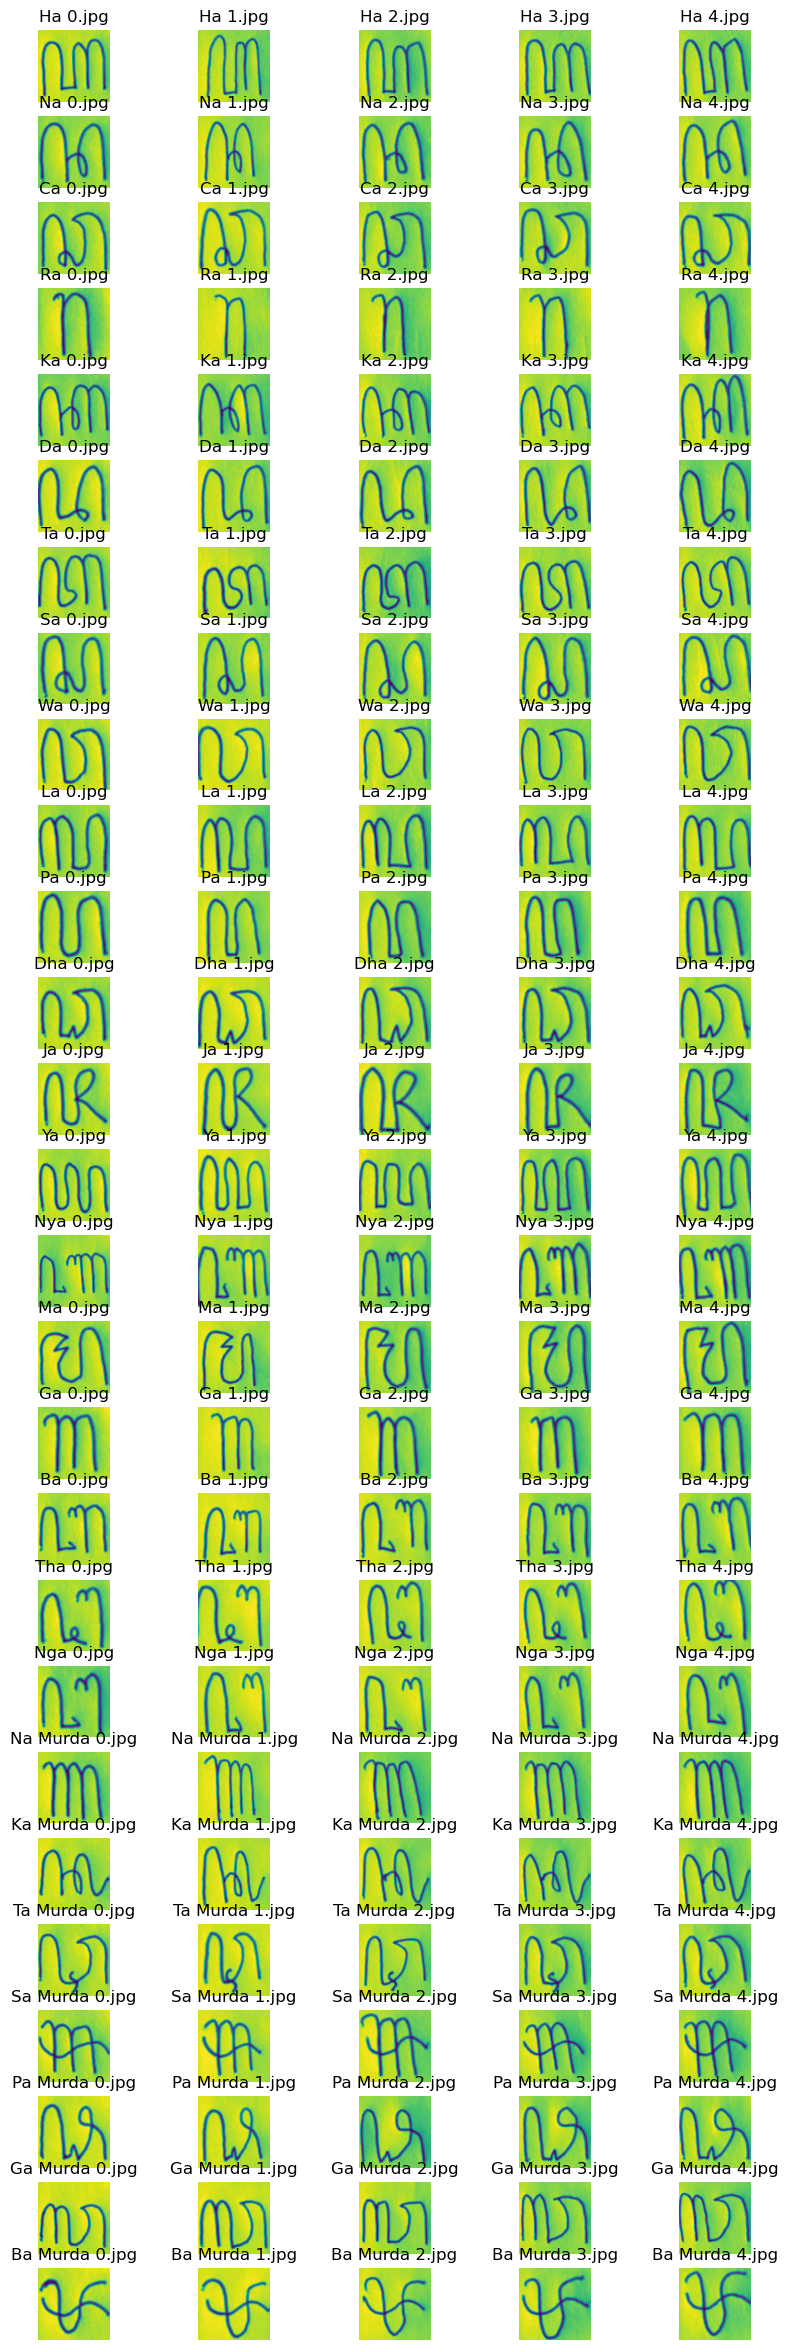

In [72]:
i = 0
fig, axs = plt.subplots(nrows = 27, ncols = 5, figsize = (10,30))
axs = axs.flatten()

for image in grayscale_images:
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(name[i])
    i += 1
    
plt.show()

#### Sauvola Threshold Data Training

In [73]:
k = 0.2
R = 128
threshold_images = []

for image in grayscale_images:
    image = image.rotate(270)
    image = image.transpose(method=Image.FLIP_LEFT_RIGHT)
    img_array = np.array(image)
    width, height = image.size
    binary_img = Image.new("1", (width, height))
        
    for x in range(width):
            
        for y in range(height):
            window = img_array[max(x-15, 0):min(x+15, width), max(y-15, 0):min(y+15, height)]
            mean = np.mean(window)
            stddev = np.std(window)
            threshold = mean * (1 + k * ((stddev / R) - 1))
                
            if img_array[x, y] > threshold:
                binary_img.putpixel((x, y), 0)
            else:
                binary_img.putpixel((x, y), 255)
    
    threshold_images.append(binary_img)

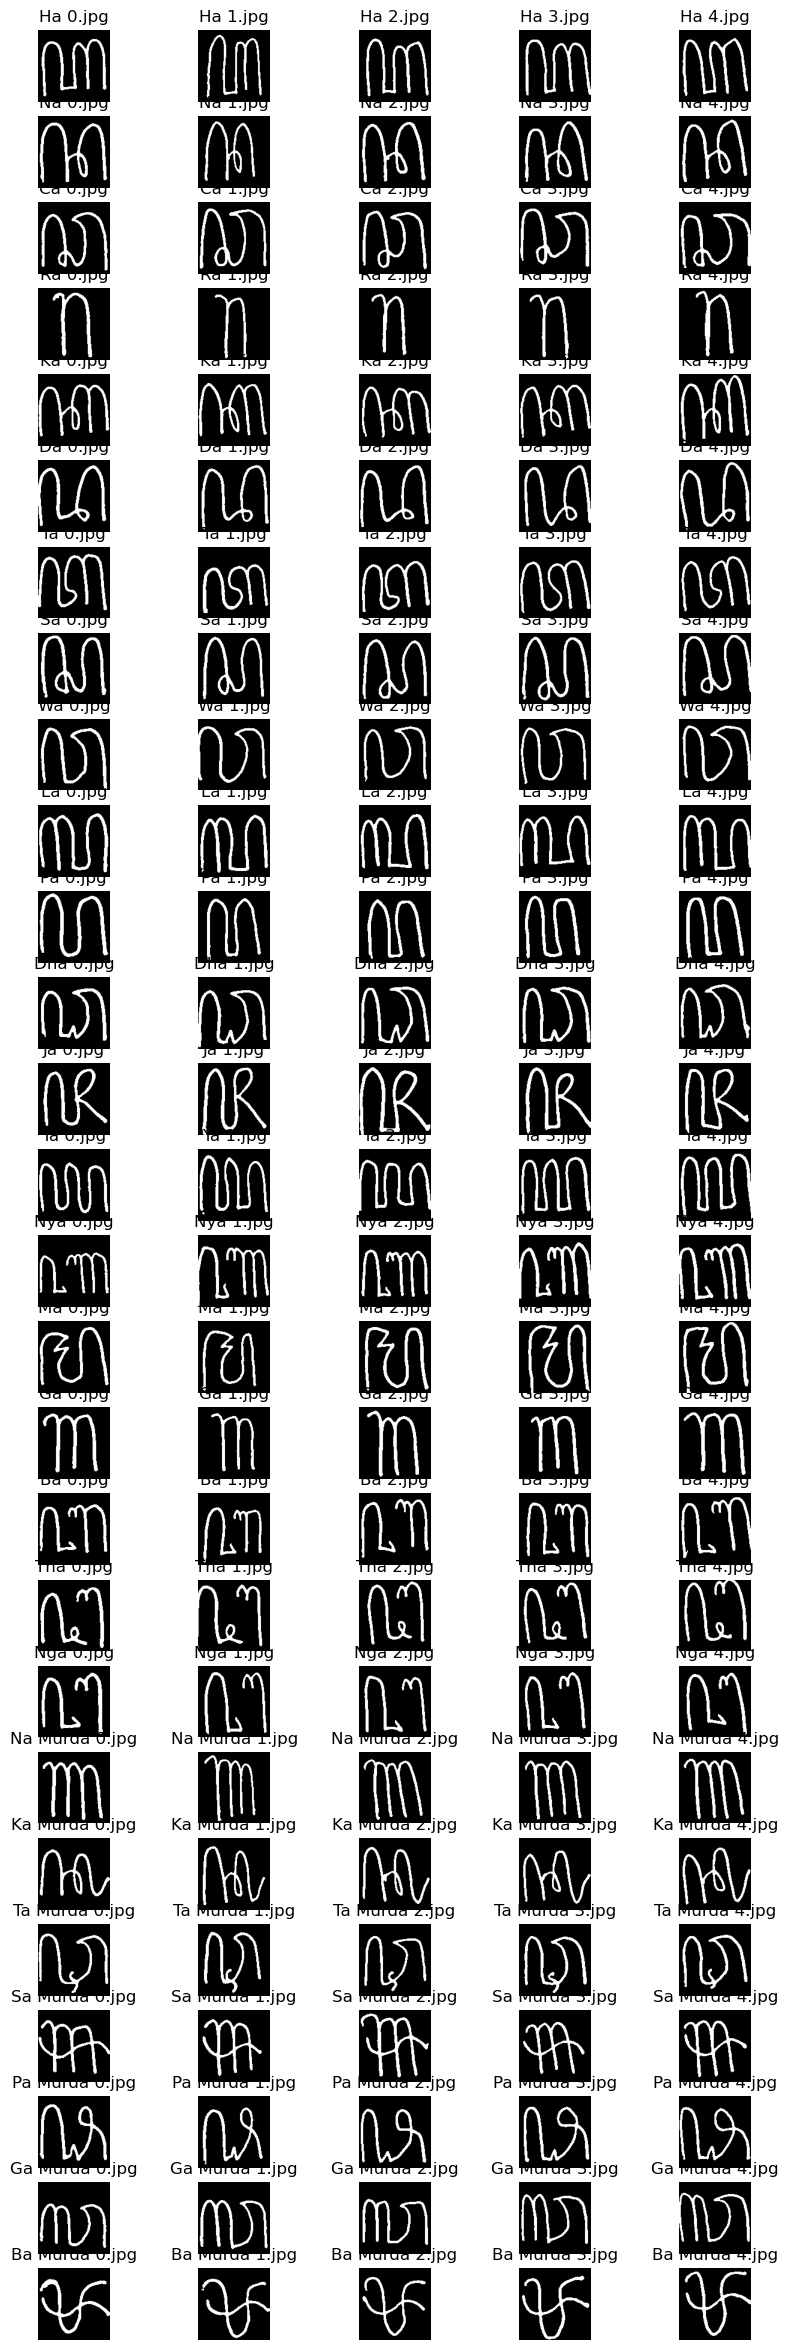

In [74]:
i = 0
fig, axs = plt.subplots(nrows = 27, ncols = 5, figsize = (10,30))
axs = axs.flatten()

for image in threshold_images:
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(name[i])
    i += 1
    
plt.show()

### Ekstraksi Zoning ICZ dan ZCZ 

#### Ekstraksi Zoning

In [8]:
i = 0
k = 0
array_ekstraksi = np.zeros((len(threshold_images), 6))
array_ngelegena = np.zeros((100, 6))
centroid = np.zeros((len(threshold_images), 8))
array_murda =  np.zeros((35, 6))

for image in threshold_images:
    width, height = image.size
    zone_height = height // 3
    zone1 = image.crop((0, 0, width, zone_height))
    zone2 = image.crop((0, zone_height, width, zone_height * 2))
    zone3 = image.crop((0, zone_height * 2, width, height))
    
    img_array = np.array(image)
    img_zone1 = np.array(zone1)
    img_zone2 = np.array(zone2)
    img_zone3 = np.array(zone3)
    total_pixel = np.sum(img_array)
    total_zone1 = np.sum(img_zone1)
    total_zone2 = np.sum(img_zone2)
    total_zone3 = np.sum(img_zone3)
    
    kolom = 0
    baris = 0
    kolom_zone1 = 0
    kolom_zone2 = 0
    kolom_zone3 = 0
    baris_zone1 = 0
    baris_zone2 = 0
    baris_zone3 = 0
    sum_kolom = 0
    sum_baris = 0
    sumkolom_zone1 = 0
    sumkolom_zone2 = 0
    sumkolom_zone3 = 0
    sumbaris_zone1 = 0
    sumbaris_zone2 = 0
    sumbaris_zone3 = 0
    sumiczzone1 = 0
    sumiczzone2 = 0
    sumiczzone3 = 0
    sumzczzone1 = 0
    sumzczzone2 = 0
    sumzczzone3 = 0
    
    for x in range(width):
    
        for y in range(height):
            kolom += img_array[y][x]
            baris += img_array[x][y]
    
        sum_kolom += kolom * (x + 1)  
        sum_baris += baris * (x + 1)
            
        kolom = 0
        baris = 0
        
    for x in range(len(img_zone1)):
            
        for y in range(len(img_zone1[x])):
            baris_zone1 += img_zone1[x][y]
            baris_zone2 += img_zone2[x][y]
            baris_zone3 += img_zone3[x][y]

        sumbaris_zone1 += baris_zone1 * (x + 1)
        sumbaris_zone2 += baris_zone2 * (x + 1)
        sumbaris_zone3 += baris_zone3 * (x + 1)

        baris_zone1 = 0
        baris_zone2 = 0
        baris_zone3 = 0
            
    for x in range(len(img_zone1[0])):
            
        for y in range(len(img_zone1)):
            kolom_zone1 += img_zone1[y][x]
            kolom_zone2 += img_zone2[y][x]    
            kolom_zone3 += img_zone3[y][x]
                
        sumkolom_zone1 += kolom_zone1 * (x + 1)  
        sumkolom_zone2 += kolom_zone2 * (x + 1)  
        sumkolom_zone3 += kolom_zone3 * (x + 1)  
            
        kolom_zone1 = 0
        kolom_zone2 = 0
        kolom_zone3 = 0
            
    centroid_x = sum_kolom / total_pixel
    centroid_y = sum_baris / total_pixel
        
    centroidx_zone1 = sumkolom_zone1 / total_zone1
    centroidx_zone2 = sumkolom_zone2 / total_zone2
    centroidx_zone3 = sumkolom_zone3 / total_zone3
        
    centroidy_zone1 = sumbaris_zone1 / total_zone1
    centroidy_zone2 = sumbaris_zone2 / total_zone2
    centroidy_zone3 = sumbaris_zone3 / total_zone3
    
    centroid[i] = [centroid_x, centroid_y, centroidx_zone1, centroidx_zone2, centroidx_zone3, centroidy_zone1, centroidy_zone2, centroidy_zone3]
    
    if math.isnan(centroidx_zone1) and math.isnan(centroidy_zone1):
        centroidx_zone1 = 0
        centroidy_zone1 = 0
        
    if math.isnan(centroidx_zone2) and math.isnan(centroidy_zone2):
        centroidx_zone2 = 0
        centroidy_zone2 = 0
        
    if math.isnan(centroidx_zone3) and math.isnan(centroidy_zone3):
        centroidx_zone3 = 0
        centroidy_zone3 = 0
    
    for x in range(len(img_zone1)):
            
        for y in range(len(img_zone1[0])):
            if img_zone1[x][y] == True:
                sumiczzone1 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone1 += math.sqrt(pow(((y+1) - centroidx_zone1), 2) + pow(((x+1) - centroidy_zone1), 2))
                
            if img_zone2[x][y] == True:
                sumiczzone2 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone2 += math.sqrt(pow(((y+1) - centroidx_zone2), 2) + pow(((x+1) - centroidy_zone2), 2))
                
            if img_zone3[x][y] == True:
                sumiczzone3 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone3 += math.sqrt(pow(((y+1) - centroidx_zone3), 2) + pow(((x+1) - centroidy_zone3), 2))
                    
    iczzone1 = sumiczzone1 / total_zone1
    iczzone2 = sumiczzone2 / total_zone2
    iczzone3 = sumiczzone3 / total_zone3
        
    zczzone1 = sumzczzone1 / total_zone1
    zczzone2 = sumzczzone2 / total_zone2
    zczzone3 = sumzczzone3 / total_zone3
    
    if math.isnan(iczzone1) and math.isnan(zczzone1):
        iczzone1 = 0
        zczzone1 = 0
        
    if math.isnan(iczzone2) and math.isnan(zczzone2):
        iczzone2 = 0
        zczzone2 = 0    
     
    if math.isnan(iczzone3) and math.isnan(zczzone3):
        iczzone3 = 0
        zczzone3 = 0
    
    array_ekstraksi[i] = [iczzone1, iczzone2, iczzone3, zczzone1, zczzone2, zczzone3]
    
    if i < 100:
        array_ngelegena[i] = [iczzone1, iczzone2, iczzone3, zczzone1, zczzone2, zczzone3]
    else:
        array_murda[k] = [iczzone1, iczzone2, iczzone3, zczzone1, zczzone2, zczzone3]
        k += 1
        
    print("Nama File : ", name[i])
    print("Centroid Citra: ({}, {})".format(centroid_x, centroid_y))
    print("Centroid Zona 1: ({}, {})".format(centroidx_zone1, centroidy_zone1))
    print("Centroid Zona 2: ({}, {})".format(centroidx_zone2, centroidy_zone2))
    print("Centroid Zona 3: ({}, {})".format(centroidx_zone3, centroidy_zone3))
    print("Ekstraksi ICZ: ({}, {}, {})".format(iczzone1, iczzone2, iczzone3))
    print("Ekstraksi ZCZ: ({}, {}, {})".format(zczzone1, zczzone2, zczzone3))
    print("\n")
        
    i += 1
    
df = pd.DataFrame(array_ekstraksi)
df.to_excel('3 Zona(1).xlsx', index=False)

Nama File :  Ha 0.jpg
Centroid Citra: (60.39644693782141, 59.670874240299206)
Centroid Zona 1: (62.64050235478807, 28.4850863422292)
Centroid Zona 2: (60.959606986899566, 20.435589519650655)
Centroid Zona 3: (57.07679180887372, 12.37542662116041)
Ekstraksi ICZ: (44.153161163580066, 51.753110769935546, 57.82012831797812)
Ekstraksi ZCZ: (29.428698778312725, 32.5528362440576, 29.539964597093338)


Nama File :  Ha 1.jpg
Centroid Citra: (60.41507430997877, 60.5291932059448)
Centroid Zona 1: (61.69439728353141, 25.97623089983022)
Centroid Zona 2: (60.06276150627615, 20.552301255230127)
Centroid Zona 3: (59.548442906574394, 15.711072664359861)
Ekstraksi ICZ: (43.08967927352705, 49.06256612192316, 53.289400977355385)
Ekstraksi ZCZ: (24.942256951107, 28.03052736189533, 26.81586948417416)


Nama File :  Ha 2.jpg
Centroid Citra: (61.50235404896422, 62.54566854990584)
Centroid Zona 1: (61.29441624365482, 29.023688663282574)
Centroid Zona 2: (61.90919540229885, 20.631034482758622)
Centroid Zona 3: 

Nama File :  Ka 2.jpg
Centroid Citra: (62.034412955465584, 62.031882591093115)
Centroid Zona 1: (58.937365010799134, 31.77753779697624)
Centroid Zona 2: (62.39581256231306, 21.37088733798604)
Centroid Zona 3: (64.13529411764706, 10.798039215686275)
Ekstraksi ICZ: (43.08164401356911, 52.366382056068765, 61.93536248224299)
Ekstraksi ZCZ: (28.986960000544705, 31.528964188379174, 31.270172057952575)


Nama File :  Ka 3.jpg
Centroid Citra: (60.070996978851966, 58.34541792547835)
Centroid Zona 1: (62.72370766488414, 29.221033868092693)
Centroid Zona 2: (60.54780876494024, 21.568725099601593)
Centroid Zona 3: (55.39904988123516, 9.46793349168646)
Ekstraksi ICZ: (42.590647387043866, 49.79902788646539, 60.37557040146035)
Ekstraksi ZCZ: (28.88076667401701, 32.199776769793566, 31.854192499317147)


Nama File :  Ka 4.jpg
Centroid Citra: (61.28823981552652, 57.01575710991545)
Centroid Zona 1: (65.56286721504112, 23.705052878965923)
Centroid Zona 2: (59.63023679417122, 21.487249544626593)
Centroid Z

Nama File :  Wa 4.jpg
Centroid Citra: (62.32369355657027, 56.072552004058856)
Centroid Zona 1: (59.481944444444444, 25.383333333333333)
Centroid Zona 2: (64.6216577540107, 20.684491978609625)
Centroid Zona 3: (62.97415506958251, 13.14314115308151)
Ekstraksi ICZ: (44.940108002402276, 53.21666003054166, 54.44190474885657)
Ekstraksi ZCZ: (30.832633092446162, 39.395458389998886, 30.71941004737677)


Nama File :  La 0.jpg
Centroid Citra: (61.345454545454544, 62.42878787878788)
Centroid Zona 1: (59.199203187250994, 28.051792828685258)
Centroid Zona 2: (60.174119885823025, 20.451950523311133)
Centroid Zona 3: (64.7511961722488, 15.87799043062201)
Ekstraksi ICZ: (48.712058677738945, 55.94544581387653, 57.512924972915236)
Ekstraksi ZCZ: (32.999962134779956, 35.46691486784903, 31.570716292018837)


Nama File :  La 1.jpg
Centroid Citra: (58.55104501607717, 65.38585209003216)
Centroid Zona 1: (59.51428571428571, 29.584126984126986)
Centroid Zona 2: (57.75555555555555, 20.84949494949495)
Centroid Z

Nama File :  Ya 1.jpg
Centroid Citra: (54.38836153528683, 60.31820057779612)
Centroid Zona 1: (50.032485875706215, 26.96045197740113)
Centroid Zona 2: (55.40457256461232, 20.756461232604373)
Centroid Zona 3: (57.296191819464035, 13.007052186177715)
Ekstraksi ICZ: (45.77697273712562, 51.959538057933386, 57.99026244638309)
Ekstraksi ZCZ: (28.913723406122273, 32.57374370257985, 30.666680736195513)


Nama File :  Ya 2.jpg
Centroid Citra: (58.36666666666667, 60.57911111111111)
Centroid Zona 1: (54.736227045075125, 30.40567612687813)
Centroid Zona 2: (59.654875717017205, 20.552581261950287)
Centroid Zona 3: (59.73388429752066, 10.499173553719007)
Ekstraksi ICZ: (45.154756381324106, 54.18067697178982, 62.03400726406449)
Ekstraksi ZCZ: (31.134241470061703, 35.351444185260384, 33.56042817716964)


Nama File :  Ya 3.jpg
Centroid Citra: (60.207265774378584, 61.398470363288716)
Centroid Zona 1: (61.53532608695652, 27.61413043478261)
Centroid Zona 2: (59.88663594470046, 20.65714285714286)
Centroid 

Nama File :  Ba 3.jpg
Centroid Citra: (66.40941512125535, 58.84450784593438)
Centroid Zona 1: (66.45264623955431, 27.58356545961003)
Centroid Zona 2: (66.92268041237114, 20.873711340206185)
Centroid Zona 3: (65.70443349753694, 13.114942528735632)
Ekstraksi ICZ: (43.136777802121806, 52.982413971166665, 56.80230294305297)
Ekstraksi ZCZ: (27.71684603152679, 36.79929888824773, 31.013114843630856)


Nama File :  Ba 4.jpg
Centroid Citra: (60.07887323943662, 54.249765258215966)
Centroid Zona 1: (66.46153846153847, 24.096153846153847)
Centroid Zona 2: (62.15796344647519, 20.22976501305483)
Centroid Zona 3: (47.10338345864662, 12.796992481203008)
Ekstraksi ICZ: (44.8960075994322, 54.22726452605201, 53.18681700171656)
Ekstraksi ZCZ: (29.924310623141125, 42.04924273411149, 27.231366172948345)


Nama File :  Tha 0.jpg
Centroid Citra: (59.62675101671938, 65.36195210122007)
Centroid Zona 1: (65.31181102362204, 27.97007874015748)
Centroid Zona 2: (52.407988587731815, 20.495007132667617)
Centroid Zona

Nama File :  Ta Murda 0.jpg
Centroid Citra: (60.225300575013065, 60.82070047046524)
Centroid Zona 1: (58.19458544839255, 28.106598984771573)
Centroid Zona 2: (60.821576763485474, 20.723374827109268)
Centroid Zona 3: (61.509181969949914, 13.215358931552588)
Ekstraksi ICZ: (48.97276404911773, 58.34586008280681, 54.6459051594189)
Ekstraksi ZCZ: (35.446782140705146, 42.2405103118324, 23.961896378836038)


Nama File :  Ta Murda 1.jpg
Centroid Citra: (53.29119170984456, 59.3699481865285)
Centroid Zona 1: (53.87128712871287, 26.308580858085808)
Centroid Zona 2: (53.701550387596896, 21.448320413436694)
Centroid Zona 3: (52.07454545454546, 12.872727272727273)
Ekstraksi ICZ: (42.77375052542284, 49.10288423141738, 51.679430086183686)
Ekstraksi ZCZ: (26.39893647744323, 31.492161812350215, 20.35821387808596)


Nama File :  Ta Murda 2.jpg
Centroid Citra: (56.380610412926394, 62.661280670257334)
Centroid Zona 1: (57.85129310344828, 30.424568965517242)
Centroid Zona 2: (58.51282051282051, 20.463046757

Nama File :  Ba Murda 1.jpg
Centroid Citra: (61.058347775852106, 63.513575967648755)
Centroid Zona 1: (52.911832946635734, 28.336426914153133)
Centroid Zona 2: (62.650496141124584, 24.492833517089306)
Centroid Zona 3: (66.31806615776081, 19.83206106870229)
Ekstraksi ICZ: (49.69933852007355, 48.10796213997284, 45.799602242838375)
Ekstraksi ZCZ: (32.70553963021306, 27.639051777664445, 16.562148437744476)


Nama File :  Ba Murda 2.jpg
Centroid Citra: (56.20650813516896, 59.947434292866085)
Centroid Zona 1: (54.42403628117914, 26.573696145124718)
Centroid Zona 2: (55.66987951807229, 22.67831325301205)
Centroid Zona 3: (59.972477064220186, 18.02446483180428)
Ekstraksi ICZ: (47.20053681403171, 45.936831740487, 43.65803580526511)
Ekstraksi ZCZ: (33.116552160025726, 26.634237265350478, 14.860417074848389)


Nama File :  Ba Murda 3.jpg
Centroid Citra: (57.120959332638165, 62.161105318039624)
Centroid Zona 1: (59.5796178343949, 25.038216560509554)
Centroid Zona 2: (56.787298387096776, 21.8145161

In [9]:
df = pd.read_excel("3 Zona(1).xlsx")
df

0          1          2          3          4          5
0    44.153161  51.753111  57.820128  29.428699  32.552836  29.539965
1    43.089679  49.062566  53.289401  24.942257  28.030527  26.815869
2    44.841347  52.741888  57.347094  28.600959  30.976555  29.328825
3    44.195509  52.793922  58.871563  28.896923  32.393348  32.323491
4    43.951972  51.481165  55.818371  27.937561  31.465354  28.741004
..         ...        ...        ...        ...        ...        ...
130  48.332943  46.918260  46.096979  35.659439  29.673585  14.098962
131  49.699339  48.107962  45.799602  32.705540  27.639052  16.562148
132  47.200537  45.936832  43.658036  33.116552  26.634237  14.860417
133  48.241613  49.945729  43.169335  30.830177  29.123059  18.013465
134  45.022327  45.571934  38.123278  29.782016  27.446440  14.873856

[135 rows x 6 columns]

#### Kelas Tiap Data 

In [10]:
ngelegena = np.empty(100, dtype=object)
murda = np.empty(35, dtype=object)
k = 0

for i in range(len(name)):
    if i >= 100:
        name[i] = name[i][:8]
        murda[k] = name[i][:8]
        k += 1
    elif 55 <= i <= 59 or 70 <= i <= 74 or 90 <= i <= 99:
        name[i] = name[i][:3]
        ngelegena[i] = name[i][:3]
    else:
        name[i] = name[i][:2]
        ngelegena[i] = name[i][:2]
        
print(name)

['Ha' 'Ha' 'Ha' 'Ha' 'Ha' 'Na' 'Na' 'Na' 'Na' 'Na' 'Ca' 'Ca' 'Ca' 'Ca'
 'Ca' 'Ra' 'Ra' 'Ra' 'Ra' 'Ra' 'Ka' 'Ka' 'Ka' 'Ka' 'Ka' 'Da' 'Da' 'Da'
 'Da' 'Da' 'Ta' 'Ta' 'Ta' 'Ta' 'Ta' 'Sa' 'Sa' 'Sa' 'Sa' 'Sa' 'Wa' 'Wa'
 'Wa' 'Wa' 'Wa' 'La' 'La' 'La' 'La' 'La' 'Pa' 'Pa' 'Pa' 'Pa' 'Pa' 'Dha'
 'Dha' 'Dha' 'Dha' 'Dha' 'Ja' 'Ja' 'Ja' 'Ja' 'Ja' 'Ya' 'Ya' 'Ya' 'Ya' 'Ya'
 'Nya' 'Nya' 'Nya' 'Nya' 'Nya' 'Ma' 'Ma' 'Ma' 'Ma' 'Ma' 'Ga' 'Ga' 'Ga'
 'Ga' 'Ga' 'Ba' 'Ba' 'Ba' 'Ba' 'Ba' 'Tha' 'Tha' 'Tha' 'Tha' 'Tha' 'Nga'
 'Nga' 'Nga' 'Nga' 'Nga' 'Na Murda' 'Na Murda' 'Na Murda' 'Na Murda'
 'Na Murda' 'Ka Murda' 'Ka Murda' 'Ka Murda' 'Ka Murda' 'Ka Murda'
 'Ta Murda' 'Ta Murda' 'Ta Murda' 'Ta Murda' 'Ta Murda' 'Sa Murda'
 'Sa Murda' 'Sa Murda' 'Sa Murda' 'Sa Murda' 'Pa Murda' 'Pa Murda'
 'Pa Murda' 'Pa Murda' 'Pa Murda' 'Ga Murda' 'Ga Murda' 'Ga Murda'
 'Ga Murda' 'Ga Murda' 'Ba Murda' 'Ba Murda' 'Ba Murda' 'Ba Murda'
 'Ba Murda']


### Training SVM 

#### Membangun Model Kelas untuk Binary Class

In [11]:
model = np.column_stack((array_ekstraksi, name))

for i in range (len(model)):
    if i >= 100:
        model[i][6] = -1
    else:
        model[i][6] = 1 

print(model)

[[44.153161163580066 51.753110769935546 57.82012831797812
  29.428698778312725 32.5528362440576 29.539964597093338 1]
 [43.08967927352705 49.06256612192316 53.289400977355385 24.942256951107
  28.03052736189533 26.81586948417416 1]
 [44.841346987023655 52.74188798856909 57.34709443098842
  28.600959264145544 30.97655471367319 29.328825127824008 1]
 [44.195508697828174 52.79392234039391 58.87156272967595
  28.896922873704543 32.3933475378931 32.32349076162158 1]
 [43.95197161477415 51.48116468009357 55.81837123934267 27.93756134654326
  31.465353792704168 28.74100437563459 1]
 [48.89301965847709 50.87689173253125 58.214750576976556
  33.18190007467742 31.39781148080228 32.069962073092825 1]
 [40.59394616345013 44.58730519839997 53.96431792744268
  23.090133471033795 24.141260179695998 25.529300028797852 1]
 [47.008378382309516 49.38890403713014 58.24305551806023
  30.842267341894075 29.346978426040977 31.93457406312839 1]
 [46.71899830421833 51.24777282801737 59.85129635994057
  28.7933

#### Membangun Model Kelas untuk MultiClass

In [12]:
model_ha = np.column_stack((array_ngelegena, ngelegena))
model_na = np.column_stack((array_ngelegena, ngelegena))
model_ca = np.column_stack((array_ngelegena, ngelegena))
model_ra = np.column_stack((array_ngelegena, ngelegena))
model_ka = np.column_stack((array_ngelegena, ngelegena))
model_da = np.column_stack((array_ngelegena, ngelegena))
model_ta = np.column_stack((array_ngelegena, ngelegena))
model_sa = np.column_stack((array_ngelegena, ngelegena))
model_wa = np.column_stack((array_ngelegena, ngelegena))
model_la = np.column_stack((array_ngelegena, ngelegena))
model_pa = np.column_stack((array_ngelegena, ngelegena))
model_dha = np.column_stack((array_ngelegena, ngelegena))
model_ja = np.column_stack((array_ngelegena, ngelegena))
model_ya = np.column_stack((array_ngelegena, ngelegena))
model_nya = np.column_stack((array_ngelegena, ngelegena))
model_ma = np.column_stack((array_ngelegena, ngelegena))
model_ga = np.column_stack((array_ngelegena, ngelegena))
model_ba = np.column_stack((array_ngelegena, ngelegena))
model_tha = np.column_stack((array_ngelegena, ngelegena))
model_nga = np.column_stack((array_ngelegena, ngelegena))
model_namurda = np.column_stack((array_murda, murda))
model_kamurda = np.column_stack((array_murda, murda))
model_tamurda = np.column_stack((array_murda, murda))
model_samurda = np.column_stack((array_murda, murda))
model_pamurda = np.column_stack((array_murda, murda))
model_gamurda = np.column_stack((array_murda, murda))
model_bamurda = np.column_stack((array_murda, murda))

print("MODEL HA \n", model_ha, "\n")
print("MODEL NA MURDA \n", model_namurda)

MODEL HA 
 [[44.153161163580066 51.753110769935546 57.82012831797812
  29.428698778312725 32.5528362440576 29.539964597093338 'Ha']
 [43.08967927352705 49.06256612192316 53.289400977355385 24.942256951107
  28.03052736189533 26.81586948417416 'Ha']
 [44.841346987023655 52.74188798856909 57.34709443098842
  28.600959264145544 30.97655471367319 29.328825127824008 'Ha']
 [44.195508697828174 52.79392234039391 58.87156272967595
  28.896922873704543 32.3933475378931 32.32349076162158 'Ha']
 [43.95197161477415 51.48116468009357 55.81837123934267 27.93756134654326
  31.465353792704168 28.74100437563459 'Ha']
 [48.89301965847709 50.87689173253125 58.214750576976556
  33.18190007467742 31.39781148080228 32.069962073092825 'Na']
 [40.59394616345013 44.58730519839997 53.96431792744268
  23.090133471033795 24.141260179695998 25.529300028797852 'Na']
 [47.008378382309516 49.38890403713014 58.24305551806023
  30.842267341894075 29.346978426040977 31.93457406312839 'Na']
 [46.71899830421833 51.2477728

In [13]:
for i in range (len(model_ha)):
    if model_ha[i][6] == 'Ha':
        model_ha[i][6] = 1
    else:
        model_ha[i][6] = -1

for i in range(len(model_na)):
    if model_na[i][6] == 'Na':
        model_na[i][6] = 1
    else:
        model_na[i][6] = -1
                         
for i in range (len(model_ca)):
    if model_ca[i][6] == 'Ca':
        model_ca[i][6] = 1
    else:
        model_ca[i][6] = -1

for i in range(len(model_ra)):
    if model_ra[i][6] == 'Ra':
        model_ra[i][6] = 1
    else:
        model_ra[i][6] = -1
        
for i in range (len(model_ka)):
    if model_ka[i][6] == 'Ka':
        model_ka[i][6] = 1
    else:
        model_ka[i][6] = -1

for i in range(len(model_da)):
    if model_da[i][6] == 'Da':
        model_da[i][6] = 1
    else:
        model_da[i][6] = -1
        
for i in range (len(model_ta)):
    if model_ta[i][6] == 'Ta':
        model_ta[i][6] = 1
    else:
        model_ta[i][6] = -1

for i in range(len(model_sa)):
    if model_sa[i][6] == 'Sa':
        model_sa[i][6] = 1
    else:
        model_sa[i][6] = -1        
        
for i in range (len(model_wa)):
    if model_wa[i][6] == 'Wa':
        model_wa[i][6] = 1
    else:
        model_wa[i][6] = -1

for i in range(len(model_la)):
    if model_la[i][6] == 'La':
        model_la[i][6] = 1
    else:
        model_la[i][6] = -1
                         
for i in range (len(model_pa)):
    if model_pa[i][6] == 'Pa':
        model_pa[i][6] = 1
    else:
        model_pa[i][6] = -1

for i in range(len(model_dha)):
    if model_dha[i][6] == 'Dha':
        model_dha[i][6] = 1
    else:
        model_dha[i][6] = -1
        
for i in range (len(model_ja)):
    if model_ja[i][6] == 'Ja':
        model_ja[i][6] = 1
    else:
        model_ja[i][6] = -1

for i in range(len(model_ya)):
    if model_ya[i][6] == 'Ya':
        model_ya[i][6] = 1
    else:
        model_ya[i][6] = -1
        
for i in range (len(model_nya)):
    if model_nya[i][6] == 'Nya':
        model_nya[i][6] = 1
    else:
        model_nya[i][6] = -1

for i in range(len(model_ma)):
    if model_ma[i][6] == 'Ma':
        model_ma[i][6] = 1
    else:
        model_ma[i][6] = -1
        
for i in range (len(model_ga)):
    if model_ga[i][6] == 'Ga':
        model_ga[i][6] = 1
    else:
        model_ga[i][6] = -1

for i in range(len(model_ba)):
    if model_ba[i][6] == 'Ba':
        model_ba[i][6] = 1
    else:
        model_ba[i][6] = -1
                         
for i in range (len(model_tha)):
    if model_tha[i][6] == 'Tha':
        model_tha[i][6] = 1
    else:
        model_tha[i][6] = -1

for i in range(len(model_nga)):
    if model_nga[i][6] == 'Nga':
        model_nga[i][6] = 1
    else:
        model_nga[i][6] = -1
        
for i in range (len(model_namurda)):
    if model_namurda[i][6] == 'Na Murda':
        model_namurda[i][6] = 1
    else:
        model_namurda[i][6] = -1

for i in range(len(model_kamurda)):
    if model_kamurda[i][6] == 'Ka Murda':
        model_kamurda[i][6] = 1
    else:
        model_kamurda[i][6] = -1
        
for i in range (len(model_tamurda)):
    if model_tamurda[i][6] == 'Ta Murda':
        model_tamurda[i][6] = 1
    else:
        model_tamurda[i][6] = -1

for i in range(len(model_samurda)):
    if model_samurda[i][6] == 'Sa Murda':
        model_samurda[i][6] = 1
    else:
        model_samurda[i][6] = -1
        
for i in range (len(model_pamurda)):
    if model_pamurda[i][6] == 'Pa Murda':
        model_pamurda[i][6] = 1
    else:
        model_pamurda[i][6] = -1

for i in range(len(model_gamurda)):
    if model_gamurda[i][6] == 'Ga Murda':
        model_gamurda[i][6] = 1
    else:
        model_gamurda[i][6] = -1
                         
for i in range (len(model_bamurda)):
    if model_bamurda[i][6] == 'Ba Murda':
        model_bamurda[i][6] = 1
    else:
        model_bamurda[i][6] = -1     

print("MODEL HA \n", model_ha, "\n")
print("MODEL NA MURDA \n", model_namurda)

MODEL HA 
 [[44.153161163580066 51.753110769935546 57.82012831797812
  29.428698778312725 32.5528362440576 29.539964597093338 1]
 [43.08967927352705 49.06256612192316 53.289400977355385 24.942256951107
  28.03052736189533 26.81586948417416 1]
 [44.841346987023655 52.74188798856909 57.34709443098842
  28.600959264145544 30.97655471367319 29.328825127824008 1]
 [44.195508697828174 52.79392234039391 58.87156272967595
  28.896922873704543 32.3933475378931 32.32349076162158 1]
 [43.95197161477415 51.48116468009357 55.81837123934267 27.93756134654326
  31.465353792704168 28.74100437563459 1]
 [48.89301965847709 50.87689173253125 58.214750576976556
  33.18190007467742 31.39781148080228 32.069962073092825 -1]
 [40.59394616345013 44.58730519839997 53.96431792744268
  23.090133471033795 24.141260179695998 25.529300028797852 -1]
 [47.008378382309516 49.38890403713014 58.24305551806023
  30.842267341894075 29.346978426040977 31.93457406312839 -1]
 [46.71899830421833 51.24777282801737 59.8512963599

#### Kernel RBF untuk Binary Class

In [14]:
sigma = 2.1

def kernel_rbf(array_ekstraksi):
    array_rbf = np.zeros((len(array_ekstraksi), len(array_ekstraksi)))
    for i in range (len(array_rbf)):
        for j in range (len(array_rbf[i])):
            array_rbf[i, j] = math.exp(-(pow((array_ekstraksi[i][0] - array_ekstraksi[j][0]), 2)
                                        + pow((array_ekstraksi[i][1] - array_ekstraksi[j][1]), 2)
                                        + pow((array_ekstraksi[i][2] - array_ekstraksi[j][2]), 2)
                                        + pow((array_ekstraksi[i][3] - array_ekstraksi[j][3]), 2)
                                        + pow((array_ekstraksi[i][4] - array_ekstraksi[j][4]), 2)
                                        + pow((array_ekstraksi[i][5] - array_ekstraksi[j][5]), 2)) / (2 * pow(sigma, 2)))
    return array_rbf

rbf = kernel_rbf(array_ekstraksi)
print(rbf)

[[1.00000000e+00 1.63523470e-04 5.74440956e-01 ... 9.91010791e-26
  1.69452250e-19 1.24987324e-33]
 [1.63523470e-04 1.00000000e+00 9.42282580e-04 ... 4.95498601e-17
  1.07329970e-12 4.99009793e-21]
 [5.74440956e-01 9.42282580e-04 1.00000000e+00 ... 9.51896990e-25
  2.68976562e-18 1.99302545e-32]
 ...
 [9.91010791e-26 4.95498601e-17 9.51896990e-25 ... 1.00000000e+00
  1.23480116e-02 4.69287596e-03]
 [1.69452250e-19 1.07329970e-12 2.68976562e-18 ... 1.23480116e-02
  1.00000000e+00 4.13120808e-04]
 [1.24987324e-33 4.99009793e-21 1.99302545e-32 ... 4.69287596e-03
  4.13120808e-04 1.00000000e+00]]


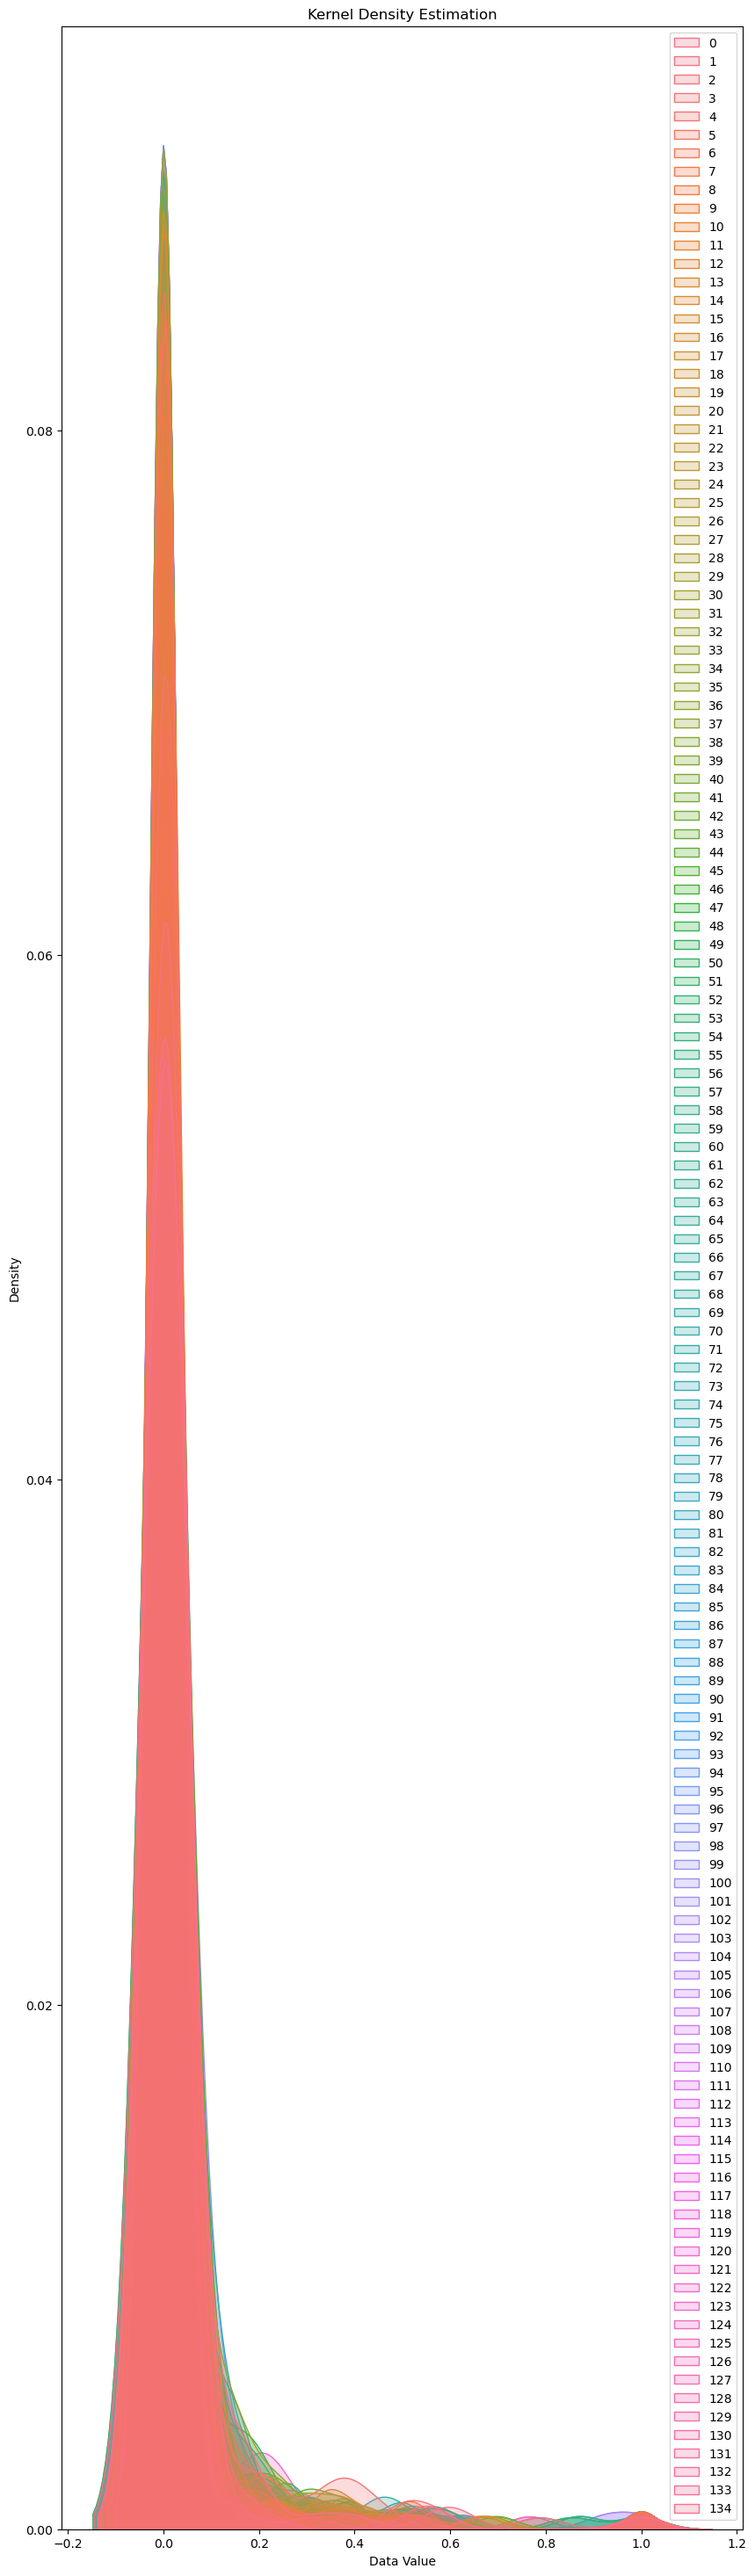

In [16]:
plt.figure(figsize=(10, 37))
sns.kdeplot(rbf, fill=True)
plt.title('Kernel Density Estimation')
plt.xlabel('Data Value')
plt.ylabel('Density')
plt.show()

#### Kernel RBF untuk Multiclass Ngelegena

In [17]:
sigma_ngelegena = 2

def ngelegena(array_ngelegena):
    array_rbf = np.zeros((len(array_ngelegena), len(array_ngelegena)))
    for i in range (len(array_rbf)):
        for j in range (len(array_rbf[i])):
            array_rbf[i, j] = math.exp(-(pow((array_ngelegena[i][0] - array_ngelegena[j][0]), 2)
                                        + pow((array_ngelegena[i][1] - array_ngelegena[j][1]), 2)
                                        + pow((array_ngelegena[i][2] - array_ngelegena[j][2]), 2)
                                        + pow((array_ngelegena[i][3] - array_ngelegena[j][3]), 2)
                                        + pow((array_ngelegena[i][4] - array_ngelegena[j][4]), 2)
                                        + pow((array_ngelegena[i][5] - array_ngelegena[j][5]), 2)) / (2 * pow(sigma_ngelegena, 2)))
    return array_rbf

rbf_ngelegena = ngelegena(array_ngelegena)
print(rbf_ngelegena)

[[1.00000000e+00 6.69070765e-05 5.42710282e-01 ... 2.06005980e-05
  9.58952512e-04 1.11959981e-01]
 [6.69070765e-05 1.00000000e+00 4.61354469e-04 ... 1.69515110e-14
  1.43331397e-09 4.40028696e-07]
 [5.42710282e-01 4.61354469e-04 1.00000000e+00 ... 2.03870957e-05
  3.86294397e-04 5.35900598e-02]
 ...
 [2.06005980e-05 1.69515110e-14 2.03870957e-05 ... 1.00000000e+00
  1.46739777e-02 3.40196476e-04]
 [9.58952512e-04 1.43331397e-09 3.86294397e-04 ... 1.46739777e-02
  1.00000000e+00 3.01878276e-02]
 [1.11959981e-01 4.40028696e-07 5.35900598e-02 ... 3.40196476e-04
  3.01878276e-02 1.00000000e+00]]


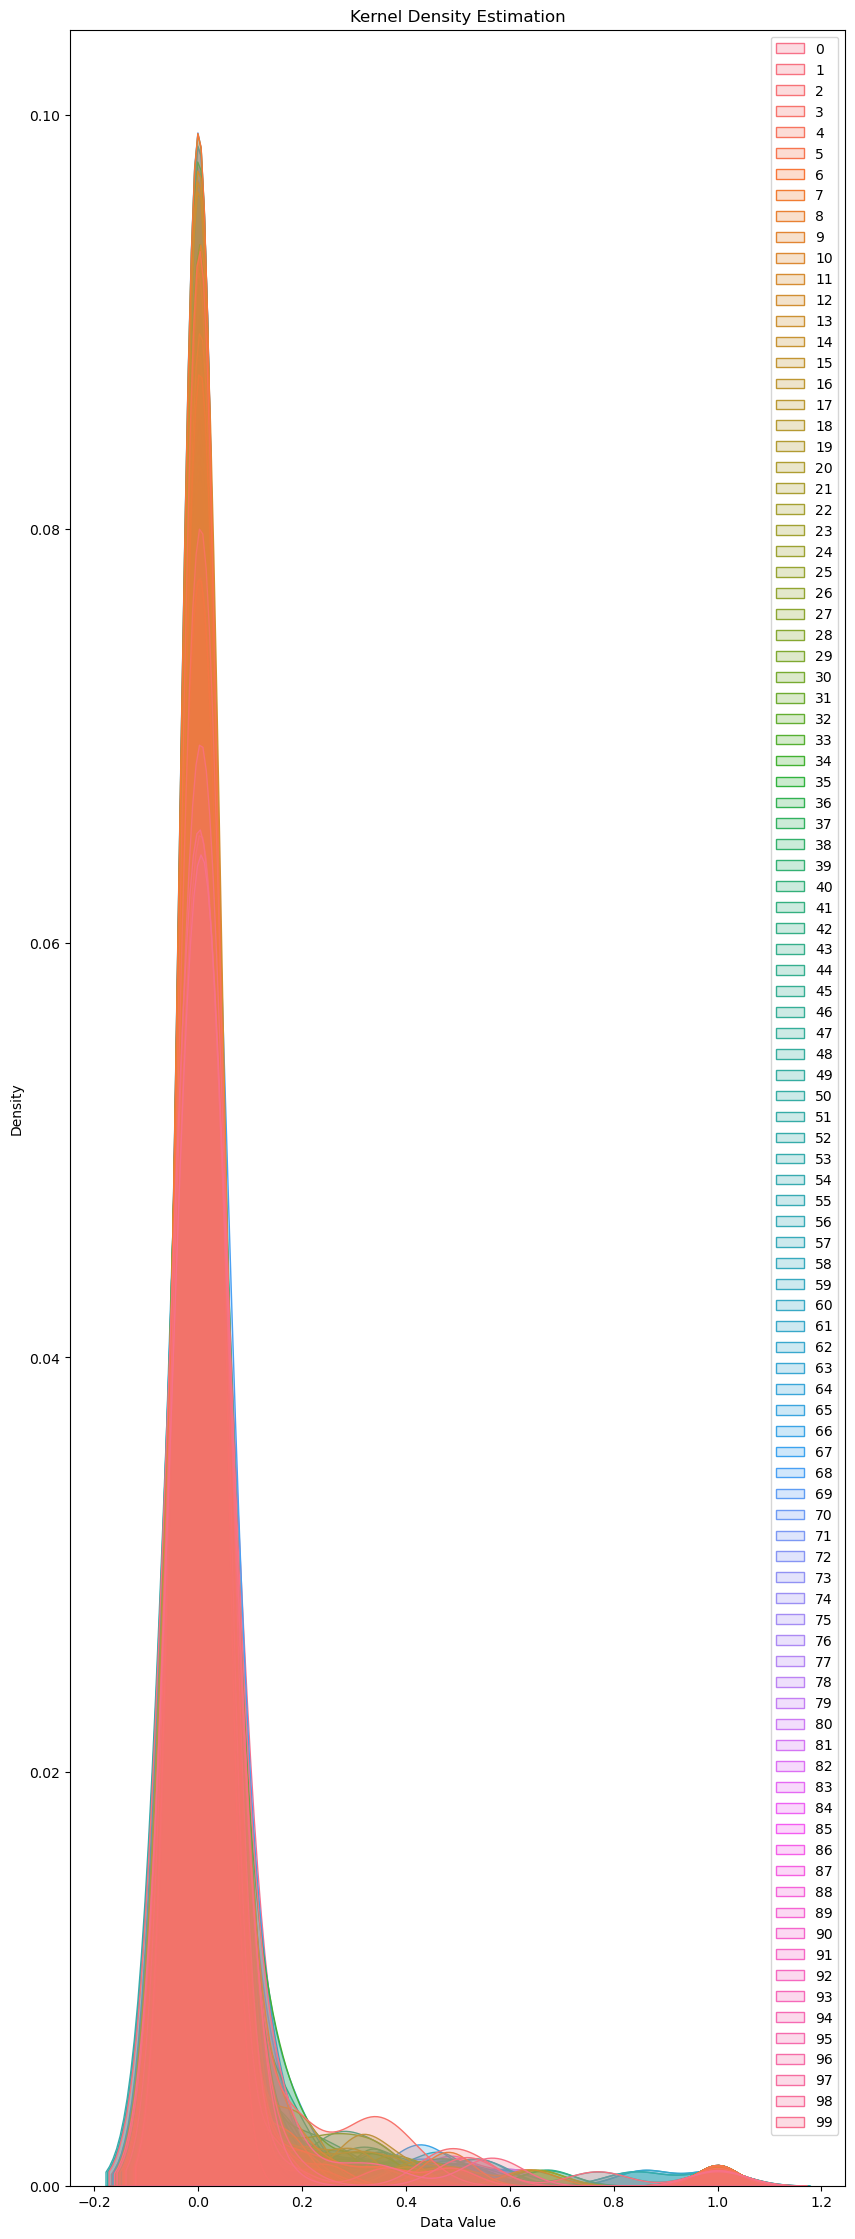

In [18]:
plt.figure(figsize=(10, 28))
sns.kdeplot(rbf_ngelegena, fill=True)
plt.title('Kernel Density Estimation')
plt.xlabel('Data Value')
plt.ylabel('Density')
plt.show()

#### Kernel RBF untuk Multiclass Murda

In [19]:
sigma_huruf = 3

def murda(array_murda):
    array_rbf = np.zeros((len(array_murda), len(array_murda)))
    for i in range (len(array_rbf)):
        for j in range (len(array_rbf[i])):
            array_rbf[i, j] = math.exp(-(pow((array_murda[i][0] - array_murda[j][0]), 2)
                                        + pow((array_murda[i][1] - array_murda[j][1]), 2)
                                        + pow((array_murda[i][2] - array_murda[j][2]), 2)
                                        + pow((array_murda[i][3] - array_murda[j][3]), 2)
                                        + pow((array_murda[i][4] - array_murda[j][4]), 2)
                                        + pow((array_murda[i][5] - array_murda[j][5]), 2)) / (2 * pow(sigma_huruf, 2)))
    return array_rbf

rbf_murda = murda(array_murda)
print(rbf_murda)

[[1.00000000e+00 2.01662470e-04 3.49089312e-01 ... 5.33122470e-11
  1.47217613e-08 1.44962166e-12]
 [2.01662470e-04 1.00000000e+00 2.67313819e-02 ... 1.06219931e-07
  9.61559180e-08 4.39793472e-07]
 [3.49089312e-01 2.67313819e-02 1.00000000e+00 ... 2.16497848e-09
  7.97368088e-08 3.42078879e-10]
 ...
 [5.33122470e-11 1.06219931e-07 2.16497848e-09 ... 1.00000000e+00
  1.16113454e-01 7.22778370e-02]
 [1.47217613e-08 9.61559180e-08 7.97368088e-08 ... 1.16113454e-01
  1.00000000e+00 2.19724135e-02]
 [1.44962166e-12 4.39793472e-07 3.42078879e-10 ... 7.22778370e-02
  2.19724135e-02 1.00000000e+00]]


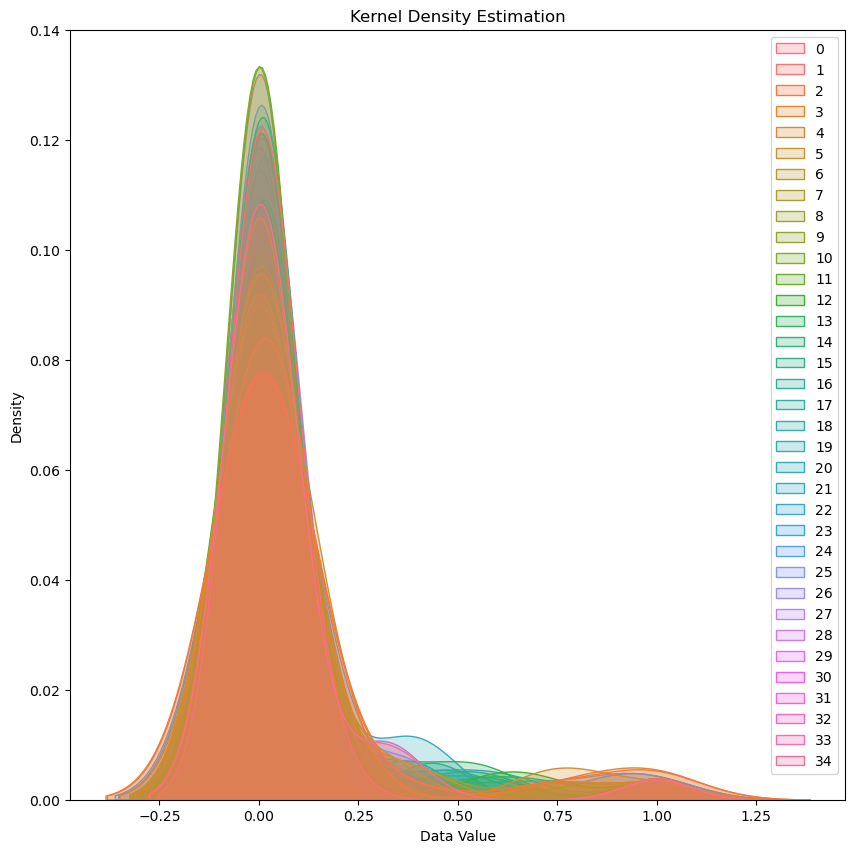

In [20]:
plt.figure(figsize=(10, 10))
sns.kdeplot(rbf_murda, fill=True)
plt.title('Kernel Density Estimation')
plt.xlabel('Data Value')
plt.ylabel('Density')
plt.show()

#### Matriks Hessian

In [21]:
hessian = np.zeros((len(rbf), len(rbf)))
hessian_ha = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_na = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ca = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ra = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ka = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_da = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ta = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_sa = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_wa = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_la = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_pa = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_dha = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ja = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ya = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_nya = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ma = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ga = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_ba = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_tha = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_nga = np.zeros((len(rbf_ngelegena), len(rbf_ngelegena)))
hessian_namurda = np.zeros((len(rbf_murda), len(rbf_murda)))
hessian_kamurda = np.zeros((len(rbf_murda), len(rbf_murda)))
hessian_tamurda = np.zeros((len(rbf_murda), len(rbf_murda)))
hessian_samurda = np.zeros((len(rbf_murda), len(rbf_murda)))
hessian_pamurda = np.zeros((len(rbf_murda), len(rbf_murda)))
hessian_gamurda = np.zeros((len(rbf_murda), len(rbf_murda)))
hessian_bamurda = np.zeros((len(rbf_murda), len(rbf_murda)))

In [22]:
lamda = 28

lamda_murda = 50

lamda_jenis = 20

for i in range(len(rbf)):
    for j in range(len(rbf)):
        hessian[i, j] = model[j][6] * model[i][6] * (rbf[i][j] + (pow(lamda_jenis, 2)))
        
for i in range(len(rbf_ngelegena)):
    for j in range(len(rbf_ngelegena)):
        hessian_ha[i, j] = model_ha[j][6] * model_ha[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_na[i, j] = model_na[j][6] * model_na[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ca[i, j] = model_ca[j][6] * model_ca[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ra[i, j] = model_ra[j][6] * model_ra[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ka[i, j] = model_ka[j][6] * model_ka[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_da[i, j] = model_da[j][6] * model_da[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ta[i, j] = model_ta[j][6] * model_ta[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))       
        hessian_sa[i, j] = model_sa[j][6] * model_sa[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_wa[i, j] = model_wa[j][6] * model_wa[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_la[i, j] = model_la[j][6] * model_la[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_pa[i, j] = model_pa[j][6] * model_pa[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_dha[i, j] = model_dha[j][6] * model_dha[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ja[i, j] = model_ja[j][6] * model_ja[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ya[i, j] = model_ya[j][6] * model_ya[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_nya[i, j] = model_nya[j][6] * model_nya[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ma[i, j] = model_ma[j][6] * model_ma[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ga[i, j] = model_ga[j][6] * model_ga[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_ba[i, j] = model_ba[j][6] * model_ba[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_tha[i, j] = model_tha[j][6] * model_tha[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        hessian_nga[i, j] = model_nga[j][6] * model_nga[i][6] * (rbf_ngelegena[i][j] + (pow(lamda, 2)))
        
for i in range(len(rbf_murda)):
    for j in range(len(rbf_murda)):
        hessian_namurda[i, j] = model_namurda[j][6] * model_namurda[i][6] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))
        hessian_kamurda[i, j] = model_kamurda[j][6] * model_kamurda[i][6] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))
        hessian_tamurda[i, j] = model_tamurda[j][6] * model_tamurda[i][6] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))
        hessian_samurda[i, j] = model_samurda[j][6] * model_samurda[i][6] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))  
        hessian_pamurda[i, j] = model_pamurda[j][6] * model_pamurda[i][6] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))
        hessian_gamurda[i, j] = model_gamurda[j][6] * model_gamurda[i][6] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))  
        hessian_bamurda[i, j] = model_bamurda[j][6] * model_bamurda[i][6] * (rbf_murda[i][j] + (pow(lamda_murda, 2)))  

print("MATRIKS HESSIAN \n", hessian, "\n")
print("MATRIKS HESSIAN HA \n", hessian_ha, "\n")
print("MATRIKS HESSIAN NA MURDA \n", hessian_namurda)

MATRIKS HESSIAN 
 [[ 401.          400.00016352  400.57444096 ... -400.
  -400.         -400.        ]
 [ 400.00016352  401.          400.00094228 ... -400.
  -400.         -400.        ]
 [ 400.57444096  400.00094228  401.         ... -400.
  -400.         -400.        ]
 ...
 [-400.         -400.         -400.         ...  401.
   400.01234801  400.00469288]
 [-400.         -400.         -400.         ...  400.01234801
   401.          400.00041312]
 [-400.         -400.         -400.         ...  400.00469288
   400.00041312  401.        ]] 

MATRIKS HESSIAN HA 
 [[ 785.          784.00006691  784.54271028 ... -784.0000206
  -784.00095895 -784.11195998]
 [ 784.00006691  785.          784.00046135 ... -784.
  -784.         -784.00000044]
 [ 784.54271028  784.00046135  785.         ... -784.00002039
  -784.00038629 -784.05359006]
 ...
 [-784.0000206  -784.         -784.00002039 ...  785.
   784.01467398  784.0003402 ]
 [-784.00095895 -784.         -784.00038629 ...  784.01467398
   78

#### Mencari Nilai Ei, Delta Alpha dan Ai 

In [23]:
C_murda = 1
gamma_murda = 0.0001
epsilon_murda = 0.01

C = 1
gamma = 0.0001
epsilon = 0.01

C_jenis = 2
gamma_jenis = 0.0001
epsilon_jenis = 0.01

alpha = [0] * len(hessian)
delta_alpha = [0] * len(hessian)
temp_alpha = [0] * len(hessian)
ei = np.zeros(len(hessian))

alpha_ha = [0] * len(hessian_ha)
delta_alpha_ha = [0] * len(hessian_ha)
temp_alpha_ha = [0] * len(hessian_ha)
ei_ha = np.zeros(len(hessian_ha))

alpha_na = [0] * len(hessian_ha)
delta_alpha_na = [0] * len(hessian_ha)
temp_alpha_na = [0] * len(hessian_ha)
ei_na = np.zeros(len(hessian_ha))

alpha_ca = [0] * len(hessian_ha)
delta_alpha_ca = [0] * len(hessian_ha)
temp_alpha_ca = [0] * len(hessian_ha)
ei_ca = np.zeros(len(hessian_ha))

alpha_ra = [0] * len(hessian_ha)
delta_alpha_ra = [0] * len(hessian_ha)
temp_alpha_ra = [0] * len(hessian_ha)
ei_ra = np.zeros(len(hessian_ha))

alpha_ka = [0] * len(hessian_ha)
delta_alpha_ka = [0] * len(hessian_ha)
temp_alpha_ka = [0] * len(hessian_ha)
ei_ka = np.zeros(len(hessian_ha))

alpha_da = [0] * len(hessian_ha)
delta_alpha_da = [0] * len(hessian_ha)
temp_alpha_da = [0] * len(hessian_ha)
ei_da = np.zeros(len(hessian_ha))

alpha_ta = [0] * len(hessian_ha)
delta_alpha_ta = [0] * len(hessian_ha)
temp_alpha_ta = [0] * len(hessian_ha)
ei_ta = np.zeros(len(hessian_ha))

alpha_sa = [0] * len(hessian_ha)
delta_alpha_sa = [0] * len(hessian_ha)
temp_alpha_sa = [0] * len(hessian_ha)
ei_sa = np.zeros(len(hessian_ha))

alpha_wa = [0] * len(hessian_ha)
delta_alpha_wa = [0] * len(hessian_ha)
temp_alpha_wa = [0] * len(hessian_ha)
ei_wa = np.zeros(len(hessian_ha))

alpha_la = [0] * len(hessian_ha)
delta_alpha_la = [0] * len(hessian_ha)
temp_alpha_la = [0] * len(hessian_ha)
ei_la = np.zeros(len(hessian_ha))

alpha_pa = [0] * len(hessian_ha)
delta_alpha_pa = [0] * len(hessian_ha)
temp_alpha_pa = [0] * len(hessian_ha)
ei_pa = np.zeros(len(hessian_ha))

alpha_dha = [0] * len(hessian_ha)
delta_alpha_dha = [0] * len(hessian_ha)
temp_alpha_dha = [0] * len(hessian_ha)
ei_dha = np.zeros(len(hessian_ha))

alpha_ja = [0] * len(hessian_ha)
delta_alpha_ja = [0] * len(hessian_ha)
temp_alpha_ja = [0] * len(hessian_ha)
ei_ja = np.zeros(len(hessian_ha))

alpha_ya = [0] * len(hessian_ha)
delta_alpha_ya = [0] * len(hessian_ha)
temp_alpha_ya = [0] * len(hessian_ha)
ei_ya = np.zeros(len(hessian_ha))

alpha_nya = [0] * len(hessian_ha)
delta_alpha_nya = [0] * len(hessian_ha)
temp_alpha_nya = [0] * len(hessian_ha)
ei_nya = np.zeros(len(hessian_ha))

alpha_ma = [0] * len(hessian_ha)
delta_alpha_ma = [0] * len(hessian_ha)
temp_alpha_ma = [0] * len(hessian_ha)
ei_ma = np.zeros(len(hessian_ha))

alpha_ga = [0] * len(hessian_ha)
delta_alpha_ga = [0] * len(hessian_ha)
temp_alpha_ga = [0] * len(hessian_ha)
ei_ga = np.zeros(len(hessian_ha))

alpha_ba = [0] * len(hessian_ha)
delta_alpha_ba = [0] * len(hessian_ha)
temp_alpha_ba = [0] * len(hessian_ha)
ei_ba = np.zeros(len(hessian_ha))

alpha_tha = [0] * len(hessian_ha)
delta_alpha_tha = [0] * len(hessian_ha)
temp_alpha_tha = [0] * len(hessian_ha)
ei_tha = np.zeros(len(hessian_ha))

alpha_nga = [0] * len(hessian_ha)
delta_alpha_nga = [0] * len(hessian_ha)
temp_alpha_nga = [0] * len(hessian_ha)
ei_nga = np.zeros(len(hessian_ha))

alpha_namurda = [0] * len(hessian_namurda)
delta_alpha_namurda = [0] * len(hessian_namurda)
temp_alpha_namurda = [0] * len(hessian_namurda)
ei_namurda = np.zeros(len(hessian_namurda))

alpha_kamurda = [0] * len(hessian_namurda)
delta_alpha_kamurda = [0] * len(hessian_namurda)
temp_alpha_kamurda = [0] * len(hessian_namurda)
ei_kamurda = np.zeros(len(hessian_namurda))

alpha_tamurda = [0] * len(hessian_namurda)
delta_alpha_tamurda = [0] * len(hessian_namurda)
temp_alpha_tamurda = [0] * len(hessian_namurda)
ei_tamurda = np.zeros(len(hessian_namurda))

alpha_samurda = [0] * len(hessian_namurda)
delta_alpha_samurda = [0] * len(hessian_namurda)
temp_alpha_samurda = [0] * len(hessian_namurda)
ei_samurda = np.zeros(len(hessian_namurda))

alpha_pamurda = [0] * len(hessian_namurda)
delta_alpha_pamurda = [0] * len(hessian_namurda)
temp_alpha_pamurda = [0] * len(hessian_namurda)
ei_pamurda = np.zeros(len(hessian_namurda))

alpha_gamurda = [0] * len(hessian_namurda)
delta_alpha_gamurda = [0] * len(hessian_namurda)
temp_alpha_gamurda = [0] * len(hessian_namurda)
ei_gamurda = np.zeros(len(hessian_namurda))

alpha_bamurda = [0] * len(hessian_namurda)
delta_alpha_bamurda = [0] * len(hessian_namurda)
temp_alpha_bamurda = [0] * len(hessian_namurda)
ei_bamurda = np.zeros(len(hessian_namurda))

In [24]:
iterasi = 0

while iterasi < 20:
    if delta_alpha[iterasi] <= epsilon_jenis:
        for i in range(len(hessian)):
            for j in range(len(hessian)):
                ei[i] += (temp_alpha[j] * hessian[i][j])

            delta_alpha[i] = min(max((gamma_jenis * (1 - ei[i])), alpha[i]), C_jenis - alpha[i])
            alpha[i] = alpha[i] + delta_alpha[i]

        for i in range(len(alpha)):
            temp_alpha[i] = alpha[i]
        iterasi += 1
    else:
        break
        
while iterasi < 20:
    if delta_alpha_ha[iterasi] <= epsilon:
        for i in range(len(hessian_ha)):
            for j in range(len(hessian_ha)):
                ei_ha[i] += (temp_alpha_ha[j] * hessian_ha[i][j])

            delta_alpha_ha[i] = min(max((gamma * (1 - ei_ha[i])), alpha_ha[i]), C - alpha_ha[i])
            alpha_ha[i] = alpha_ha[i] + delta_alpha_ha[i]

        for i in range(len(alpha_ha)):
            temp_alpha_ha[i] = alpha_ha[i]
        iterasi += 1
    else:
        break

iterasi = 0
while iterasi < 20:
    if delta_alpha_na[iterasi] <= epsilon:
        for i in range(len(hessian_na)):
            for j in range(len(hessian_na)):
                ei_na[i] += (temp_alpha_na[j] * hessian_na[i][j])

            delta_alpha_na[i] = min(max((gamma * (1 - ei_na[i])), alpha_na[i]), C - alpha_na[i])
            alpha_na[i] = alpha_na[i] + delta_alpha_na[i]
        
        for i in range(len(alpha_na)):
            temp_alpha_na[i] = alpha_na[i]
        iterasi += 1
    else:
        break
    
iterasi = 0
while iterasi < 20:
    if delta_alpha_ca[iterasi] <= epsilon:
        for i in range(len(hessian_ca)):
            for j in range(len(hessian_ca)):
                ei_ca[i] += (temp_alpha_ca[j] * hessian_ca[i][j])

            delta_alpha_ca[i] = min(max((gamma * (1 - ei_ca[i])), alpha_ca[i]), C - alpha_ca[i])
            alpha_ca[i] = alpha_ca[i] + delta_alpha_ca[i]
        
        for i in range(len(alpha_ca)):
            temp_alpha_ca[i] = alpha_ca[i]
        iterasi += 1
    else:
        break

iterasi = 0
while iterasi < 20:
    if delta_alpha_ra[iterasi] <= epsilon:
        for i in range(len(hessian_ra)):
            for j in range(len(hessian_ra)):
                ei_ra[i] += (temp_alpha_ra[j] * hessian_ra[i][j])

            delta_alpha_ra[i] = min(max((gamma * (1 - ei_ra[i])), alpha_ra[i]), C - alpha_ra[i])
            alpha_ra[i] = alpha_ra[i] + delta_alpha_ra[i]

        for i in range(len(alpha_ra)):
            temp_alpha_ra[i] = alpha_ra[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_ka[iterasi] <= epsilon:
        for i in range(len(hessian_ka)):
            for j in range(len(hessian_ka)):
                ei_ka[i] += (temp_alpha_ka[j] * hessian_ka[i][j])

            delta_alpha_ka[i] = min(max((gamma * (1 - ei_ka[i])), alpha_ka[i]), C - alpha_ka[i])
            alpha_ka[i] = alpha_ka[i] + delta_alpha_ka[i]

        for i in range(len(alpha_ka)):
            temp_alpha_ka[i] = alpha_ka[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_da[iterasi] <= epsilon:
        for i in range(len(hessian_da)):
            for j in range(len(hessian_da)):
                ei_da[i] += (temp_alpha_da[j] * hessian_da[i][j])

            delta_alpha_da[i] = min(max((gamma * (1 - ei_da[i])), alpha_da[i]), C - alpha_da[i])
            alpha_da[i] = alpha_da[i] + delta_alpha_da[i]

        for i in range(len(alpha_da)):
            temp_alpha_da[i] = alpha_da[i]
        iterasi += 1
    else:
        break

iterasi = 0
while iterasi < 20:
    if delta_alpha_ta[iterasi] <= epsilon:
        for i in range(len(hessian_ta)):
            for j in range(len(hessian_ta)):
                ei_ta[i] += (temp_alpha_ta[j] * hessian_ta[i][j])

            delta_alpha_ta[i] = min(max((gamma * (1 - ei_ta[i])), alpha_ta[i]), C - alpha_ta[i])
            alpha_ta[i] = alpha_ta[i] + delta_alpha_ta[i]

        for i in range(len(alpha_ta)):
            temp_alpha_ta[i] = alpha_ta[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_sa[iterasi] <= epsilon:
        for i in range(len(hessian_sa)):
            for j in range(len(hessian_sa)):
                ei_sa[i] += (temp_alpha_sa[j] * hessian_sa[i][j])

            delta_alpha_sa[i] = min(max((gamma * (1 - ei_sa[i])), alpha_sa[i]), C - alpha_sa[i])
            alpha_sa[i] = alpha_sa[i] + delta_alpha_sa[i]

        for i in range(len(alpha_sa)):
            temp_alpha_sa[i] = alpha_sa[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_wa[iterasi] <= epsilon:
        for i in range(len(hessian_wa)):
            for j in range(len(hessian_wa)):
                ei_wa[i] += (temp_alpha_wa[j] * hessian_wa[i][j])

            delta_alpha_wa[i] = min(max((gamma * (1 - ei_wa[i])), alpha_wa[i]), C - alpha_wa[i])
            alpha_wa[i] = alpha_wa[i] + delta_alpha_wa[i]

        for i in range(len(alpha_wa)):
            temp_alpha_wa[i] = alpha_wa[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_la[iterasi] <= epsilon:
        for i in range(len(hessian_la)):
            for j in range(len(hessian_la)):
                ei_la[i] += (temp_alpha_la[j] * hessian_la[i][j])

            delta_alpha_la[i] = min(max((gamma * (1 - ei_la[i])), alpha_la[i]), C - alpha_la[i])
            alpha_la[i] = alpha_la[i] + delta_alpha_la[i]

        for i in range(len(alpha_la)):
            temp_alpha_la[i] = alpha_la[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_pa[iterasi] <= epsilon:
        for i in range(len(hessian_pa)):
            for j in range(len(hessian_pa)):
                ei_pa[i] += (temp_alpha_pa[j] * hessian_pa[i][j])

            delta_alpha_pa[i] = min(max((gamma * (1 - ei_pa[i])), alpha_pa[i]), C - alpha_pa[i])
            alpha_pa[i] = alpha_pa[i] + delta_alpha_pa[i]

        for i in range(len(alpha_pa)):
            temp_alpha_pa[i] = alpha_pa[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_dha[iterasi] <= epsilon:
        for i in range(len(hessian_dha)):
            for j in range(len(hessian_dha)):
                ei_dha[i] += (temp_alpha_dha[j] * hessian_dha[i][j])

            delta_alpha_dha[i] = min(max((gamma * (1 - ei_dha[i])), alpha_dha[i]), C - alpha_dha[i])
            alpha_dha[i] = alpha_dha[i] + delta_alpha_dha[i]

        for i in range(len(alpha_dha)):
            temp_alpha_dha[i] = alpha_dha[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_ja[iterasi] <= epsilon:
        for i in range(len(hessian_ja)):
            for j in range(len(hessian_ja)):
                ei_ja[i] += (temp_alpha_ja[j] * hessian_ja[i][j])

            delta_alpha_ja[i] = min(max((gamma * (1 - ei_ja[i])), alpha_ja[i]), C - alpha_ja[i])
            alpha_ja[i] = alpha_ja[i] + delta_alpha_ja[i]

        for i in range(len(alpha_ja)):
            temp_alpha_ja[i] = alpha_ja[i]
        iterasi += 1
    else:
        break

iterasi = 0
while iterasi < 20:
    if delta_alpha_ya[iterasi] <= epsilon:
        for i in range(len(hessian_ya)):
            for j in range(len(hessian_ya)):
                ei_ya[i] += (temp_alpha_ya[j] * hessian_ya[i][j])

            delta_alpha_ya[i] = min(max((gamma * (1 - ei_ya[i])), alpha_ya[i]), C - alpha_ya[i])
            alpha_ya[i] = alpha_ya[i] + delta_alpha_ya[i]

        for i in range(len(alpha_ya)):
            temp_alpha_ya[i] = alpha_ya[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_nya[iterasi] <= epsilon:
        for i in range(len(hessian_nya)):
            for j in range(len(hessian_nya)):
                ei_nya[i] += (temp_alpha_nya[j] * hessian_nya[i][j])

            delta_alpha_nya[i] = min(max((gamma * (1 - ei_nya[i])), alpha_nya[i]), C - alpha_nya[i])
            alpha_nya[i] = alpha_nya[i] + delta_alpha_nya[i]

        for i in range(len(alpha_nya)):
            temp_alpha_nya[i] = alpha_nya[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_ma[iterasi] <= epsilon:
        for i in range(len(hessian_ma)):
            for j in range(len(hessian_ma)):
                ei_ma[i] += (temp_alpha_ma[j] * hessian_ma[i][j])

            delta_alpha_ma[i] = min(max((gamma * (1 - ei_ma[i])), alpha_ma[i]), C - alpha_ma[i])
            alpha_ma[i] = alpha_ma[i] + delta_alpha_ma[i]

        for i in range(len(alpha_ma)):
            temp_alpha_ma[i] = alpha_ma[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_ga[iterasi] <= epsilon:
        for i in range(len(hessian_ga)):
            for j in range(len(hessian_ga)):
                ei_ga[i] += (temp_alpha_ga[j] * hessian_ga[i][j])

            delta_alpha_ga[i] = min(max((gamma * (1 - ei_ga[i])), alpha_ga[i]), C - alpha_ga[i])
            alpha_ga[i] = alpha_ga[i] + delta_alpha_ga[i]

        for i in range(len(alpha_ga)):
            temp_alpha_ga[i] = alpha_ga[i]
        iterasi += 1
    else:
        break
    
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_ba[iterasi] <= epsilon:
        for i in range(len(hessian_ba)):
            for j in range(len(hessian_ba)):
                ei_ba[i] += (temp_alpha_ba[j] * hessian_ba[i][j])

            delta_alpha_ba[i] = min(max((gamma * (1 - ei_ba[i])), alpha_ba[i]), C - alpha_ba[i])
            alpha_ba[i] = alpha_ba[i] + delta_alpha_ba[i]

        for i in range(len(alpha_ba)):
            temp_alpha_ba[i] = alpha_ba[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_tha[iterasi] <= epsilon:
        for i in range(len(hessian_tha)):
            for j in range(len(hessian_tha)):
                ei_tha[i] += (temp_alpha_tha[j] * hessian_tha[i][j])

            delta_alpha_tha[i] = min(max((gamma * (1 - ei_tha[i])), alpha_tha[i]), C - alpha_tha[i])
            alpha_tha[i] = alpha_tha[i] + delta_alpha_tha[i]

        for i in range(len(alpha_tha)):
            temp_alpha_tha[i] = alpha_tha[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_nga[iterasi] <= epsilon:
        for i in range(len(hessian_nga)):
            for j in range(len(hessian_nga)):
                ei_nga[i] += (temp_alpha_nga[j] * hessian_nga[i][j])

            delta_alpha_nga[i] = min(max((gamma * (1 - ei_nga[i])), alpha_nga[i]), C - alpha_nga[i])
            alpha_nga[i] = alpha_nga[i] + delta_alpha_nga[i]

        for i in range(len(alpha_nga)):
            temp_alpha_nga[i] = alpha_nga[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_namurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_namurda)):
            for j in range(len(hessian_namurda)):
                ei_namurda[i] += (temp_alpha_namurda[j] * hessian_namurda[i][j])

            delta_alpha_namurda[i] = min(max((gamma_murda * (1 - ei_namurda[i])), alpha_namurda[i]), C_murda - alpha_namurda[i])
            alpha_namurda[i] = alpha_namurda[i] + delta_alpha_namurda[i]

        for i in range(len(alpha_namurda)):
            temp_alpha_namurda[i] = alpha_namurda[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_kamurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_kamurda)):
            for j in range(len(hessian_kamurda)):
                ei_kamurda[i] += (temp_alpha_kamurda[j] * hessian_kamurda[i][j])

            delta_alpha_kamurda[i] = min(max((gamma_murda * (1 - ei_kamurda[i])), alpha_kamurda[i]), C_murda - alpha_kamurda[i])
            alpha_kamurda[i] = alpha_kamurda[i] + delta_alpha_kamurda[i]

        for i in range(len(alpha_kamurda)):
            temp_alpha_kamurda[i] = alpha_kamurda[i]
        iterasi += 1
    else:
        break
    
iterasi = 0
while iterasi < 20:
    if delta_alpha_tamurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_tamurda)):
            for j in range(len(hessian_tamurda)):
                ei_tamurda[i] += (temp_alpha_tamurda[j] * hessian_tamurda[i][j])

            delta_alpha_tamurda[i] = min(max((gamma_murda * (1 - ei_tamurda[i])), alpha_tamurda[i]), C_murda - alpha_tamurda[i])
            alpha_tamurda[i] = alpha_tamurda[i] + delta_alpha_tamurda[i]

        for i in range(len(alpha_tamurda)):
            temp_alpha_tamurda[i] = alpha_tamurda[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_samurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_samurda)):
            for j in range(len(hessian_samurda)):
                ei_samurda[i] += (temp_alpha_samurda[j] * hessian_samurda[i][j])

            delta_alpha_samurda[i] = min(max((gamma_murda * (1 - ei_samurda[i])), alpha_samurda[i]), C_murda - alpha_samurda[i])
            alpha_samurda[i] = alpha_samurda[i] + delta_alpha_samurda[i]

        for i in range(len(alpha_samurda)):
            temp_alpha_samurda[i] = alpha_samurda[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_pamurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_pamurda)):
            for j in range(len(hessian_pamurda)):
                ei_pamurda[i] += (temp_alpha_pamurda[j] * hessian_pamurda[i][j])

            delta_alpha_pamurda[i] = min(max((gamma_murda * (1 - ei_pamurda[i])), alpha_pamurda[i]), C_murda - alpha_pamurda[i])
            alpha_pamurda[i] = alpha_pamurda[i] + delta_alpha_pamurda[i]

        for i in range(len(alpha_pamurda)):
            temp_alpha_pamurda[i] = alpha_pamurda[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_gamurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_gamurda)):
            for j in range(len(hessian_gamurda)):
                ei_gamurda[i] += (temp_alpha_gamurda[j] * hessian_gamurda[i][j])

            delta_alpha_gamurda[i] = min(max((gamma_murda * (1 - ei_gamurda[i])), alpha_gamurda[i]), C_murda - alpha_gamurda[i])
            alpha_gamurda[i]  = alpha_gamurda[i] + delta_alpha_gamurda[i]

        for i in range(len(alpha_gamurda)):
            temp_alpha_gamurda[i] = alpha_gamurda[i]
        iterasi += 1
    else:
        break
        
iterasi = 0
while iterasi < 20:
    if delta_alpha_bamurda[iterasi] <= epsilon_murda:
        for i in range(len(hessian_bamurda)):
            for j in range(len(hessian_bamurda)):
                ei_bamurda[i] += (temp_alpha_bamurda[j] * hessian_bamurda[i][j])

            delta_alpha_bamurda[i] = min(max((gamma_murda * (1 - ei_bamurda[i])), alpha_bamurda[i]), C_murda - alpha_bamurda[i])
            alpha_bamurda[i] = alpha_bamurda[i] + delta_alpha_bamurda[i]

        for i in range(len(alpha_bamurda)):
            temp_alpha_bamurda[i] = alpha_bamurda[i]
        iterasi += 1
    else:
        break

print("Ei BINARY \n", ei, "\n")
print("Ai BINARY \n", alpha, "\n")
print("DELTA ALPHA BINARY \n", delta_alpha, "\n")
print("Ei HA \n", ei_ha, "\n")
print("Ai HA \n", alpha_ha, "\n")
print("DELTA ALPHA HA \n", delta_alpha_ha, "\n")
print("Ei NA MURDA \n", ei_namurda, "\n")
print("Ai NA MURDA \n", alpha_namurda, "\n")
print("DELTA ALPHA NA MURDA \n", delta_alpha_namurda)

Ei BINARY 
 [ 151.49360652  151.44654985  151.48146036  151.50617476  151.45846365
  151.43342965  151.38257175  151.46318574  151.44199896  151.45554551
  151.358145    151.42983567  151.47469732  151.42049918  151.42585373
  151.41223042  151.4201695   151.41945417  151.42818317  151.43292209
  151.4784765   151.45010765  151.44848138  151.46286967  151.44891437
  151.46177135  151.47090318  151.44975716  151.45387036  151.42825464
  151.4730389   151.41351949  151.41220461  151.41779495  151.47677527
  151.42967646  151.43110846  151.44454954  151.44463839  151.41834263
  151.46149954  151.43655373  151.45881701  151.48490311  151.44975861
  151.4805457   151.47161588  151.4695403   151.44273982  151.45070572
  151.4483038   151.45949857  151.45244291  151.46865262  151.47191977
  151.40677412  151.41045783  151.4432211   151.43140777  151.46203671
  151.42203105  151.45007697  151.41657165  151.4357946   151.4515067
  151.42363181  151.51519082  151.42925908  151.48459759  151.4638

#### Mencari Nilai Bobot Max Positif dan Max Negatif dari Array Ai

In [25]:
positif = [0] * len(model)
negatif = [0] * len(model)

positif_ha = [0] * len(model_ha)
negatif_ha = [0] * len(model_ha)
positif_na = [0] * len(model_ha)
negatif_na = [0] * len(model_ha)
positif_ca = [0] * len(model_ha)
negatif_ca = [0] * len(model_ha)
positif_ra = [0] * len(model_ha)
negatif_ra = [0] * len(model_ha)
positif_ka = [0] * len(model_ha)
negatif_ka = [0] * len(model_ha)
positif_da = [0] * len(model_ha)
negatif_da = [0] * len(model_ha)
positif_ta = [0] * len(model_ha)
negatif_ta = [0] * len(model_ha)
positif_sa = [0] * len(model_ha)
negatif_sa = [0] * len(model_ha)
positif_wa = [0] * len(model_ha)
negatif_wa = [0] * len(model_ha)
positif_la = [0] * len(model_ha)
negatif_la = [0] * len(model_ha)
positif_pa = [0] * len(model_ha)
negatif_pa = [0] * len(model_ha)
positif_dha = [0] * len(model_ha)
negatif_dha = [0] * len(model_ha)
positif_ja = [0] * len(model_ha)
negatif_ja = [0] * len(model_ha)
positif_ya = [0] * len(model_ha)
negatif_ya = [0] * len(model_ha)
positif_nya = [0] * len(model_ha)
negatif_nya = [0] * len(model_ha)
positif_ma = [0] * len(model_ha)
negatif_ma = [0] * len(model_ha)
positif_ga = [0] * len(model_ha)
negatif_ga = [0] * len(model_ha)
positif_ba = [0] * len(model_ha)
negatif_ba = [0] * len(model_ha)
positif_tha = [0] * len(model_ha)
negatif_tha = [0] * len(model_ha)
positif_nga = [0] * len(model_ha)
negatif_nga = [0] * len(model_ha)

positif_namurda = [0] * len(model_namurda)
negatif_namurda = [0] * len(model_namurda)
positif_kamurda = [0] * len(model_namurda)
negatif_kamurda = [0] * len(model_namurda)
positif_tamurda = [0] * len(model_namurda)
negatif_tamurda = [0] * len(model_namurda)
positif_samurda = [0] * len(model_namurda)
negatif_samurda = [0] * len(model_namurda)
positif_pamurda = [0] * len(model_namurda)
negatif_pamurda = [0] * len(model_namurda)
positif_gamurda = [0] * len(model_namurda)
negatif_gamurda = [0] * len(model_namurda)
positif_bamurda = [0] * len(model_namurda)
negatif_bamurda = [0] * len(model_namurda)

In [26]:
for i in range(len(model)):
    if model[i][6] == 1:
        positif[i] = alpha[i]
    else :
        negatif[i] = alpha[i]
        
for i in range(len(model_ha)):
    if model_ha[i][6] == 1:
        positif_ha[i] = alpha_ha[i]
    else :
        negatif_ha[i] = alpha_ha[i]
        
for i in range(len(model_ha)):
    if model_na[i][6] == 1:
        positif_na[i] = alpha_na[i]
    else :
        negatif_na[i] = alpha_na[i]
        
for i in range(len(model_ha)):
    if model_ca[i][6] == 1:
        positif_ca[i] = alpha_ca[i]
    else :
        negatif_ca[i] = alpha_ca[i]
        
for i in range(len(model_ha)):
    if model_ra[i][6] == 1:
        positif_ra[i] = alpha_ra[i]
    else :
        negatif_ra[i] = alpha_ra[i]
        
for i in range(len(model_ha)):
    if model_ka[i][6] == 1:
        positif_ka[i] = alpha_ka[i]
    else :
        negatif_ka[i] = alpha_ka[i]
        
for i in range(len(model_ha)):
    if model_da[i][6] == 1:
        positif_da[i] = alpha_da[i]
    else :
        negatif_da[i] = alpha_da[i]
        
for i in range(len(model_ha)):
    if model_ta[i][6] == 1:
        positif_ta[i] = alpha_ta[i]
    else :
        negatif_ta[i] = alpha_ta[i]
        
for i in range(len(model_ha)):
    if model_sa[i][6] == 1:
        positif_sa[i] = alpha_sa[i]
    else :
        negatif_sa[i] = alpha_sa[i]   
        
for i in range(len(model_ha)):
    if model_wa[i][6] == 1:
        positif_wa[i] = alpha_wa[i]
    else :
        negatif_wa[i] = alpha_wa[i]
        
for i in range(len(model_ha)):
    if model_la[i][6] == 1:
        positif_la[i] = alpha_la[i]
    else :
        negatif_la[i] = alpha_la[i]
        
for i in range(len(model_ha)):
    if model_pa[i][6] == 1:
        positif_pa[i] = alpha_pa[i]
    else :
        negatif_pa[i] = alpha_pa[i]
        
for i in range(len(model_ha)):
    if model_dha[i][6] == 1:
        positif_dha[i] = alpha_dha[i]
    else :
        negatif_dha[i] = alpha_dha[i]
        
for i in range(len(model_ha)):
    if model_ja[i][6] == 1:
        positif_ja[i] = alpha_ja[i]
    else :
        negatif_ja[i] = alpha_ja[i]
        
for i in range(len(model_ha)):
    if model_ya[i][6] == 1:
        positif_ya[i] = alpha_ya[i]
    else :
        negatif_ya[i] = alpha_ya[i]
        
for i in range(len(model_ha)):
    if model_nya[i][6] == 1:
        positif_nya[i] = alpha_nya[i]
    else :
        negatif_nya[i] = alpha_nya[i]
        
for i in range(len(model_ha)):
    if model_ma[i][6] == 1:
        positif_ma[i] = alpha_ma[i]
    else :
        negatif_ma[i] = alpha_ma[i]
        
for i in range(len(model_ha)):
    if model_ga[i][6] == 1:
        positif_ga[i] = alpha_ga[i]
    else :
        negatif_ga[i] = alpha_ga[i]
        
for i in range(len(model_ha)):
    if model_ba[i][6] == 1:
        positif_ba[i] = alpha_ba[i]
    else :
        negatif_ba[i] = alpha_ba[i]
        
for i in range(len(model_ha)):
    if model_tha[i][6] == 1:
        positif_tha[i] = alpha_tha[i]
    else :
        negatif_tha[i] = alpha_tha[i]
        
for i in range(len(model_ha)):
    if model_nga[i][6] == 1:
        positif_nga[i] = alpha_nga[i]
    else :
        negatif_nga[i] = alpha_nga[i]
        
for i in range(len(model_namurda)):
    if model_namurda[i][6] == 1:
        positif_namurda[i] = alpha_namurda[i]
    else :
        negatif_namurda[i] = alpha_namurda[i]
        
for i in range(len(model_namurda)):
    if model_kamurda[i][6] == 1:
        positif_kamurda[i] = alpha_kamurda[i]
    else :
        negatif_kamurda[i] = alpha_kamurda[i]
        
for i in range(len(model_namurda)):
    if model_tamurda[i][6] == 1:
        positif_tamurda[i] = alpha_tamurda[i]
    else :
        negatif_tamurda[i] = alpha_tamurda[i]
        
for i in range(len(model_namurda)):
    if model_samurda[i][6] == 1:
        positif_samurda[i] = alpha_samurda[i]
    else :
        negatif_samurda[i] = alpha_samurda[i]   
        
for i in range(len(model_namurda)):
    if model_pamurda[i][6] == 1:
        positif_pamurda[i] = alpha_pamurda[i]
    else :
        negatif_pamurda[i] = alpha_pamurda[i]
        
for i in range(len(model_namurda)):
    if model_gamurda[i][6] == 1:
        positif_gamurda[i] = alpha_gamurda[i]
    else :
        negatif_gamurda[i] = alpha_gamurda[i]
        
for i in range(len(model_namurda)):
    if model_bamurda[i][6] == 1:
        positif_bamurda[i] = alpha_bamurda[i]
    else :
        negatif_bamurda[i] = alpha_bamurda[i]
        
print("POSITIF \n", positif, "\n")
print("NEGATIF \n", negatif, "\n")
print("POSITIF HA \n", positif_ha, "\n")
print("NEGATIF HA \n", negatif_ha, "\n")
print("POSITIF NA MURDA \n", positif_namurda, "\n")
print("NEGATIF NA MURDA \n", negatif_namurda)

POSITIF 
 [0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0.0256, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

NEGATIF 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
wxplus = max(positif)
wxmin = max(negatif)
indwxplus = positif.index(wxplus)
indwxmin = negatif.index(wxmin)

wxplus_ha = max(positif_ha)
wxmin_ha = max(negatif_ha)
indwxplus_ha = positif_ha.index(wxplus_ha)
indwxmin_ha = negatif_ha.index(wxmin_ha)

wxplus_na = max(positif_na)
wxmin_na = max(negatif_na)
indwxplus_na = positif_na.index(wxplus_na)
indwxmin_na = negatif_na.index(wxmin_na)

wxplus_ca = max(positif_ca)
wxmin_ca = max(negatif_ca)
indwxplus_ca = positif_ca.index(wxplus_ca)
indwxmin_ca = negatif_ca.index(wxmin_ca)

wxplus_ra = max(positif_ra)
wxmin_ra = max(negatif_ra)
indwxplus_ra = positif_ra.index(wxplus_ra)
indwxmin_ra = negatif_ra.index(wxmin_ra)

wxplus_ka = max(positif_ka)
wxmin_ka = max(negatif_ka)
indwxplus_ka = positif_ka.index(wxplus_ka)
indwxmin_ka = negatif_ka.index(wxmin_ka)

wxplus_da = max(positif_da)
wxmin_da = max(negatif_da)
indwxplus_da = positif_da.index(wxplus_da)
indwxmin_da = negatif_da.index(wxmin_da)

wxplus_ta = max(positif_ta)
wxmin_ta = max(negatif_ta)
indwxplus_ta = positif_ta.index(wxplus_ta)
indwxmin_ta = negatif_ta.index(wxmin_ta)

wxplus_sa = max(positif_sa)
wxmin_sa = max(negatif_sa)
indwxplus_sa = positif_sa.index(wxplus_sa)
indwxmin_sa = negatif_sa.index(wxmin_sa)

wxplus_wa = max(positif_wa)
wxmin_wa = max(negatif_wa)
indwxplus_wa = positif_wa.index(wxplus_wa)
indwxmin_wa = negatif_wa.index(wxmin_wa)

wxplus_la = max(positif_la)
wxmin_la = max(negatif_la)
indwxplus_la = positif_la.index(wxplus_la)
indwxmin_la = negatif_la.index(wxmin_la)

wxplus_pa = max(positif_pa)
wxmin_pa = max(negatif_pa)
indwxplus_pa = positif_pa.index(wxplus_pa)
indwxmin_pa = negatif_pa.index(wxmin_pa)

wxplus_dha = max(positif_dha)
wxmin_dha = max(negatif_dha)
indwxplus_dha = positif_dha.index(wxplus_dha)
indwxmin_dha = negatif_dha.index(wxmin_dha)

wxplus_ja = max(positif_ja)
wxmin_ja = max(negatif_ja)
indwxplus_ja = positif_ja.index(wxplus_ja)
indwxmin_ja = negatif_ja.index(wxmin_ja)

wxplus_ya = max(positif_ya)
wxmin_ya = max(negatif_ya)
indwxplus_ya = positif_ya.index(wxplus_ya)
indwxmin_ya = negatif_ya.index(wxmin_ya)

wxplus_nya = max(positif_nya)
wxmin_nya = max(negatif_nya)
indwxplus_nya = positif_nya.index(wxplus_nya)
indwxmin_nya = negatif_nya.index(wxmin_nya)

wxplus_ma = max(positif_ma)
wxmin_ma = max(negatif_ma)
indwxplus_ma = positif_ma.index(wxplus_ma)
indwxmin_ma = negatif_ma.index(wxmin_ma)

wxplus_ga = max(positif_ga)
wxmin_ga = max(negatif_ga)
indwxplus_ga = positif_ga.index(wxplus_ga)
indwxmin_ga = negatif_ga.index(wxmin_ga)

wxplus_ba = max(positif_ba)
wxmin_ba = max(negatif_ba)
indwxplus_ba = positif_ba.index(wxplus_ba)
indwxmin_ba = negatif_ba.index(wxmin_ba)

wxplus_tha = max(positif_tha)
wxmin_tha = max(negatif_tha)
indwxplus_tha = positif_tha.index(wxplus_tha)
indwxmin_tha = negatif_tha.index(wxmin_tha)

wxplus_nga = max(positif_nga)
wxmin_nga = max(negatif_nga)
indwxplus_nga = positif_nga.index(wxplus_nga)
indwxmin_nga = negatif_nga.index(wxmin_nga)

wxplus_namurda = max(positif_namurda)
wxmin_namurda = max(negatif_namurda)
indwxplus_namurda = positif_namurda.index(wxplus_namurda)
indwxmin_namurda = negatif_namurda.index(wxmin_namurda)

wxplus_kamurda = max(positif_kamurda)
wxmin_kamurda = max(negatif_kamurda)
indwxplus_kamurda = positif_kamurda.index(wxplus_kamurda)
indwxmin_kamurda = negatif_kamurda.index(wxmin_kamurda)

wxplus_tamurda = max(positif_tamurda)
wxmin_tamurda = max(negatif_tamurda)
indwxplus_tamurda = positif_tamurda.index(wxplus_tamurda)
indwxmin_tamurda = negatif_tamurda.index(wxmin_tamurda)

wxplus_samurda = max(positif_samurda)
wxmin_samurda = max(negatif_samurda)
indwxplus_samurda = positif_samurda.index(wxplus_samurda)
indwxmin_samurda = negatif_samurda.index(wxmin_samurda)

wxplus_pamurda = max(positif_pamurda)
wxmin_pamurda = max(negatif_pamurda)
indwxplus_pamurda = positif_pamurda.index(wxplus_pamurda)
indwxmin_pamurda = negatif_pamurda.index(wxmin_pamurda)

wxplus_gamurda = max(positif_gamurda)
wxmin_gamurda = max(negatif_gamurda)
indwxplus_gamurda = positif_gamurda.index(wxplus_gamurda)
indwxmin_gamurda = negatif_gamurda.index(wxmin_gamurda)

wxplus_bamurda = max(positif_bamurda)
wxmin_bamurda = max(negatif_bamurda)
indwxplus_bamurda = positif_bamurda.index(wxplus_bamurda)
indwxmin_bamurda = negatif_bamurda.index(wxmin_bamurda)

print("Index : ", indwxplus, " , Bobot Max Positif : ", wxplus, "\n")
print("Index : ", indwxmin, " , Bobot Max Negatif : ", wxmin, "\n")
print("Index Ha : ", indwxplus_ha, " , Bobot Max Positif Ha : ", wxplus_ha, "\n")
print("Index Ha : ", indwxmin_ha, " , Bobot Max Negatif Ha : ", wxmin_ha, "\n")
print("Index Na Murda : ", indwxplus_namurda, " , Bobot Max Positif Na Murda : ", wxplus_namurda, "\n")
print("Index Na Murda : ", indwxmin_namurda, " , Bobot Max Negatif Na Murda : ", wxmin_namurda)

Index :  0  , Bobot Max Positif :  0.0256 

Index :  128  , Bobot Max Negatif :  0.06246672587206127 

Index Ha :  1  , Bobot Max Positif Ha :  0.2208731409340478 

Index Ha :  5  , Bobot Max Negatif Ha :  0.0256 

Index Na Murda :  1  , Bobot Max Positif Na Murda :  0.12919493527175868 

Index Na Murda :  5  , Bobot Max Negatif Na Murda :  0.0256


#### Mencari Nilai Kernel Positif dan Negatif berdasarkan Index

In [28]:
indrbfplus = rbf[indwxplus]
indrbfmin = rbf[indwxmin]

indrbfplus_ha = rbf_ngelegena[indwxplus_ha]
indrbfmin_ha = rbf_ngelegena[indwxmin_ha]

indrbfplus_na = rbf_ngelegena[indwxplus_na]
indrbfmin_na = rbf_ngelegena[indwxmin_na]

indrbfplus_ca = rbf_ngelegena[indwxplus_ca]
indrbfmin_ca = rbf_ngelegena[indwxmin_ca]

indrbfplus_ra = rbf_ngelegena[indwxplus_ra]
indrbfmin_ra = rbf_ngelegena[indwxmin_ra]

indrbfplus_ka = rbf_ngelegena[indwxplus_ka]
indrbfmin_ka = rbf_ngelegena[indwxmin_ka]

indrbfplus_da = rbf_ngelegena[indwxplus_da]
indrbfmin_da = rbf_ngelegena[indwxmin_da]

indrbfplus_ta = rbf_ngelegena[indwxplus_ta]
indrbfmin_ta = rbf_ngelegena[indwxmin_ta]

indrbfplus_sa = rbf_ngelegena[indwxplus_sa]
indrbfmin_sa = rbf_ngelegena[indwxmin_sa]

indrbfplus_wa = rbf_ngelegena[indwxplus_wa]
indrbfmin_wa = rbf_ngelegena[indwxmin_wa]

indrbfplus_la = rbf_ngelegena[indwxplus_la]
indrbfmin_la = rbf_ngelegena[indwxmin_la]

indrbfplus_pa = rbf_ngelegena[indwxplus_pa]
indrbfmin_pa = rbf_ngelegena[indwxmin_pa]

indrbfplus_dha = rbf_ngelegena[indwxplus_dha]
indrbfmin_dha = rbf_ngelegena[indwxmin_dha]

indrbfplus_ja = rbf_ngelegena[indwxplus_ja]
indrbfmin_ja = rbf_ngelegena[indwxmin_ja]

indrbfplus_ya = rbf_ngelegena[indwxplus_ya]
indrbfmin_ya = rbf_ngelegena[indwxmin_ya]

indrbfplus_nya = rbf_ngelegena[indwxplus_nya]
indrbfmin_nya = rbf_ngelegena[indwxmin_nya]

indrbfplus_ma = rbf_ngelegena[indwxplus_ma]
indrbfmin_ma = rbf_ngelegena[indwxmin_ma]

indrbfplus_ga = rbf_ngelegena[indwxplus_ga]
indrbfmin_ga = rbf_ngelegena[indwxmin_ga]

indrbfplus_ba = rbf_ngelegena[indwxplus_ba]
indrbfmin_ba = rbf_ngelegena[indwxmin_ba]

indrbfplus_tha = rbf_ngelegena[indwxplus_tha]
indrbfmin_tha = rbf_ngelegena[indwxmin_tha]

indrbfplus_nga = rbf_ngelegena[indwxplus_nga]
indrbfmin_nga = rbf_ngelegena[indwxmin_nga]

indrbfplus_namurda = rbf_murda[indwxplus_namurda]
indrbfmin_namurda = rbf_murda[indwxmin_namurda]

indrbfplus_kamurda = rbf_murda[indwxplus_kamurda]
indrbfmin_kamurda = rbf_murda[indwxmin_kamurda]

indrbfplus_tamurda = rbf_murda[indwxplus_tamurda]
indrbfmin_tamurda = rbf_murda[indwxmin_tamurda]

indrbfplus_samurda = rbf_murda[indwxplus_samurda]
indrbfmin_samurda = rbf_murda[indwxmin_samurda]

indrbfplus_pamurda = rbf_murda[indwxplus_pamurda]
indrbfmin_pamurda = rbf_murda[indwxmin_pamurda]

indrbfplus_gamurda = rbf_murda[indwxplus_gamurda]
indrbfmin_gamurda = rbf_murda[indwxmin_gamurda]

indrbfplus_bamurda = rbf_murda[indwxplus_bamurda]
indrbfmin_bamurda = rbf_murda[indwxmin_bamurda]

print(indrbfplus)
print(indrbfmin)

[1.00000000e+00 1.63523470e-04 5.74440956e-01 3.12930910e-01
 3.96198433e-01 5.94033171e-03 7.26881995e-11 2.67764183e-02
 5.25429788e-02 1.05737101e-02 3.05670764e-04 6.47865005e-03
 1.65400166e-01 2.44453525e-03 4.53615783e-11 1.73402136e-26
 2.57859497e-40 2.24554319e-45 2.69428847e-31 1.70047923e-35
 1.31932732e-01 5.77124301e-02 7.62837240e-02 1.21782077e-01
 2.60540991e-02 5.27249835e-07 3.16982787e-07 4.59213697e-10
 1.31397679e-09 5.87608640e-12 1.85641645e-01 1.98816525e-08
 2.45617323e-04 1.15014880e-03 1.27336668e-01 1.95753559e-03
 2.29966051e-02 3.69995514e-05 1.36404212e-06 3.56660691e-06
 2.75698565e-03 3.25347751e-04 3.38837728e-02 3.81809104e-02
 6.77743825e-04 7.20039612e-04 1.04318289e-03 3.83481177e-04
 1.13117817e-03 2.10861609e-03 1.18189166e-03 1.87778228e-04
 3.18179083e-03 3.98412878e-04 1.98713371e-03 4.09300012e-04
 4.42415049e-09 2.25592563e-08 1.16213230e-06 3.96283803e-02
 7.96185626e-05 5.07043640e-05 1.43356010e-04 1.05612585e-03
 4.04697583e-05 1.646255

#### Mencari Total Nilai Bobot Positif dan Negatif

In [29]:
h_wxplus = [0] * len(model)
h_wxmin = [0] * len(model)

h_wxplus_ha = [0] * len(model_ha)
h_wxmin_ha = [0] * len(model_ha)
h_wxplus_na = [0] * len(model_ha)
h_wxmin_na = [0] * len(model_ha)
h_wxplus_ca = [0] * len(model_ha)
h_wxmin_ca = [0] * len(model_ha)
h_wxplus_ra = [0] * len(model_ha)
h_wxmin_ra = [0] * len(model_ha)
h_wxplus_ka = [0] * len(model_ha)
h_wxmin_ka = [0] * len(model_ha)
h_wxplus_da = [0] * len(model_ha)
h_wxmin_da = [0] * len(model_ha)
h_wxplus_ta = [0] * len(model_ha)
h_wxmin_ta = [0] * len(model_ha)
h_wxplus_sa = [0] * len(model_ha)
h_wxmin_sa = [0] * len(model_ha)
h_wxplus_wa = [0] * len(model_ha)
h_wxmin_wa = [0] * len(model_ha)
h_wxplus_la = [0] * len(model_ha)
h_wxmin_la = [0] * len(model_ha)
h_wxplus_pa = [0] * len(model_ha)
h_wxmin_pa = [0] * len(model_ha)
h_wxplus_dha = [0] * len(model_ha)
h_wxmin_dha = [0] * len(model_ha)
h_wxplus_ja = [0] * len(model_ha)
h_wxmin_ja = [0] * len(model_ha)
h_wxplus_ya = [0] * len(model_ha)
h_wxmin_ya = [0] * len(model_ha)
h_wxplus_nya = [0] * len(model_ha)
h_wxmin_nya = [0] * len(model_ha)
h_wxplus_ma = [0] * len(model_ha)
h_wxmin_ma = [0] * len(model_ha)
h_wxplus_ga = [0] * len(model_ha)
h_wxmin_ga = [0] * len(model_ha)
h_wxplus_ba = [0] * len(model_ha)
h_wxmin_ba = [0] * len(model_ha)
h_wxplus_tha = [0] * len(model_ha)
h_wxmin_tha = [0] * len(model_ha)
h_wxplus_nga = [0] * len(model_ha)
h_wxmin_nga = [0] * len(model_ha)

h_wxplus_namurda = [0] * len(model_namurda)
h_wxmin_namurda = [0] * len(model_namurda)
h_wxplus_kamurda = [0] * len(model_namurda)
h_wxmin_kamurda = [0] * len(model_namurda)
h_wxplus_tamurda = [0] * len(model_namurda)
h_wxmin_tamurda = [0] * len(model_namurda)
h_wxplus_samurda = [0] * len(model_namurda)
h_wxmin_samurda = [0] * len(model_namurda)
h_wxplus_pamurda = [0] * len(model_namurda)
h_wxmin_pamurda = [0] * len(model_namurda)
h_wxplus_gamurda = [0] * len(model_namurda)
h_wxmin_gamurda = [0] * len(model_namurda)
h_wxplus_bamurda = [0] * len(model_namurda)
h_wxmin_bamurda = [0] * len(model_namurda)

In [30]:
for i in range(len(model)):
    h_wxplus[i] = alpha[i] * model[i][6] * indrbfplus[i]
    h_wxmin[i] = alpha[i] * model[i][6] * indrbfmin[i]
    
for i in range(len(model_ha)):
    h_wxplus_ha[i] = alpha_ha[i] * model_ha[i][6] * indrbfplus_ha[i]
    h_wxmin_ha[i] = alpha_ha[i] * model_ha[i][6] * indrbfmin_ha[i]
    
    h_wxplus_na[i] = alpha_na[i] * model_na[i][6] * indrbfplus_na[i]
    h_wxmin_na[i] = alpha_na[i] * model_na[i][6] * indrbfmin_na[i]
    
    h_wxplus_ca[i] = alpha_ca[i] * model_ca[i][6] * indrbfplus_ca[i]
    h_wxmin_ca[i] = alpha_ca[i] * model_ca[i][6] * indrbfmin_ca[i]
    
    h_wxplus_ra[i] = alpha_ra[i] * model_ra[i][6] * indrbfplus_ra[i]
    h_wxmin_ra[i] = alpha_ra[i] * model_ra[i][6] * indrbfmin_ra[i]
    
    h_wxplus_ka[i] = alpha_ka[i] * model_ka[i][6] * indrbfplus_ka[i]
    h_wxmin_ka[i] = alpha_ka[i] * model_ka[i][6] * indrbfmin_ka[i]
    
    h_wxplus_da[i] = alpha_da[i] * model_da[i][6] * indrbfplus_da[i]
    h_wxmin_da[i] = alpha_da[i] * model_da[i][6] * indrbfmin_da[i]
    
    h_wxplus_ta[i] = alpha_ta[i] * model_ta[i][6] * indrbfplus_ta[i]
    h_wxmin_ta[i] = alpha_ta[i] * model_ta[i][6] * indrbfmin_ta[i]
    
    h_wxplus_sa[i] = alpha_sa[i] * model_sa[i][6] * indrbfplus_sa[i]
    h_wxmin_sa[i] = alpha_sa[i] * model_sa[i][6] * indrbfmin_sa[i]
    
    h_wxplus_wa[i] = alpha_wa[i] * model_wa[i][6] * indrbfplus_wa[i]
    h_wxmin_wa[i] = alpha_wa[i] * model_wa[i][6] * indrbfmin_wa[i]
    
    h_wxplus_la[i] = alpha_la[i] * model_la[i][6] * indrbfplus_la[i]
    h_wxmin_la[i] = alpha_la[i] * model_la[i][6] * indrbfmin_la[i]
    
    h_wxplus_pa[i] = alpha_pa[i] * model_pa[i][6] * indrbfplus_pa[i]
    h_wxmin_pa[i] = alpha_pa[i] * model_pa[i][6] * indrbfmin_pa[i]
    
    h_wxplus_dha[i] = alpha_dha[i] * model_dha[i][6] * indrbfplus_dha[i]
    h_wxmin_dha[i] = alpha_dha[i] * model_dha[i][6] * indrbfmin_dha[i]
    
    h_wxplus_ja[i] = alpha_ja[i] * model_ja[i][6] * indrbfplus_ja[i]
    h_wxmin_ja[i] = alpha_ja[i] * model_ja[i][6] * indrbfmin_ja[i]
    
    h_wxplus_ya[i] = alpha_ya[i] * model_ya[i][6] * indrbfplus_ya[i]
    h_wxmin_ya[i] = alpha_ya[i] * model_ya[i][6] * indrbfmin_ya[i]
    
    h_wxplus_nya[i] = alpha_nya[i] * model_nya[i][6] * indrbfplus_nya[i]
    h_wxmin_nya[i] = alpha_nya[i] * model_nya[i][6] * indrbfmin_nya[i]
    
    h_wxplus_ma[i] = alpha_ma[i] * model_ma[i][6] * indrbfplus_ma[i]
    h_wxmin_ma[i] = alpha_ma[i] * model_ma[i][6] * indrbfmin_ma[i]
    
    h_wxplus_ga[i] = alpha_ga[i] * model_ga[i][6] * indrbfplus_ga[i]
    h_wxmin_ga[i] = alpha_ga[i] * model_ga[i][6] * indrbfmin_ga[i]
    
    h_wxplus_ba[i] = alpha_ba[i] * model_ba[i][6] * indrbfplus_ba[i]
    h_wxmin_ba[i] = alpha_ba[i] * model_ba[i][6] * indrbfmin_ba[i]
    
    h_wxplus_tha[i] = alpha_tha[i] * model_tha[i][6] * indrbfplus_tha[i]
    h_wxmin_tha[i] = alpha_tha[i] * model_tha[i][6] * indrbfmin_tha[i]
    
    h_wxplus_nga[i] = alpha_nga[i] * model_nga[i][6] * indrbfplus_nga[i]
    h_wxmin_nga[i] = alpha_nga[i] * model_nga[i][6] * indrbfmin_nga[i]
    
for i in range(len(model_namurda)):
    h_wxplus_namurda[i] = alpha_namurda[i] * model_namurda[i][6] * indrbfplus_namurda[i]
    h_wxmin_namurda[i] = alpha_namurda[i] * model_namurda[i][6] * indrbfmin_namurda[i]
    
    h_wxplus_kamurda[i] = alpha_kamurda[i] * model_kamurda[i][6] * indrbfplus_kamurda[i]
    h_wxmin_kamurda[i] = alpha_kamurda[i] * model_kamurda[i][6] * indrbfmin_kamurda[i]
    
    h_wxplus_tamurda[i] = alpha_tamurda[i] * model_tamurda[i][6] * indrbfplus_tamurda[i]
    h_wxmin_tamurda[i] = alpha_tamurda[i] * model_tamurda[i][6] * indrbfmin_tamurda[i]
    
    h_wxplus_samurda[i] = alpha_samurda[i] * model_samurda[i][6] * indrbfplus_samurda[i]
    h_wxmin_samurda[i] = alpha_samurda[i] * model_samurda[i][6] * indrbfmin_samurda[i]
    
    h_wxplus_pamurda[i] = alpha_pamurda[i] * model_pamurda[i][6] * indrbfplus_pamurda[i]
    h_wxmin_pamurda[i] = alpha_pamurda[i] * model_pamurda[i][6] * indrbfmin_pamurda[i]
    
    h_wxplus_gamurda[i] = alpha_gamurda[i] * model_gamurda[i][6] * indrbfplus_gamurda[i]
    h_wxmin_gamurda[i] = alpha_gamurda[i] * model_gamurda[i][6] * indrbfmin_gamurda[i]
    
    h_wxplus_bamurda[i] = alpha_bamurda[i] * model_bamurda[i][6] * indrbfplus_bamurda[i]
    h_wxmin_bamurda[i] = alpha_bamurda[i] * model_bamurda[i][6] * indrbfmin_bamurda[i]
    
print("BOBOT POSITIF BINARY \n", h_wxplus, "\n")
print("BOBOT NEGATIF BINARY \n", h_wxmin, "\n")
print("BOBOT POSITIF HA \n", h_wxplus_ha, "\n")
print("BOBOT NEGATIF HA \n", h_wxmin_ha, "\n")
print("BOBOT POSITIF NA MURDA \n", h_wxplus_namurda, "\n")
print("BOBOT NEGATIF NA MURDA \n", h_wxmin_namurda)

BOBOT POSITIF BINARY 
 [0.0256, 4.186200832930012e-06, 0.014705688482315321, 0.00801103128366907, 0.010142679896448254, 0.0001520724916921254, 1.860817906152477e-12, 0.0006854763073901374, 0.0013451002562986391, 0.00027068697819395646, 7.825171563292302e-06, 0.00016585344122428875, 0.00423424425962679, 6.258010231543313e-05, 1.1612564044883438e-12, 4.4390946857680345e-28, 6.601203130068286e-42, 5.748590555410255e-47, 6.897378480770718e-33, 4.353226824851857e-37, 0.003377477937999727, 0.00147743821180174, 0.001952863334351345, 0.0031176211602139264, 0.0006669849362914648, 1.3497595767621252e-08, 8.11475935319202e-09, 1.1755870651628414e-11, 3.3637805712528306e-11, 1.50427811945126e-13, 0.00475242610580961, 5.089703041942344e-10, 6.287803470609749e-06, 2.944380937547686e-05, 0.003259818709810582, 5.011291112335779e-05, 0.000588713089414054, 9.47188516134083e-07, 3.491947835104324e-08, 9.130513694065891e-08, 7.057883268053352e-05, 8.328902424248926e-06, 0.000867424582744669, 0.00097743130

In [31]:
total_wxplus = sum(h_wxplus)
total_wxmin  = sum(h_wxmin)

total_wxplus_ha = sum(h_wxplus_ha)
total_wxmin_ha  = sum(h_wxmin_ha)
total_wxplus_na = sum(h_wxplus_na)
total_wxmin_na  = sum(h_wxmin_na)
total_wxplus_ca = sum(h_wxplus_ca)
total_wxmin_ca  = sum(h_wxmin_ca)
total_wxplus_ra = sum(h_wxplus_ra)
total_wxmin_ra  = sum(h_wxmin_ra)
total_wxplus_ka = sum(h_wxplus_ka)
total_wxmin_ka  = sum(h_wxmin_ka)
total_wxplus_da = sum(h_wxplus_da)
total_wxmin_da  = sum(h_wxmin_da)
total_wxplus_ta = sum(h_wxplus_ta)
total_wxmin_ta  = sum(h_wxmin_ta)
total_wxplus_sa = sum(h_wxplus_sa)
total_wxmin_sa  = sum(h_wxmin_sa)
total_wxplus_wa = sum(h_wxplus_wa)
total_wxmin_wa  = sum(h_wxmin_wa)
total_wxplus_la = sum(h_wxplus_la)
total_wxmin_la  = sum(h_wxmin_la)
total_wxplus_pa = sum(h_wxplus_pa)
total_wxmin_pa  = sum(h_wxmin_pa)
total_wxplus_dha = sum(h_wxplus_dha)
total_wxmin_dha  = sum(h_wxmin_dha)
total_wxplus_ja = sum(h_wxplus_ja)
total_wxmin_ja  = sum(h_wxmin_ja)
total_wxplus_ya = sum(h_wxplus_ya)
total_wxmin_ya  = sum(h_wxmin_ya)
total_wxplus_nya = sum(h_wxplus_nya)
total_wxmin_nya  = sum(h_wxmin_nya)
total_wxplus_ma = sum(h_wxplus_ma)
total_wxmin_ma  = sum(h_wxmin_ma)
total_wxplus_ga = sum(h_wxplus_ga)
total_wxmin_ga  = sum(h_wxmin_ga)
total_wxplus_ba = sum(h_wxplus_ba)
total_wxmin_ba  = sum(h_wxmin_ba)
total_wxplus_tha = sum(h_wxplus_tha)
total_wxmin_tha  = sum(h_wxmin_tha)
total_wxplus_nga = sum(h_wxplus_nga)
total_wxmin_nga  = sum(h_wxmin_nga)

total_wxplus_namurda = sum(h_wxplus_namurda)
total_wxmin_namurda  = sum(h_wxmin_namurda)
total_wxplus_tamurda = sum(h_wxplus_tamurda)
total_wxmin_tamurda  = sum(h_wxmin_tamurda)
total_wxplus_samurda = sum(h_wxplus_samurda)
total_wxmin_samurda  = sum(h_wxmin_samurda)
total_wxplus_kamurda = sum(h_wxplus_kamurda)
total_wxmin_kamurda  = sum(h_wxmin_kamurda)
total_wxplus_pamurda = sum(h_wxplus_pamurda)
total_wxmin_pamurda  = sum(h_wxmin_pamurda)
total_wxplus_gamurda = sum(h_wxplus_gamurda)
total_wxmin_gamurda  = sum(h_wxmin_gamurda)
total_wxplus_bamurda = sum(h_wxplus_bamurda)
total_wxmin_bamurda  = sum(h_wxmin_bamurda)

print("Total Bobot Positif Binary : ", total_wxplus, "\n")
print("Total Bobot Negatif Binary : ", total_wxmin, "\n")
print("Total Bobot Positif Ha : ", total_wxplus_ha, "\n")
print("Total Bobot Negatif Ha : ", total_wxmin_ha, "\n")
print("Total Bobot Positif Na Murda : ", total_wxplus_namurda, "\n")
print("Total Bobot Negatif Na Murda : ", total_wxmin_namurda, "\n")

Total Bobot Positif Binary :  0.10625984011210879 

Total Bobot Negatif Binary :  -0.005412366469866748 

Total Bobot Positif Ha :  0.16905568410862465 

Total Bobot Negatif Ha :  -0.03872254870536017 

Total Bobot Positif Na Murda :  0.14127773836672103 

Total Bobot Negatif Na Murda :  -0.05389098511545812 



#### Mencari Bias

In [32]:
bias = -0.5 * (total_wxplus + total_wxmin)

bias_ha = -0.5 * (total_wxplus_ha + total_wxmin_ha)
bias_na = -0.5 * (total_wxplus_na + total_wxmin_na)
bias_ca = -0.5 * (total_wxplus_ca + total_wxmin_ca)
bias_ra = -0.5 * (total_wxplus_ra + total_wxmin_ra)
bias_ka = -0.5 * (total_wxplus_ka + total_wxmin_ka)
bias_da = -0.5 * (total_wxplus_da + total_wxmin_da)
bias_ta = -0.5 * (total_wxplus_ta + total_wxmin_ta)
bias_sa = -0.5 * (total_wxplus_sa + total_wxmin_sa)
bias_wa = -0.5 * (total_wxplus_wa + total_wxmin_wa)
bias_la = -0.5 * (total_wxplus_la + total_wxmin_la)
bias_pa = -0.5 * (total_wxplus_pa + total_wxmin_pa)
bias_dha = -0.5 * (total_wxplus_dha + total_wxmin_dha)
bias_ja = -0.5 * (total_wxplus_ja + total_wxmin_ja)
bias_ya = -0.5 * (total_wxplus_ya + total_wxmin_ya)
bias_nya = -0.5 * (total_wxplus_nya + total_wxmin_nya)
bias_ma = -0.5 * (total_wxplus_ma + total_wxmin_ma)
bias_ga = -0.5 * (total_wxplus_ga + total_wxmin_ga)
bias_ba = -0.5 * (total_wxplus_ba + total_wxmin_ba)
bias_tha = -0.5 * (total_wxplus_tha + total_wxmin_tha)
bias_nga = -0.5 * (total_wxplus_nga + total_wxmin_nga)

bias_namurda = -0.5 * (total_wxplus_namurda + total_wxmin_namurda)
bias_kamurda = -0.5 * (total_wxplus_kamurda + total_wxmin_kamurda)
bias_tamurda = -0.5 * (total_wxplus_tamurda + total_wxmin_tamurda)
bias_samurda = -0.5 * (total_wxplus_samurda + total_wxmin_samurda)
bias_pamurda = -0.5 * (total_wxplus_pamurda + total_wxmin_pamurda)
bias_gamurda = -0.5 * (total_wxplus_gamurda + total_wxmin_gamurda)
bias_bamurda = -0.5 * (total_wxplus_bamurda + total_wxmin_bamurda)

In [33]:
print("Bias : ", bias)
print("Model Ha : ", bias_ha)
print("Model Na : ", bias_na)
print("Model Ca : ", bias_ca)
print("Model Ra : ", bias_ra)
print("Model Ka : ", bias_ka)
print("Model Da : ", bias_da)
print("Model Ta : ", bias_ta)
print("Model Sa : ", bias_sa)
print("Model Wa : ", bias_wa)
print("Model La : ", bias_la)
print("Model Pa : ", bias_pa)
print("Model Dha : ", bias_dha)
print("Model Ja : ", bias_ja)
print("Model Ya : ", bias_ya)
print("Model Nya : ", bias_nya)
print("Model Ma : ", bias_ma)
print("Model Ga : ", bias_ga)
print("Model Ba : ", bias_ba)
print("Model Tha : ", bias_tha)
print("Model Nga : ", bias_nga)
print("Model Na Murda : ", bias_namurda)
print("Model Ka Murda : ", bias_kamurda)
print("Model Ta Murda : ", bias_tamurda)
print("Model Sa Murda : ", bias_samurda)
print("Model Pa Murda : ", bias_pamurda)
print("Model Ga Murda : ", bias_gamurda)
print("Model Ba Murda : ", bias_bamurda)

Bias :  -0.05042373682112102
Model Ha :  -0.06516656770163223
Model Na :  -0.008239549965698985
Model Ca :  -0.04914073014754167
Model Ra :  -0.07128218867286026
Model Ka :  -0.10090134198287887
Model Da :  -0.10814532663670283
Model Ta :  -0.07830316801385524
Model Sa :  -0.05977679003285688
Model Wa :  -0.05099824280378133
Model La :  -0.12689661085674003
Model Pa :  -0.04335535582202127
Model Dha :  -0.04019238035634411
Model Ja :  -0.05761391996126815
Model Ya :  -0.14551132295458602
Model Nya :  -0.05655823286724862
Model Ma :  -0.053941947477790866
Model Ga :  -0.05586466977547615
Model Ba :  -0.03488682649160327
Model Tha :  -0.041254403356979996
Model Nga :  -0.03373753098363441
Model Na Murda :  -0.043693376625631455
Model Ka Murda :  -0.02797814617278628
Model Ta Murda :  -0.03833615280800609
Model Sa Murda :  -0.054536909350715576
Model Pa Murda :  -0.06915563681088316
Model Ga Murda :  -0.050495495990989625
Model Ba Murda :  -0.044257771178408484


## Testing 

### Preprocessing

#### Load Data Testing

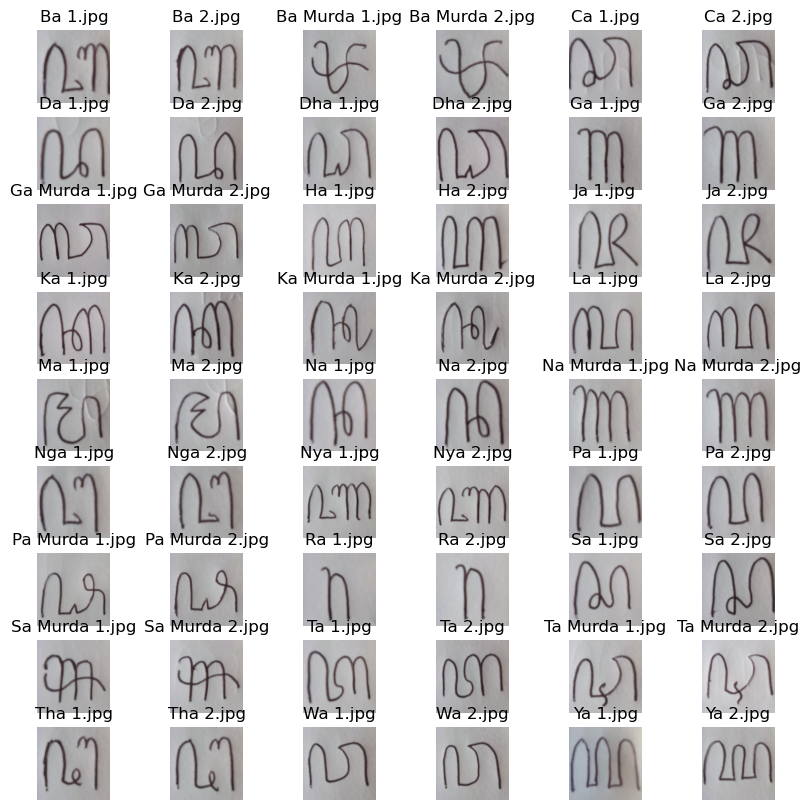

In [34]:
list_image = []
kelas_aktual_jenis = np.empty(54, dtype='object')
kelas_aktual_huruf = np.empty(54, dtype='object')
fig, axs = plt.subplots(nrows = 9, ncols = 6, figsize = (10,10))
axs = axs.flatten()

for i in range(54):
    filepath = os.path.join('Data Testing 1', os.listdir('Data Testing 1')[i])
    img = Image.open(filepath)
    list_image.append(img)
    axs [i].imshow(img)
    axs[i].axis('off')
    filename = os.listdir('Data Testing 1')[i]
    kelas_aktual_jenis[i] = filename
    kelas_aktual_huruf[i] = filename
    axs[i].set_title(filename)
plt.show()

In [35]:
for i in range(len(kelas_aktual_jenis)):
    
    if len(kelas_aktual_jenis[i]) > 9:
        kelas_aktual_jenis[i] = "Murda"
        kelas_aktual_huruf[i] = kelas_aktual_huruf[i][:8]
    elif len(kelas_aktual_jenis[i]) == 9 or len(kelas_aktual_jenis[i]) == 8:
        kelas_aktual_jenis[i] = "Ngelegena"
        if len(kelas_aktual_huruf[i]) == 8:
            kelas_aktual_huruf[i] = kelas_aktual_huruf[i][:2] 
        elif len(kelas_aktual_huruf[i]) == 9:
            kelas_aktual_huruf[i] = kelas_aktual_huruf[i][:3]
        
        
print(kelas_aktual_jenis)
print(kelas_aktual_huruf)

['Ngelegena' 'Ngelegena' 'Murda' 'Murda' 'Ngelegena' 'Ngelegena'
 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena'
 'Murda' 'Murda' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena'
 'Ngelegena' 'Ngelegena' 'Murda' 'Murda' 'Ngelegena' 'Ngelegena'
 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Murda' 'Murda'
 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena'
 'Murda' 'Murda' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Murda'
 'Murda' 'Ngelegena' 'Ngelegena' 'Murda' 'Murda' 'Ngelegena' 'Ngelegena'
 'Ngelegena' 'Ngelegena' 'Ngelegena' 'Ngelegena']
['Ba' 'Ba' 'Ba Murda' 'Ba Murda' 'Ca' 'Ca' 'Da' 'Da' 'Dha' 'Dha' 'Ga' 'Ga'
 'Ga Murda' 'Ga Murda' 'Ha' 'Ha' 'Ja' 'Ja' 'Ka' 'Ka' 'Ka Murda' 'Ka Murda'
 'La' 'La' 'Ma' 'Ma' 'Na' 'Na' 'Na Murda' 'Na Murda' 'Nga' 'Nga' 'Nya'
 'Nya' 'Pa' 'Pa' 'Pa Murda' 'Pa Murda' 'Ra' 'Ra' 'Sa' 'Sa' 'Sa Murda'
 'Sa Murda' 'Ta' 'Ta' 'Ta Murda' 'Ta Murda' 'Tha' 'Tha' 'Wa' 'Wa' 'Ya'
 'Ya']


#### Resize Data

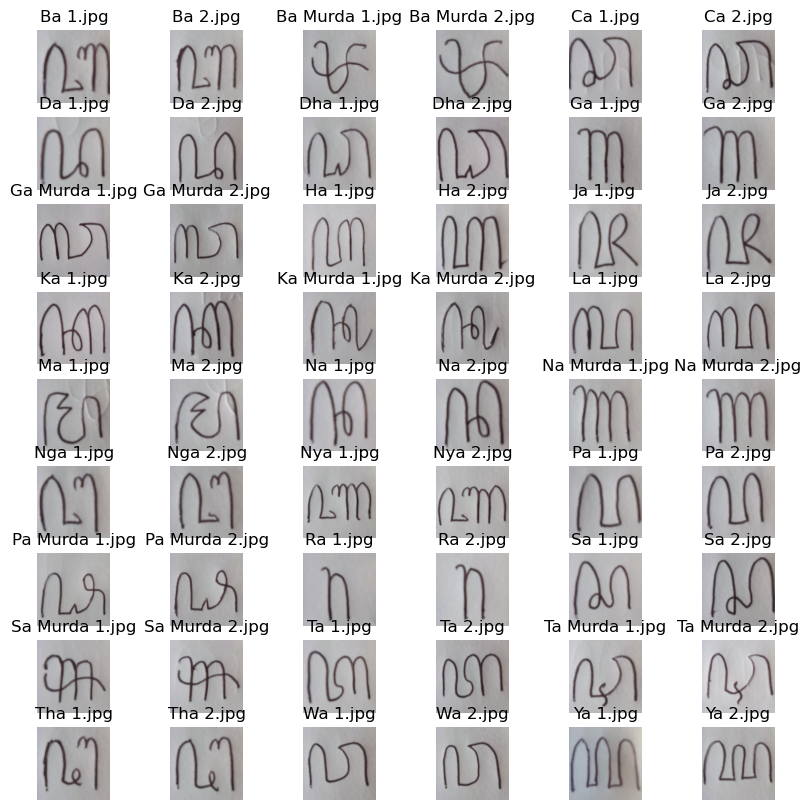

In [36]:
i = 0
resized_tests = []
fig, axs = plt.subplots(nrows = 9, ncols = 6, figsize = (10,10))
axs = axs.flatten()

for image in list_image:
    resized_test = image.resize((120, 120))
    resized_tests.append(resized_test)
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(os.listdir('Data Testing 1')[i])
    i += 1

plt.show()

#### Grayscale Data

In [37]:
grayscale_tests = []
for image in resized_tests:
    width, height = image.size
    grayscale_test = Image.new("L", (width, height))
        
    for x in range(width):
            
        for y in range(height):
            r, g, b = image.getpixel((x, y))
            brightness = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
            grayscale_test.putpixel((x, y), brightness)
            
    grayscale_tests.append(grayscale_test)

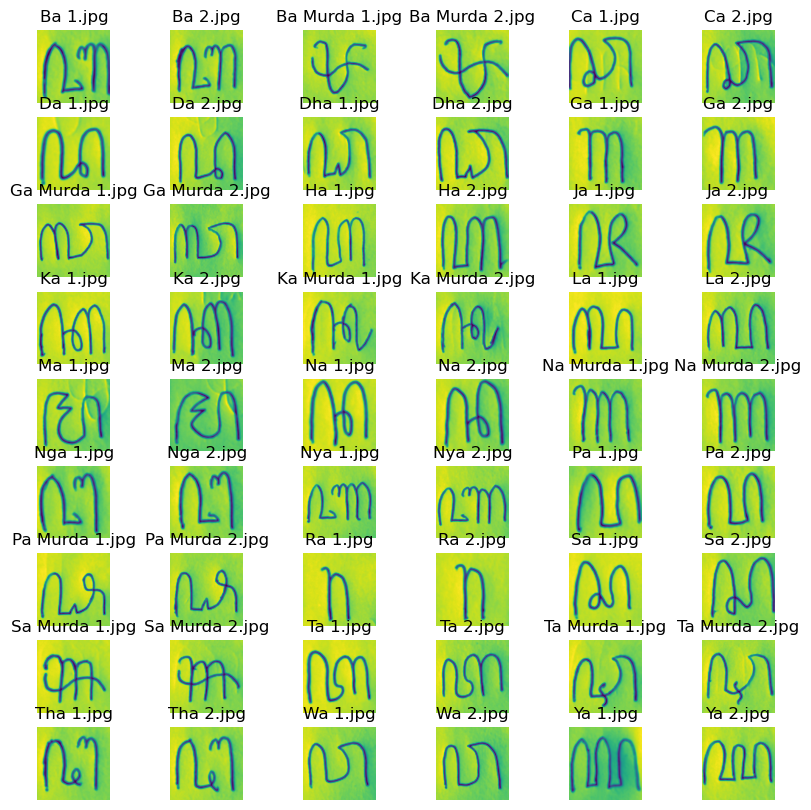

In [38]:
i = 0
fig, axs = plt.subplots(nrows = 9, ncols = 6, figsize = (10,10))
axs = axs.flatten()

for image in grayscale_tests:
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(os.listdir('Data Testing 1')[i])
    i += 1
    
plt.show()

#### Sauvola Threshold Data

In [39]:
k = 0.2
R = 128
threshold_tests = []

for image in grayscale_tests:
    image = image.rotate(270)
    image = image.transpose(method=Image.FLIP_LEFT_RIGHT)
    img_array = np.array(image)
    width, height = image.size
    binary_img = Image.new("1", (width, height))
        
    for x in range(width):
            
        for y in range(height):
            window = img_array[max(x-15, 0):min(x+15, width), max(y-15, 0):min(y+15, height)]
            mean = np.mean(window)
            stddev = np.std(window)
            threshold = mean * (1 + k * ((stddev / R) - 1))
                
            if img_array[x, y] > threshold:
                binary_img.putpixel((x, y), 0)
            else:
                binary_img.putpixel((x, y), 255)
    
    threshold_tests.append(binary_img)

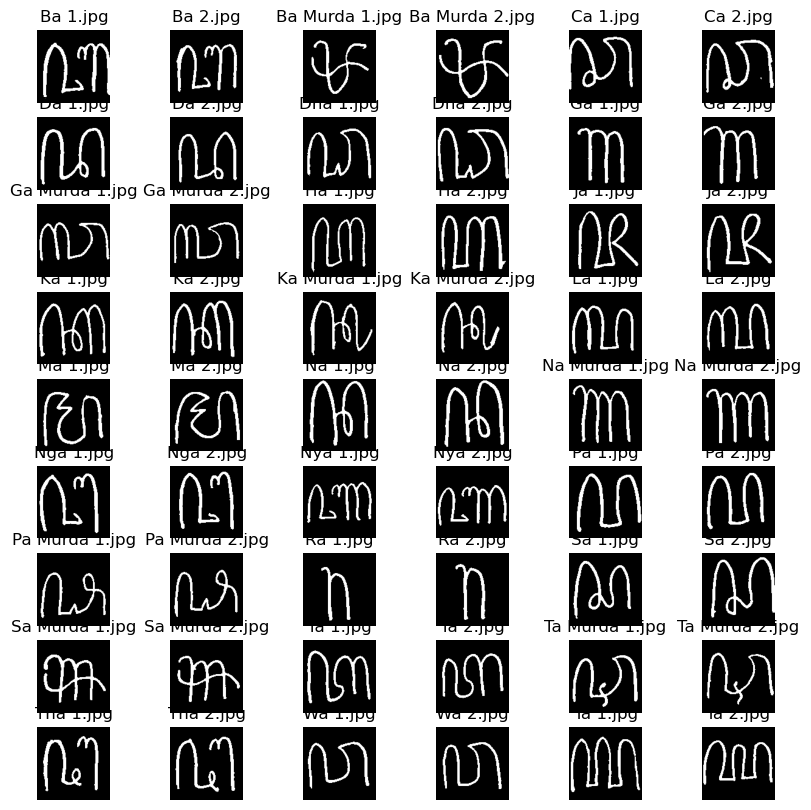

In [40]:
i = 0
fig, axs = plt.subplots(nrows = 9, ncols = 6, figsize = (10,10))
axs = axs.flatten()

for image in threshold_tests:
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(os.listdir('Data Testing 1')[i])
    i += 1
    
plt.show()

### Ekstraksi Zoning ICZ dan ZCZ

#### Ekstraksi Zoning

In [41]:
i = 0
array_tests = np.zeros((len(threshold_tests), 6))
centroid = np.zeros((len(threshold_tests), 8))

for image in threshold_tests:
    width, height = image.size
    zone_height = height // 3
    zone1 = image.crop((0, 0, width, zone_height))
    zone2 = image.crop((0, zone_height, width, zone_height * 2))
    zone3 = image.crop((0, zone_height * 2, width, height))
    
    img_array = np.array(image)
    img_zone1 = np.array(zone1)
    img_zone2 = np.array(zone2)
    img_zone3 = np.array(zone3)
    total_pixel = np.sum(img_array)
    total_zone1 = np.sum(img_zone1)
    total_zone2 = np.sum(img_zone2)
    total_zone3 = np.sum(img_zone3)
    
    kolom = 0
    baris = 0
    kolom_zone1 = 0
    kolom_zone2 = 0
    kolom_zone3 = 0
    baris_zone1 = 0
    baris_zone2 = 0
    baris_zone3 = 0
    sum_kolom = 0
    sum_baris = 0
    sumkolom_zone1 = 0
    sumkolom_zone2 = 0
    sumkolom_zone3 = 0
    sumbaris_zone1 = 0
    sumbaris_zone2 = 0
    sumbaris_zone3 = 0
    sumiczzone1 = 0
    sumiczzone2 = 0
    sumiczzone3 = 0
    sumzczzone1 = 0
    sumzczzone2 = 0
    sumzczzone3 = 0
    
    for x in range(width):
    
        for y in range(height):
            kolom += img_array[y][x]
            baris += img_array[x][y]
    
        sum_kolom += kolom * (x + 1)  
        sum_baris += baris * (x + 1)
            
        kolom = 0
        baris = 0
        
    for x in range(len(img_zone1)):
            
        for y in range(len(img_zone1[x])):
            baris_zone1 += img_zone1[x][y]
            baris_zone2 += img_zone2[x][y]
            baris_zone3 += img_zone3[x][y]

        sumbaris_zone1 += baris_zone1 * (x + 1)
        sumbaris_zone2 += baris_zone2 * (x + 1)
        sumbaris_zone3 += baris_zone3 * (x + 1)

        baris_zone1 = 0
        baris_zone2 = 0
        baris_zone3 = 0
            
    for x in range(len(img_zone1[0])):
            
        for y in range(len(img_zone1)):
            kolom_zone1 += img_zone1[y][x]
            kolom_zone2 += img_zone2[y][x]    
            kolom_zone3 += img_zone3[y][x]
                
        sumkolom_zone1 += kolom_zone1 * (x + 1)  
        sumkolom_zone2 += kolom_zone2 * (x + 1)  
        sumkolom_zone3 += kolom_zone3 * (x + 1)  
            
        kolom_zone1 = 0
        kolom_zone2 = 0
        kolom_zone3 = 0
            
    centroid_x = sum_kolom / total_pixel
    centroid_y = sum_baris / total_pixel
        
    centroidx_zone1 = sumkolom_zone1 / total_zone1
    centroidx_zone2 = sumkolom_zone2 / total_zone2
    centroidx_zone3 = sumkolom_zone3 / total_zone3
        
    centroidy_zone1 = sumbaris_zone1 / total_zone1
    centroidy_zone2 = sumbaris_zone2 / total_zone2
    centroidy_zone3 = sumbaris_zone3 / total_zone3
    
    if math.isnan(centroidx_zone1) and math.isnan(centroidy_zone1):
        centroidx_zone1 = 0
        centroidy_zone1 = 0
        
    if math.isnan(centroidx_zone2) and math.isnan(centroidy_zone2):
        centroidx_zone2 = 0
        centroidy_zone2 = 0
        
    if math.isnan(centroidx_zone3) and math.isnan(centroidy_zone3):
        centroidx_zone3 = 0
        centroidy_zone3 = 0
        
    centroid[i] = [centroid_x, centroid_y, centroidx_zone1, centroidx_zone2, centroidx_zone3, centroidy_zone1, centroidy_zone2, centroidy_zone3]
        
    for x in range(len(img_zone1)):
            
        for y in range(len(img_zone1[0])):
            if img_zone1[x][y] == True:
                sumiczzone1 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone1 += math.sqrt(pow(((y+1) - centroidx_zone1), 2) + pow(((x+1) - centroidy_zone1), 2))
                
            if img_zone2[x][y] == True:
                sumiczzone2 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone2 += math.sqrt(pow(((y+1) - centroidx_zone2), 2) + pow(((x+1) - centroidy_zone2), 2))
                
            if img_zone3[x][y] == True:
                sumiczzone3 += math.sqrt(pow(((y+1) - centroid_x), 2) + pow(((x+1) - centroid_y), 2))
                sumzczzone3 += math.sqrt(pow(((y+1) - centroidx_zone3), 2) + pow(((x+1) - centroidy_zone3), 2))
                    
    iczzone1 = sumiczzone1 / total_zone1
    iczzone2 = sumiczzone2 / total_zone2
    iczzone3 = sumiczzone3 / total_zone3
        
    zczzone1 = sumzczzone1 / total_zone1
    zczzone2 = sumzczzone2 / total_zone2
    zczzone3 = sumzczzone3 / total_zone3
    
    if math.isnan(iczzone1) and math.isnan(zczzone1):
        iczzone1 = 0
        zczzone1 = 0
        
    if math.isnan(iczzone2) and math.isnan(zczzone2):
        iczzone2 = 0
        zczzone2 = 0    
     
    if math.isnan(iczzone3) and math.isnan(zczzone3):
        iczzone3 = 0
        zczzone3 = 0
        
    array_tests[i] = [iczzone1, iczzone2, iczzone3, zczzone1, zczzone2, zczzone3]
             
    print("Nama File : ", os.listdir('Data Testing 1')[i])
    print("Centroid Citra: ({}, {})".format(centroid_x, centroid_y))
    print("Centroid Zona 1: ({}, {})".format(centroidx_zone1, centroidy_zone1))
    print("Centroid Zona 2: ({}, {})".format(centroidx_zone2, centroidy_zone2))
    print("Centroid Zona 3: ({}, {})".format(centroidx_zone3, centroidy_zone3))
    print("Ekstraksi ICZ: ({}, {}, {})".format(iczzone1, iczzone2, iczzone3))
    print("Ekstraksi ZCZ: ({}, {}, {})".format(zczzone1, zczzone2, zczzone3))
    print("\n")
        
    i += 1
    
df = pd.DataFrame(array_tests)
df.to_excel('Test 3 Zona(1).xlsx', index=False)

Nama File :  Ba 1.jpg
Centroid Citra: (66.13593481989709, 62.66552315608919)
Centroid Zona 1: (69.55555555555556, 31.574603174603176)
Centroid Zona 2: (65.99896587383661, 19.23578076525336)
Centroid Zona 3: (63.38503401360544, 13.827210884353741)
Ekstraksi ICZ: (44.46321800160618, 58.201249744555824, 60.049525338902846)
Ekstraksi ZCZ: (29.761168231241292, 38.16049066731456, 31.522639440677043)


Nama File :  Ba 2.jpg
Centroid Citra: (60.167735042735046, 60.05181623931624)
Centroid Zona 1: (62.861480075901326, 32.51043643263757)
Centroid Zona 2: (59.79526627218935, 19.536094674556214)
Centroid Zona 3: (57.958, 9.952)
Ekstraksi ICZ: (39.55583707693717, 53.92442603716294, 57.91883502786189)
Ekstraksi ZCZ: (26.2334021952886, 35.66062261984113, 25.859871397315125)


Nama File :  Ba Murda 1.jpg
Centroid Citra: (56.01063829787234, 58.93465045592705)
Centroid Zona 1: (60.34310850439883, 27.41348973607038)
Centroid Zona 2: (54.2283356258597, 21.92297111416781)
Centroid Zona 3: (55.2782258064516

Nama File :  Ka Murda 2.jpg
Centroid Citra: (54.501656726308816, 61.11000662690523)
Centroid Zona 1: (46.89665653495441, 30.70516717325228)
Centroid Zona 2: (56.5360824742268, 22.73310423825888)
Centroid Zona 3: (56.86644951140065, 9.078175895765472)
Ekstraksi ICZ: (37.579307597852896, 47.13500598740197, 61.853771029606484)
Ekstraksi ZCZ: (20.51204640706219, 25.87127437158006, 31.98021706961171)


Nama File :  La 1.jpg
Centroid Citra: (53.092696629213485, 62.9561797752809)
Centroid Zona 1: (52.10761154855643, 33.3989501312336)
Centroid Zona 2: (52.91475409836065, 20.908196721311477)
Centroid Zona 3: (54.20454545454545, 10.09504132231405)
Ekstraksi ICZ: (40.81125120784857, 52.85169007633741, 61.45081974531453)
Ekstraksi ZCZ: (25.623101478756, 31.113525856870112, 27.897961816558663)


Nama File :  La 2.jpg
Centroid Citra: (61.82754418037782, 60.85862279098111)
Centroid Zona 1: (63.86351706036746, 32.56430446194226)
Centroid Zona 2: (59.75981524249423, 20.45958429561201)
Centroid Zona 3: 

Nama File :  Sa Murda 2.jpg
Centroid Citra: (58.72287662740236, 61.799752014879104)
Centroid Zona 1: (48.694545454545455, 35.10181818181818)
Centroid Zona 2: (61.21563088512241, 21.336158192090394)
Centroid Zona 3: (59.1231884057971, 10.184782608695652)
Ekstraksi ICZ: (35.13669571715056, 49.416427202863936, 56.41128824258659)
Ekstraksi ZCZ: (19.91574030440478, 27.190239008020633, 20.91238399787658)


Nama File :  Ta 1.jpg
Centroid Citra: (55.43966421825813, 60.33892969569779)
Centroid Zona 1: (52.89655172413793, 30.96551724137931)
Centroid Zona 2: (57.89590254706534, 20.900332225913623)
Centroid Zona 3: (53.58835758835759, 11.162162162162161)
Ekstraksi ICZ: (41.95900754064409, 51.29352130803328, 58.61185905816415)
Ekstraksi ZCZ: (28.868352854315702, 32.086857699364415, 28.58881380633116)


Nama File :  Ta 2.jpg
Centroid Citra: (59.432382133995034, 57.67928039702233)
Centroid Zona 1: (66.45558086560365, 32.03872437357631)
Centroid Zona 2: (58.923603192702394, 20.323831242873432)
Centroi

In [42]:
df_test = pd.read_excel("Test 3 Zona(1).xlsx")
df_test

0          1          2          3          4          5
0   44.463218  58.201250  60.049525  29.761168  38.160491  31.522639
1   39.555837  53.924426  57.918835  26.233402  35.660623  25.859871
2   42.207835  44.568540  46.520512  27.981004  24.652573  12.128369
3   46.501146  50.328851  45.315348  30.209906  29.746391  16.106282
4   43.571971  43.469566  56.974751  31.997499  31.816787  27.665680
5   43.412723  52.359605  58.835552  27.825753  35.939946  26.303091
6   47.982554  54.884302  60.661003  32.868421  34.301564  29.007512
7   46.970093  58.911322  63.005928  30.691002  33.275889  27.125230
8   43.941226  54.918856  60.559810  26.867653  35.923711  25.768086
9   46.898299  58.258950  59.327681  30.794804  41.502514  29.003959
10  37.684698  44.790985  51.062761  19.642602  22.612689  20.798274
11  38.379420  44.380933  50.170850  21.487381  22.879773  21.525107
12  39.239050  53.926220  62.732153  29.307177  36.033041  26.669256
13  40.400987  54.327678  62.889724  29.469037  34.564463  25.822278
14  41.082419  51.547121  58.616538  23.818605  28.326916  26.894281
15  44.532660  54.360758  58.608010  26.861771  31.927983  30.948628
16  43.502446  48.462197  56.207120  25.201260  25.272130  26.744202
17  44.176303  50.114198  59.549174  26.892111  27.469004  29.016031
18  45.078392  53.606594  62.089582  30.410330  31.042993  31.337624
19  42.025094  49.512459  59.026979  25.195422  28.857655  29.406273
20  39.068130  48.035885  60.555720  22.575001  27.814572  31.754757
21  37.579308  47.135006  61.853771  20.512046  25.871274  31.980217
22  40.811251  52.851690  61.450820  25.623101  31.113526  27.897962
23  39.654379  51.824112  59.796716  26.773985  31.602413  26.146482
24  44.342553  56.972415  58.918859  25.087885  31.578651  28.852522
25  41.312731  54.870345  60.937615  25.529449  34.057723  31.559490
26  44.120767  45.503517  52.355992  28.662732  28.276695  27.253920
27  45.522165  48.138155  57.181585  27.363614  28.684214  31.150671
28  39.044687  45.882786  52.726513  23.223945  26.053027  25.525836
29  40.383530  47.701559  54.784400  26.898224  28.087794  27.674267
30  43.472244  54.417002  57.361550  27.888516  35.031223  29.485967
31  41.423024  50.393868  54.606692  26.232047  32.984941  25.995040
32  35.393831  52.775714  63.677030  21.404978  33.484728  29.179999
33  38.428453  58.532495  65.300479  24.247772  33.764451  29.022932
34  44.658653  53.306475  56.904792  29.507473  33.868441  28.978180
35  42.004182  49.435358  55.845077  27.431340  30.446521  25.959615
36  45.254013  61.776029  66.370475  27.533561  35.143013  27.514646
37  44.400322  58.634322  66.185195  30.365159  35.792086  27.349757
38  35.823323  49.547420  53.561666   9.741630  17.768650  17.134786
39  35.081711  44.982488  49.182344  11.843758  18.501081  16.452103
40  41.631862  47.040791  58.802658  27.101140  28.394706  25.770708
41  46.720074  48.899657  57.350198  32.261680  33.292177  28.129210
42  35.653748  48.489821  58.601768  19.521599  27.825653  23.562505
43  35.136696  49.416427  56.411288  19.915740  27.190239  20.912384
44  41.959008  51.293521  58.611859  28.868353  32.086858  28.588814
45  37.602401  49.557645  56.224694  24.187585  31.929467  21.582775
46  45.751941  57.292759  63.210662  28.831192  36.025622  26.953192
47  45.838323  52.834732  59.591983  34.239719  35.961726  23.603602
48  42.822828  49.223075  56.580708  28.164225  31.465710  24.778100
49  44.777062  54.315925  57.420003  27.429905  35.050065  25.590351
50  39.862994  52.909118  61.561147  26.467434  35.003358  28.570476
51  38.881386  53.844431  60.645836  21.891342  33.234253  28.324152
52  44.293913  52.813731  60.544427  27.569343  31.550186  31.178615
53  40.430740  51.340651  62.945768  29.088316  32.875473  28.924355

### Testing SVM

#### Kernel RBF untuk Binary

In [43]:
sigma = 2.1

def kernel_rbf(array_tests):
    array_rbf = np.zeros((len(array_ekstraksi), len(array_tests)))
    for i in range (len(array_tests)):
        for j in range (len(array_ekstraksi)):
            array_rbf[j, i] = math.exp(-(pow((array_tests[i][0] - array_ekstraksi[j][0]), 2)
                                        + pow((array_tests[i][1] - array_ekstraksi[j][1]), 2)
                                        + pow((array_tests[i][2] - array_ekstraksi[j][2]), 2)
                                        + pow((array_tests[i][3] - array_ekstraksi[j][3]), 2)
                                        + pow((array_tests[i][4] - array_ekstraksi[j][4]), 2)
                                        + pow((array_tests[i][5] - array_ekstraksi[j][5]), 2)) / (2 * pow(sigma, 2)))
    return array_rbf

rbf_tests = kernel_rbf(array_tests)
print(rbf_tests)

[[9.03303566e-05 1.20644463e-03 7.60072899e-28 ... 1.34892195e-05
  1.68358945e-01 9.68747624e-03]
 [1.80936194e-14 1.48643530e-06 1.18176374e-15 ... 2.71420351e-07
  5.71420381e-06 3.83533467e-08]
 [2.09560656e-05 3.89559475e-04 1.10019040e-26 ... 1.37364203e-05
  1.75600298e-01 1.60216241e-03]
 ...
 [1.69171595e-42 4.62118459e-29 2.61466113e-04 ... 1.06712236e-38
  2.49905693e-33 3.39701247e-35]
 [7.02560626e-32 4.14300510e-22 1.38508247e-07 ... 7.88776346e-31
  4.11637445e-26 8.65910929e-30]
 [1.43784667e-51 8.18219967e-35 1.48967158e-05 ... 1.48781818e-44
  3.00541469e-42 6.14023861e-45]]


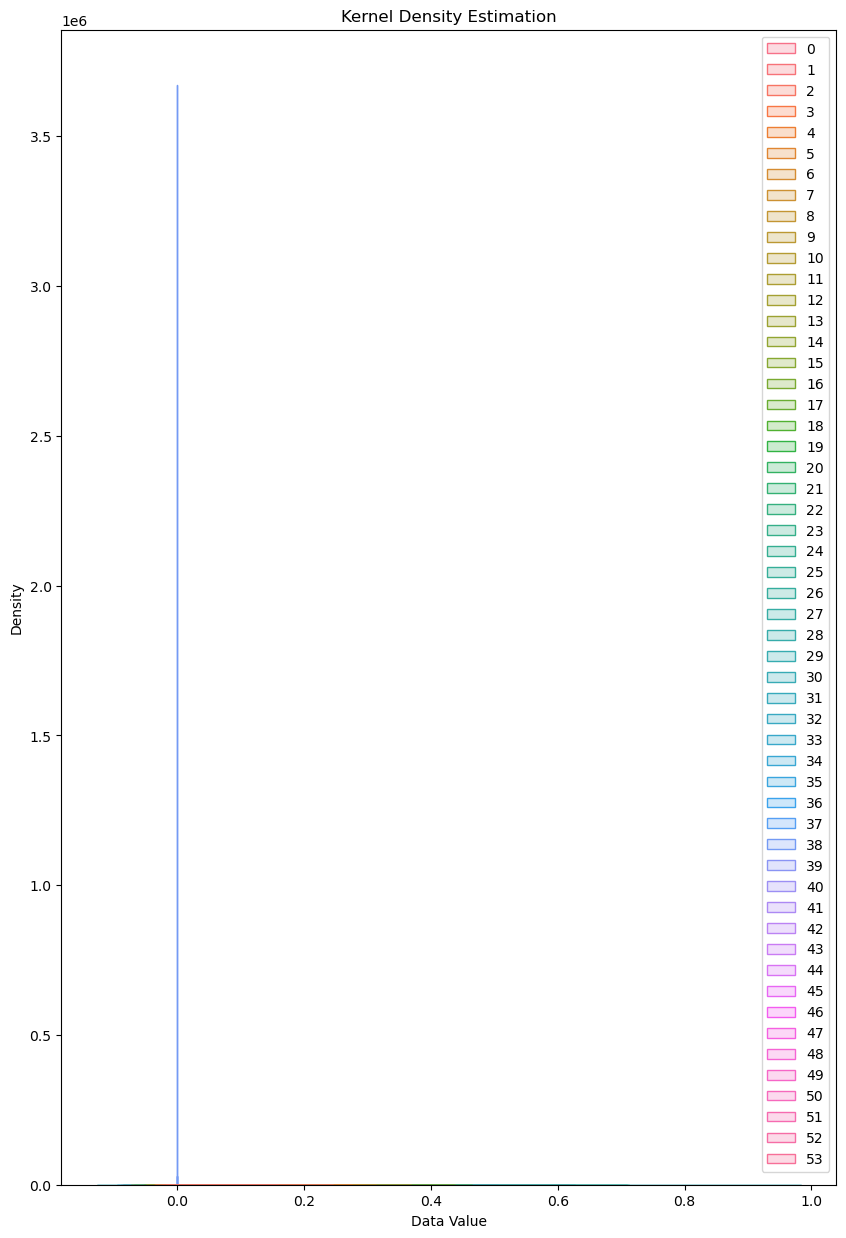

In [44]:
plt.figure(figsize=(10, 15))
sns.kdeplot(rbf_tests, fill=True)
plt.title('Kernel Density Estimation')
plt.xlabel('Data Value')
plt.ylabel('Density')
plt.show()

#### Klasifikasi Binary, Kernel RBF Multiclass dan Klasifikasi Multiclass 

In [45]:
matriks_bobot = np.zeros((len(array_ekstraksi)))
matriks_bobot_ha = np.zeros((len(array_ngelegena)))
matriks_bobot_na = np.zeros((len(array_ngelegena)))
matriks_bobot_ca = np.zeros((len(array_ngelegena)))
matriks_bobot_ra = np.zeros((len(array_ngelegena)))
matriks_bobot_ka = np.zeros((len(array_ngelegena)))
matriks_bobot_da = np.zeros((len(array_ngelegena)))
matriks_bobot_ta = np.zeros((len(array_ngelegena)))
matriks_bobot_sa = np.zeros((len(array_ngelegena)))
matriks_bobot_wa = np.zeros((len(array_ngelegena)))
matriks_bobot_la = np.zeros((len(array_ngelegena)))
matriks_bobot_pa = np.zeros((len(array_ngelegena)))
matriks_bobot_dha = np.zeros((len(array_ngelegena)))
matriks_bobot_ja = np.zeros((len(array_ngelegena)))
matriks_bobot_ya = np.zeros((len(array_ngelegena)))
matriks_bobot_nya = np.zeros((len(array_ngelegena)))
matriks_bobot_ma = np.zeros((len(array_ngelegena)))
matriks_bobot_ga = np.zeros((len(array_ngelegena)))
matriks_bobot_ba = np.zeros((len(array_ngelegena)))
matriks_bobot_tha = np.zeros((len(array_ngelegena)))
matriks_bobot_nga = np.zeros((len(array_ngelegena)))
matriks_bobot_namurda = np.zeros((len(array_murda)))
matriks_bobot_kamurda = np.zeros((len(array_murda)))
matriks_bobot_tamurda = np.zeros((len(array_murda)))
matriks_bobot_samurda = np.zeros((len(array_murda)))
matriks_bobot_pamurda = np.zeros((len(array_murda)))
matriks_bobot_gamurda = np.zeros((len(array_murda)))
matriks_bobot_bamurda = np.zeros((len(array_murda)))

In [46]:
kelas_prediksi = np.empty(54, dtype='object')
kelas_prediksi_huruf = np.empty(54, dtype='object')
array_rbf_murda = np.zeros((len(array_murda), 1))
array_rbf_ngelegena = np.zeros((len(array_ngelegena), 1))
tabel_hasil = np.zeros((len(array_tests), 2))
sigma_huruf = 2
sigma_murda = 3
a = 0

for i in range(rbf_tests.shape[1]):
    for j in range(rbf_tests.shape[0]):
        matriks_bobot[j] = alpha[j] * model[j][6] * rbf_tests[j, i]
    total_bobot_jenis = np.sum(matriks_bobot)
    hasil_klasifikasi = total_bobot_jenis + bias
    if hasil_klasifikasi > 0:
        kelas_prediksi[i] = "Ngelegena"
        for k in range (1):
            for l in range (len(array_ngelegena)):
                array_rbf_ngelegena[l, k] = math.exp(-(pow((array_tests[a][0] - array_ngelegena[l][0]), 2)
                                                    + pow((array_tests[a][1] - array_ngelegena[l][1]), 2)
                                                    + pow((array_tests[a][2] - array_ngelegena[l][2]), 2)
                                                    + pow((array_tests[a][3] - array_ngelegena[l][3]), 2)
                                                    + pow((array_tests[a][4] - array_ngelegena[l][4]), 2)
                                                    + pow((array_tests[a][5] - array_ngelegena[l][5]), 2)) / (2 * pow(sigma_huruf, 2)))
        a += 1
        for k in range(21):
            if k == 0:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ha[m] = alpha_ha[m] * model_ha[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ha)
                hasil_klasifikasi_huruf = total_bobot + bias_ha
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ha"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 1:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_na[m] = alpha_na[m] * model_na[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_na)
                hasil_klasifikasi_huruf = total_bobot + bias_na
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Na"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 2:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ca[m] = alpha_ca[m] * model_ca[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ca)
                hasil_klasifikasi_huruf = total_bobot + bias_ca
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ca"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 3:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ra[m] = alpha_ra[m] * model_ra[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ra)
                hasil_klasifikasi_huruf = total_bobot + bias_ra
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ra"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 4:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ka[m] = alpha_ka[m] * model_ka[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ka)
                hasil_klasifikasi_huruf = total_bobot + bias_ka
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ka"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 5:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_da[m] = alpha_da[m] * model_da[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_da)
                hasil_klasifikasi_huruf = total_bobot + bias_da
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Da"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 6:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ta[m] = alpha_ta[m] * model_ta[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ta)
                hasil_klasifikasi_huruf = total_bobot + bias_ta
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ta"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 7:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_sa[m] = alpha_sa[m] * model_sa[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_sa)
                hasil_klasifikasi_huruf = total_bobot + bias_sa
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Sa"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 8:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_wa[m] = alpha_wa[m] * model_wa[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_wa)
                hasil_klasifikasi_huruf = total_bobot + bias_wa
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Wa"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 9:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_la[m] = alpha_la[m] * model_la[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_la)
                hasil_klasifikasi_huruf = total_bobot + bias_la
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "La"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 10:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_pa[m] = alpha_pa[m] * model_pa[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_pa)
                hasil_klasifikasi_huruf = total_bobot + bias_pa
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Pa"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 11:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_dha[m] = alpha_dha[m] * model_dha[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_dha)
                hasil_klasifikasi_huruf = total_bobot + bias_dha
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Dha"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 12:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ja[m] = alpha_ja[m] * model_ja[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ja)
                hasil_klasifikasi_huruf = total_bobot + bias_ja
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ja"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 13:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ya[m] = alpha_ya[m] * model_ya[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ya)
                hasil_klasifikasi_huruf = total_bobot + bias_ya
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ya"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 14:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_nya[m] = alpha_nya[m] * model_nya[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_nya)
                hasil_klasifikasi_huruf = total_bobot + bias_nya
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Nya"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 15:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ma[m] = alpha_ma[m] * model_ma[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ma)
                hasil_klasifikasi_huruf = total_bobot + bias_ma
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ma"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 16:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ga[m] = alpha_ga[m] * model_ga[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ga)
                hasil_klasifikasi_huruf = total_bobot + bias_ga
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ga"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 17:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_ba[m] = alpha_ba[m] * model_ba[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ba)
                hasil_klasifikasi_huruf = total_bobot + bias_ba
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ba"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 18:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_tha[m] = alpha_tha[m] * model_tha[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_tha)
                hasil_klasifikasi_huruf = total_bobot + bias_tha
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Tha"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 19:
                for m in range(array_rbf_ngelegena.shape[0]):
                    matriks_bobot_nga[m] = alpha_nga[m] * model_nga[m][6] * array_rbf_ngelegena[m, 0]
                total_bobot = np.sum(matriks_bobot_ha)
                hasil_klasifikasi_huruf = total_bobot + bias_nga
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Nga"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            else:
                kelas_prediksi_huruf[i] = "Tak Terdefinisi"
                print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
    else:
        kelas_prediksi[i] = "Murda"
        for k in range (1):
            for l in range (len(array_murda)):
                array_rbf_murda[l, k] = math.exp(-(pow((array_tests[a][0] - array_murda[l][0]), 2)
                                                    + pow((array_tests[a][1] - array_murda[l][1]), 2)
                                                    + pow((array_tests[a][2] - array_murda[l][2]), 2)
                                                    + pow((array_tests[a][3] - array_murda[l][3]), 2)
                                                    + pow((array_tests[a][4] - array_murda[l][4]), 2)
                                                    + pow((array_tests[a][5] - array_murda[l][5]), 2)) / (2 * pow(sigma_murda, 2)))
        a += 1
        for k in range(8):
            if k == 0:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_namurda[m] = alpha_namurda[m] * model_namurda[m][6] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_namurda)
                hasil_klasifikasi_huruf = total_bobot + bias_namurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Na Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 1:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_kamurda[m] = alpha_kamurda[m] * model_kamurda[m][6] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_kamurda)
                hasil_klasifikasi_huruf = total_bobot + bias_kamurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ka Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 2:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_tamurda[m] = alpha_tamurda[m] * model_tamurda[m][6] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_tamurda)
                hasil_klasifikasi_huruf = total_bobot + bias_tamurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ta Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 3:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_samurda[m] = alpha_samurda[m] * model_samurda[m][6] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_samurda)
                hasil_klasifikasi_huruf = total_bobot + bias_samurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Sa Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 4:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_pamurda[m] = alpha_pamurda[m] * model_pamurda[m][6] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_pamurda)
                hasil_klasifikasi_huruf = total_bobot + bias_pamurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Pa Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 5:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_gamurda[m] = alpha_gamurda[m] * model_gamurda[m][6] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_gamurda)
                hasil_klasifikasi_huruf = total_bobot + bias_gamurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ga Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            elif k == 6:
                for m in range(array_rbf_murda.shape[0]):
                    matriks_bobot_bamurda[m] = alpha_bamurda[m] * model_bamurda[m][6] * array_rbf_murda[m, 0]
                total_bobot = np.sum(matriks_bobot_bamurda)
                hasil_klasifikasi_huruf = total_bobot + bias_bamurda
                if hasil_klasifikasi_huruf > 0:
                    kelas_prediksi_huruf[i] = "Ba Murda"
                    print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                    break
            else:
                kelas_prediksi_huruf[i] = "Tak Terdefinisi"
                print(i, kelas_prediksi[i], kelas_prediksi_huruf[i])
                
    tabel_hasil[i] = [total_bobot_jenis, hasil_klasifikasi]

0 Murda Pa Murda
1 Murda Ta Murda
2 Murda Tak Terdefinisi
3 Murda Ba Murda
4 Murda Tak Terdefinisi
5 Murda Ta Murda
6 Murda Tak Terdefinisi
7 Murda Pa Murda
8 Murda Ta Murda
9 Murda Tak Terdefinisi
10 Murda Sa Murda
11 Murda Na Murda
12 Murda Tak Terdefinisi
13 Murda Tak Terdefinisi
14 Murda Tak Terdefinisi
15 Ngelegena Ha
16 Murda Na Murda
17 Murda Ka Murda
18 Murda Tak Terdefinisi
19 Murda Ka Murda
20 Murda Tak Terdefinisi
21 Murda Tak Terdefinisi
22 Murda Tak Terdefinisi
23 Murda Tak Terdefinisi
24 Murda Tak Terdefinisi
25 Murda Tak Terdefinisi
26 Murda Tak Terdefinisi
27 Murda Tak Terdefinisi
28 Murda Na Murda
29 Murda Na Murda
30 Ngelegena Ca
31 Murda Ta Murda
32 Murda Tak Terdefinisi
33 Murda Tak Terdefinisi
34 Ngelegena Ha
35 Murda Tak Terdefinisi
36 Murda Tak Terdefinisi
37 Murda Ga Murda
38 Murda Tak Terdefinisi
39 Murda Tak Terdefinisi
40 Murda Tak Terdefinisi
41 Murda Tak Terdefinisi
42 Murda Tak Terdefinisi
43 Murda Tak Terdefinisi
44 Murda Tak Terdefinisi
45 Murda Tak Terd

In [48]:
for i in range(54):
    if kelas_prediksi[i] == "Ngelegena":
        kelas_prediksi[i] = 1
    elif kelas_prediksi[i] == "Murda":
        kelas_prediksi[i] = 2
        
for i in range(54):
    if kelas_aktual_jenis[i] == "Ngelegena":
        kelas_aktual_jenis[i] = 1
    elif kelas_aktual_jenis[i] == "Murda":
        kelas_aktual_jenis[i] = 2

In [49]:
for i in range(len(kelas_prediksi_huruf)):
    if kelas_prediksi_huruf[i] == "Ha":
        kelas_prediksi_huruf[i] = 1
    elif kelas_prediksi_huruf[i] == "Na":
        kelas_prediksi_huruf[i] = 2
    elif kelas_prediksi_huruf[i] == "Ca":
        kelas_prediksi_huruf[i] = 3
    elif kelas_prediksi_huruf[i] == "Ra":
        kelas_prediksi_huruf[i] = 4
    elif kelas_prediksi_huruf[i] == "Ka":
        kelas_prediksi_huruf[i] = 5
    elif kelas_prediksi_huruf[i] == "Da":
        kelas_prediksi_huruf[i] = 6
    elif kelas_prediksi_huruf[i] == "Ta":
        kelas_prediksi_huruf[i] = 7
    elif kelas_prediksi_huruf[i] == "Sa":
        kelas_prediksi_huruf[i] = 8
    elif kelas_prediksi_huruf[i] == "Wa":
        kelas_prediksi_huruf[i] = 9
    elif kelas_prediksi_huruf[i] == "La":
        kelas_prediksi_huruf[i] = 10
    elif kelas_prediksi_huruf[i] == "Pa":
        kelas_prediksi_huruf[i] = 11
    elif kelas_prediksi_huruf[i] == "Dha":
        kelas_prediksi_huruf[i] = 12
    elif kelas_prediksi_huruf[i] == "Ja":
        kelas_prediksi_huruf[i] = 13
    elif kelas_prediksi_huruf[i] == "Ya":
        kelas_prediksi_huruf[i] = 14
    elif kelas_prediksi_huruf[i] == "Nya":
        kelas_prediksi_huruf[i] = 15
    elif kelas_prediksi_huruf[i] == "Ma":
        kelas_prediksi_huruf[i] = 16
    elif kelas_prediksi_huruf[i] == "Ga":
        kelas_prediksi_huruf[i] = 17
    elif kelas_prediksi_huruf[i] == "Ba":
        kelas_prediksi_huruf[i] = 18
    elif kelas_prediksi_huruf[i] == "Tha":
        kelas_prediksi_huruf[i] = 19
    elif kelas_prediksi_huruf[i] == "Nga":
        kelas_prediksi_huruf[i] = 20
    elif kelas_prediksi_huruf[i] == "Na Murda":
        kelas_prediksi_huruf[i] = 21
    elif kelas_prediksi_huruf[i] == "Ka Murda":
        kelas_prediksi_huruf[i] = 22
    elif kelas_prediksi_huruf[i] == "Ta Murda":
        kelas_prediksi_huruf[i] = 23
    elif kelas_prediksi_huruf[i] == "Sa Murda":
        kelas_prediksi_huruf[i] = 24
    elif kelas_prediksi_huruf[i] == "Pa Murda":
        kelas_prediksi_huruf[i] = 25
    elif kelas_prediksi_huruf[i] == "Ga Murda":
        kelas_prediksi_huruf[i] = 26
    elif kelas_prediksi_huruf[i] == "Ba Murda":
        kelas_prediksi_huruf[i] = 27
    elif kelas_prediksi_huruf[i] == "Tak Terdefinisi":
        kelas_prediksi_huruf[i] = 28

In [50]:
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == "Ha":
        kelas_aktual_huruf[i] = 1
    elif kelas_aktual_huruf[i] == "Na":
        kelas_aktual_huruf[i] = 2
    elif kelas_aktual_huruf[i] == "Ca":
        kelas_aktual_huruf[i] = 3
    elif kelas_aktual_huruf[i] == "Ra":
        kelas_aktual_huruf[i] = 4
    elif kelas_aktual_huruf[i] == "Ka":
        kelas_aktual_huruf[i] = 5
    elif kelas_aktual_huruf[i] == "Da":
        kelas_aktual_huruf[i] = 6
    elif kelas_aktual_huruf[i] == "Ta":
        kelas_aktual_huruf[i] = 7
    elif kelas_aktual_huruf[i] == "Sa":
        kelas_aktual_huruf[i] = 8
    elif kelas_aktual_huruf[i] == "Wa":
        kelas_aktual_huruf[i] = 9
    elif kelas_aktual_huruf[i] == "La":
        kelas_aktual_huruf[i] = 10
    elif kelas_aktual_huruf[i] == "Pa":
        kelas_aktual_huruf[i] = 11
    elif kelas_aktual_huruf[i] == "Dha":
        kelas_aktual_huruf[i] = 12
    elif kelas_aktual_huruf[i] == "Ja":
        kelas_aktual_huruf[i] = 13
    elif kelas_aktual_huruf[i] == "Ya":
        kelas_aktual_huruf[i] = 14
    elif kelas_aktual_huruf[i] == "Nya":
        kelas_aktual_huruf[i] = 15
    elif kelas_aktual_huruf[i] == "Ma":
        kelas_aktual_huruf[i] = 16
    elif kelas_aktual_huruf[i] == "Ga":
        kelas_aktual_huruf[i] = 17
    elif kelas_aktual_huruf[i] == "Ba":
        kelas_aktual_huruf[i] = 18
    elif kelas_aktual_huruf[i] == "Tha":
        kelas_aktual_huruf[i] = 19
    elif kelas_aktual_huruf[i] == "Nga":
        kelas_aktual_huruf[i] = 20
    elif kelas_aktual_huruf[i] == "Na Murda":
        kelas_aktual_huruf[i] = 21
    elif kelas_aktual_huruf[i] == "Ka Murda":
        kelas_aktual_huruf[i] = 22
    elif kelas_aktual_huruf[i] == "Ta Murda":
        kelas_aktual_huruf[i] = 23
    elif kelas_aktual_huruf[i] == "Sa Murda":
        kelas_aktual_huruf[i] = 24
    elif kelas_aktual_huruf[i] == "Pa Murda":
        kelas_aktual_huruf[i] = 25
    elif kelas_aktual_huruf[i] == "Ga Murda":
        kelas_aktual_huruf[i] = 26
    elif kelas_aktual_huruf[i] == "Ba Murda":
        kelas_aktual_huruf[i] = 27

In [51]:
print("No", "KA", "KP", "KAH", "KPH", "  NF")
for i in range(54):
    filename = os.listdir('Data Testing 1')[i]
    print(i, kelas_aktual_jenis[i], " ", kelas_prediksi[i], " ", kelas_aktual_huruf[i], " ", kelas_prediksi_huruf[i], " ", filename)

No KA KP KAH KPH   NF
0 1   2   18   25   Ba 1.jpg
1 1   2   18   23   Ba 2.jpg
2 2   2   27   28   Ba Murda 1.jpg
3 2   2   27   27   Ba Murda 2.jpg
4 1   2   3   28   Ca 1.jpg
5 1   2   3   23   Ca 2.jpg
6 1   2   6   28   Da 1.jpg
7 1   2   6   25   Da 2.jpg
8 1   2   12   23   Dha 1.jpg
9 1   2   12   28   Dha 2.jpg
10 1   2   17   24   Ga 1.jpg
11 1   2   17   21   Ga 2.jpg
12 2   2   26   28   Ga Murda 1.jpg
13 2   2   26   28   Ga Murda 2.jpg
14 1   2   1   28   Ha 1.jpg
15 1   1   1   1   Ha 2.jpg
16 1   2   13   21   Ja 1.jpg
17 1   2   13   22   Ja 2.jpg
18 1   2   5   28   Ka 1.jpg
19 1   2   5   22   Ka 2.jpg
20 2   2   22   28   Ka Murda 1.jpg
21 2   2   22   28   Ka Murda 2.jpg
22 1   2   10   28   La 1.jpg
23 1   2   10   28   La 2.jpg
24 1   2   16   28   Ma 1.jpg
25 1   2   16   28   Ma 2.jpg
26 1   2   2   28   Na 1.jpg
27 1   2   2   28   Na 2.jpg
28 2   2   21   21   Na Murda 1.jpg
29 2   2   21   21   Na Murda 2.jpg
30 1   1   20   3   Nga 1.jpg
31 1   2   20   23 

### Confusion Matriks

#### Mencari TP, TN, FP dan FN

In [52]:
confussion_matriks = [[0,0],[0,0]]

confussion_matriks_ha = [[0,0],[0,0]]
confussion_matriks_na = [[0,0],[0,0]]
confussion_matriks_ca = [[0,0],[0,0]]
confussion_matriks_ra = [[0,0],[0,0]]
confussion_matriks_ka = [[0,0],[0,0]]
confussion_matriks_da = [[0,0],[0,0]]
confussion_matriks_ta = [[0,0],[0,0]]
confussion_matriks_sa = [[0,0],[0,0]]
confussion_matriks_wa = [[0,0],[0,0]]
confussion_matriks_la = [[0,0],[0,0]]
confussion_matriks_pa = [[0,0],[0,0]]
confussion_matriks_dha = [[0,0],[0,0]]
confussion_matriks_ja = [[0,0],[0,0]]
confussion_matriks_ya = [[0,0],[0,0]]
confussion_matriks_nya = [[0,0],[0,0]]
confussion_matriks_ma = [[0,0],[0,0]]
confussion_matriks_ga = [[0,0],[0,0]]
confussion_matriks_ba = [[0,0],[0,0]]
confussion_matriks_tha = [[0,0],[0,0]]
confussion_matriks_nga = [[0,0],[0,0]]

confussion_matriks_namurda = [[0,0],[0,0]]
confussion_matriks_kamurda = [[0,0],[0,0]]
confussion_matriks_tamurda = [[0,0],[0,0]]
confussion_matriks_samurda = [[0,0],[0,0]]
confussion_matriks_pamurda = [[0,0],[0,0]]
confussion_matriks_gamurda = [[0,0],[0,0]]
confussion_matriks_bamurda = [[0,0],[0,0]]

for i in range(len(kelas_aktual_jenis)):
    if kelas_aktual_jenis[i] == 1 and kelas_prediksi[i] == 1:
        confussion_matriks[1][1] += 1
    elif kelas_aktual_jenis[i] == 1 and kelas_prediksi[i] == 2:
        confussion_matriks[1][0] += 1
    elif kelas_aktual_jenis[i] == 2 and kelas_prediksi[i] == 1:
        confussion_matriks[0][1] += 1
    elif kelas_aktual_jenis[i] == 2 and kelas_prediksi[i] == 2:
        confussion_matriks[0][0] += 1

In [53]:
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 1 and kelas_prediksi_huruf[i] == 1:
        confussion_matriks_ha[1][1] += 1
    elif kelas_aktual_huruf[i] == 1 and kelas_prediksi_huruf[i] != 1:
        confussion_matriks_ha[1][0] += 1
    elif kelas_aktual_huruf[i] != 1 and kelas_prediksi_huruf[i] == 1:
        confussion_matriks_ha[0][1] += 1
    elif kelas_aktual_huruf[i] != 1 and kelas_prediksi_huruf[i] != 1:
        confussion_matriks_ha[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 2 and kelas_prediksi_huruf[i] == 2:
        confussion_matriks_na[1][1] += 1
    elif kelas_aktual_huruf[i] == 2 and kelas_prediksi_huruf[i] != 2:
        confussion_matriks_na[1][0] += 1
    elif kelas_aktual_huruf[i] != 2 and kelas_prediksi_huruf[i] == 2:
        confussion_matriks_na[0][1] += 1
    elif kelas_aktual_huruf[i] != 2 and kelas_prediksi_huruf[i] != 2:
        confussion_matriks_na[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 3 and kelas_prediksi_huruf[i] == 3:
        confussion_matriks_ca[1][1] += 1
    elif kelas_aktual_huruf[i] == 3 and kelas_prediksi_huruf[i] != 3:
        confussion_matriks_ca[1][0] += 1
    elif kelas_aktual_huruf[i] != 3 and kelas_prediksi_huruf[i] == 3:
        confussion_matriks_ca[0][1] += 1
    elif kelas_aktual_huruf[i] != 3 and kelas_prediksi_huruf[i] != 3:
        confussion_matriks_ca[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 4 and kelas_prediksi_huruf[i] == 4:
        confussion_matriks_ra[1][1] += 1
    elif kelas_aktual_huruf[i] == 4 and kelas_prediksi_huruf[i] != 4:
        confussion_matriks_ra[1][0] += 1
    elif kelas_aktual_huruf[i] != 4 and kelas_prediksi_huruf[i] == 4:
        confussion_matriks_ra[0][1] += 1
    elif kelas_aktual_huruf[i] != 4 and kelas_prediksi_huruf[i] != 4:
        confussion_matriks_ra[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 5 and kelas_prediksi_huruf[i] == 5:
        confussion_matriks_ka[1][1] += 1
    elif kelas_aktual_huruf[i] == 5 and kelas_prediksi_huruf[i] != 5:
        confussion_matriks_ka[1][0] += 1
    elif kelas_aktual_huruf[i] != 5 and kelas_prediksi_huruf[i] == 5:
        confussion_matriks_ka[0][1] += 1
    elif kelas_aktual_huruf[i] != 5 and kelas_prediksi_huruf[i] != 5:
        confussion_matriks_ka[0][0] += 1
    
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 6 and kelas_prediksi_huruf[i] == 6:
        confussion_matriks_da[1][1] += 1
    elif kelas_aktual_huruf[i] == 6 and kelas_prediksi_huruf[i] != 6:
        confussion_matriks_da[1][0] += 1
    elif kelas_aktual_huruf[i] != 6 and kelas_prediksi_huruf[i] == 6:
        confussion_matriks_da[0][1] += 1
    elif kelas_aktual_huruf[i] != 6 and kelas_prediksi_huruf[i] != 6:
        confussion_matriks_da[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 7 and kelas_prediksi_huruf[i] == 7:
        confussion_matriks_ta[1][1] += 1
    elif kelas_aktual_huruf[i] == 7 and kelas_prediksi_huruf[i] != 7:
        confussion_matriks_ta[1][0] += 1
    elif kelas_aktual_huruf[i] != 7 and kelas_prediksi_huruf[i] == 7:
        confussion_matriks_ta[0][1] += 1
    elif kelas_aktual_huruf[i] != 7 and kelas_prediksi_huruf[i] != 7:
        confussion_matriks_ta[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 8 and kelas_prediksi_huruf[i] == 8:
        confussion_matriks_sa[1][1] += 1
    elif kelas_aktual_huruf[i] == 8 and kelas_prediksi_huruf[i] != 8:
        confussion_matriks_sa[1][0] += 1
    elif kelas_aktual_huruf[i] != 8 and kelas_prediksi_huruf[i] == 8:
        confussion_matriks_sa[0][1] += 1
    elif kelas_aktual_huruf[i] != 8 and kelas_prediksi_huruf[i] != 8:
        confussion_matriks_sa[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 9 and kelas_prediksi_huruf[i] == 9:
        confussion_matriks_wa[1][1] += 1
    elif kelas_aktual_huruf[i] == 9 and kelas_prediksi_huruf[i] != 9:
        confussion_matriks_wa[1][0] += 1
    elif kelas_aktual_huruf[i] != 9 and kelas_prediksi_huruf[i] == 9:
        confussion_matriks_wa[0][1] += 1
    elif kelas_aktual_huruf[i] != 9 and kelas_prediksi_huruf[i] != 9:
        confussion_matriks_wa[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 10 and kelas_prediksi_huruf[i] == 10:
        confussion_matriks_la[1][1] += 1
    elif kelas_aktual_huruf[i] == 10 and kelas_prediksi_huruf[i] != 10:
        confussion_matriks_la[1][0] += 1
    elif kelas_aktual_huruf[i] != 10 and kelas_prediksi_huruf[i] == 10:
        confussion_matriks_la[0][1] += 1
    elif kelas_aktual_huruf[i] != 10 and kelas_prediksi_huruf[i] != 10:
        confussion_matriks_la[0][0] += 1

In [54]:
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 11 and kelas_prediksi_huruf[i] == 11:
        confussion_matriks_pa[1][1] += 1
    elif kelas_aktual_huruf[i] == 11 and kelas_prediksi_huruf[i] != 11:
        confussion_matriks_pa[1][0] += 1
    elif kelas_aktual_huruf[i] != 11 and kelas_prediksi_huruf[i] == 11:
        confussion_matriks_pa[0][1] += 1
    elif kelas_aktual_huruf[i] != 11 and kelas_prediksi_huruf[i] != 11:
        confussion_matriks_pa[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 12 and kelas_prediksi_huruf[i] == 12:
        confussion_matriks_dha[1][1] += 1
    elif kelas_aktual_huruf[i] == 12 and kelas_prediksi_huruf[i] != 12:
        confussion_matriks_dha[1][0] += 1
    elif kelas_aktual_huruf[i] != 12 and kelas_prediksi_huruf[i] == 12:
        confussion_matriks_dha[0][1] += 1
    elif kelas_aktual_huruf[i] != 12 and kelas_prediksi_huruf[i] != 12:
        confussion_matriks_dha[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 13 and kelas_prediksi_huruf[i] == 13:
        confussion_matriks_ja[1][1] += 1
    elif kelas_aktual_huruf[i] == 13 and kelas_prediksi_huruf[i] != 13:
        confussion_matriks_ja[1][0] += 1
    elif kelas_aktual_huruf[i] != 13 and kelas_prediksi_huruf[i] == 13:
        confussion_matriks_ja[0][1] += 1
    elif kelas_aktual_huruf[i] != 13 and kelas_prediksi_huruf[i] != 13:
        confussion_matriks_ja[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 14 and kelas_prediksi_huruf[i] == 14:
        confussion_matriks_ya[1][1] += 1
    elif kelas_aktual_huruf[i] == 14 and kelas_prediksi_huruf[i] != 14:
        confussion_matriks_ya[1][0] += 1
    elif kelas_aktual_huruf[i] != 14 and kelas_prediksi_huruf[i] == 14:
        confussion_matriks_ya[0][1] += 1
    elif kelas_aktual_huruf[i] != 14 and kelas_prediksi_huruf[i] != 14:
        confussion_matriks_ya[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 15 and kelas_prediksi_huruf[i] == 15:
        confussion_matriks_nya[1][1] += 1
    elif kelas_aktual_huruf[i] == 15 and kelas_prediksi_huruf[i] != 15:
        confussion_matriks_nya[1][0] += 1
    elif kelas_aktual_huruf[i] != 15 and kelas_prediksi_huruf[i] == 15:
        confussion_matriks_nya[0][1] += 1
    elif kelas_aktual_huruf[i] != 15 and kelas_prediksi_huruf[i] != 15:
        confussion_matriks_nya[0][0] += 1
    
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 16 and kelas_prediksi_huruf[i] == 16:
        confussion_matriks_ma[1][1] += 1
    elif kelas_aktual_huruf[i] == 16 and kelas_prediksi_huruf[i] != 16:
        confussion_matriks_ma[1][0] += 1
    elif kelas_aktual_huruf[i] != 16 and kelas_prediksi_huruf[i] == 16:
        confussion_matriks_ma[0][1] += 1
    elif kelas_aktual_huruf[i] != 16 and kelas_prediksi_huruf[i] != 16:
        confussion_matriks_ma[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 17 and kelas_prediksi_huruf[i] == 17:
        confussion_matriks_ga[1][1] += 1
    elif kelas_aktual_huruf[i] == 17 and kelas_prediksi_huruf[i] != 17:
        confussion_matriks_ga[1][0] += 1
    elif kelas_aktual_huruf[i] != 17 and kelas_prediksi_huruf[i] == 17:
        confussion_matriks_ga[0][1] += 1
    elif kelas_aktual_huruf[i] != 17 and kelas_prediksi_huruf[i] != 17:
        confussion_matriks_ga[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 18 and kelas_prediksi_huruf[i] == 18:
        confussion_matriks_ba[1][1] += 1
    elif kelas_aktual_huruf[i] == 18 and kelas_prediksi_huruf[i] != 18:
        confussion_matriks_ba[1][0] += 1
    elif kelas_aktual_huruf[i] != 18 and kelas_prediksi_huruf[i] == 18:
        confussion_matriks_ba[0][1] += 1
    elif kelas_aktual_huruf[i] != 18 and kelas_prediksi_huruf[i] != 18:
        confussion_matriks_ba[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 19 and kelas_prediksi_huruf[i] == 19:
        confussion_matriks_tha[1][1] += 1
    elif kelas_aktual_huruf[i] == 19 and kelas_prediksi_huruf[i] != 19:
        confussion_matriks_tha[1][0] += 1
    elif kelas_aktual_huruf[i] != 19 and kelas_prediksi_huruf[i] == 19:
        confussion_matriks_tha[0][1] += 1
    elif kelas_aktual_huruf[i] != 19 and kelas_prediksi_huruf[i] != 19:
        confussion_matriks_tha[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 20 and kelas_prediksi_huruf[i] == 20:
        confussion_matriks_nga[1][1] += 1
    elif kelas_aktual_huruf[i] == 20 and kelas_prediksi_huruf[i] != 20:
        confussion_matriks_nga[1][0] += 1
    elif kelas_aktual_huruf[i] != 20 and kelas_prediksi_huruf[i] == 20:
        confussion_matriks_nga[0][1] += 1
    elif kelas_aktual_huruf[i] != 20 and kelas_prediksi_huruf[i] != 20:
        confussion_matriks_nga[0][0] += 1

In [55]:
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 21 and kelas_prediksi_huruf[i] == 21:
        confussion_matriks_namurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 21 and kelas_prediksi_huruf[i] != 21:
        confussion_matriks_namurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 21 and kelas_prediksi_huruf[i] == 21:
        confussion_matriks_namurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 21 and kelas_prediksi_huruf[i] != 21:
        confussion_matriks_namurda[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 22 and kelas_prediksi_huruf[i] == 22:
        confussion_matriks_kamurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 22 and kelas_prediksi_huruf[i] != 22:
        confussion_matriks_kamurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 22 and kelas_prediksi_huruf[i] == 22:
        confussion_matriks_kamurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 22 and kelas_prediksi_huruf[i] != 22:
        confussion_matriks_kamurda[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 23 and kelas_prediksi_huruf[i] == 23:
        confussion_matriks_tamurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 23 and kelas_prediksi_huruf[i] != 23:
        confussion_matriks_tamurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 23 and kelas_prediksi_huruf[i] == 23:
        confussion_matriks_tamurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 23 and kelas_prediksi_huruf[i] != 23:
        confussion_matriks_tamurda[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 24 and kelas_prediksi_huruf[i] == 24:
        confussion_matriks_samurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 24 and kelas_prediksi_huruf[i] != 24:
        confussion_matriks_samurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 24 and kelas_prediksi_huruf[i] == 24:
        confussion_matriks_samurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 24 and kelas_prediksi_huruf[i] != 24:
        confussion_matriks_samurda[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 25 and kelas_prediksi_huruf[i] == 25:
        confussion_matriks_pamurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 25 and kelas_prediksi_huruf[i] != 25:
        confussion_matriks_pamurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 25 and kelas_prediksi_huruf[i] == 25:
        confussion_matriks_pamurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 25 and kelas_prediksi_huruf[i] != 25:
        confussion_matriks_pamurda[0][0] += 1

for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 26 and kelas_prediksi_huruf[i] == 26:
        confussion_matriks_gamurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 26 and kelas_prediksi_huruf[i] != 26:
        confussion_matriks_gamurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 26 and kelas_prediksi_huruf[i] == 26:
        confussion_matriks_gamurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 26 and kelas_prediksi_huruf[i] != 26:
        confussion_matriks_gamurda[0][0] += 1
        
for i in range(len(kelas_aktual_huruf)):
    if kelas_aktual_huruf[i] == 27 and kelas_prediksi_huruf[i] == 27:
        confussion_matriks_bamurda[1][1] += 1
    elif kelas_aktual_huruf[i] == 27 and kelas_prediksi_huruf[i] != 27:
        confussion_matriks_bamurda[1][0] += 1
    elif kelas_aktual_huruf[i] != 27 and kelas_prediksi_huruf[i] == 27:
        confussion_matriks_bamurda[0][1] += 1
    elif kelas_aktual_huruf[i] != 27 and kelas_prediksi_huruf[i] != 27:
        confussion_matriks_bamurda[0][0] += 1

In [56]:
tn = confussion_matriks[0][0]
fn = confussion_matriks[1][0]
fp = confussion_matriks[0][1]
tp = confussion_matriks[1][1]

print(tn, fn, fp, tp)

14 36 0 4


In [57]:
tn_ha = confussion_matriks_ha[0][0]
fn_ha = confussion_matriks_ha[1][0]
fp_ha = confussion_matriks_ha[0][1]
tp_ha = confussion_matriks_ha[1][1]

tn_na = confussion_matriks_na[0][0]
fn_na = confussion_matriks_na[1][0]
fp_na = confussion_matriks_na[0][1]
tp_na = confussion_matriks_na[1][1]

tn_ca = confussion_matriks_ca[0][0]
fn_ca = confussion_matriks_ca[1][0]
fp_ca = confussion_matriks_ca[0][1]
tp_ca = confussion_matriks_ca[1][1]

tn_ra = confussion_matriks_ra[0][0]
fn_ra = confussion_matriks_ra[1][0]
fp_ra = confussion_matriks_ra[0][1]
tp_ra = confussion_matriks_ra[1][1]

tn_ka = confussion_matriks_ka[0][0]
fn_ka = confussion_matriks_ka[1][0]
fp_ka = confussion_matriks_ka[0][1]
tp_ka = confussion_matriks_ka[1][1]

tn_da = confussion_matriks_da[0][0]
fn_da = confussion_matriks_da[1][0]
fp_da = confussion_matriks_da[0][1]
tp_da = confussion_matriks_da[1][1]

tn_ta = confussion_matriks_ta[0][0]
fn_ta = confussion_matriks_ta[1][0]
fp_ta = confussion_matriks_ta[0][1]
tp_ta = confussion_matriks_ta[1][1]

tn_sa = confussion_matriks_sa[0][0]
fn_sa = confussion_matriks_sa[1][0]
fp_sa = confussion_matriks_sa[0][1]
tp_sa = confussion_matriks_sa[1][1]

tn_wa = confussion_matriks_wa[0][0]
fn_wa = confussion_matriks_wa[1][0]
fp_wa = confussion_matriks_wa[0][1]
tp_wa = confussion_matriks_wa[1][1]

tn_la = confussion_matriks_la[0][0]
fn_la = confussion_matriks_la[1][0]
fp_la = confussion_matriks_la[0][1]
tp_la = confussion_matriks_la[1][1]

print("Ha : ", tn_ha, fn_ha, fp_ha, tp_ha)
print("Na : ", tn_na, fn_na, fp_na, tp_na)
print("Ca : ", tn_ca, fn_ca, fp_ca, tp_ca)
print("Ra : ", tn_ra, fn_ra, fp_ra, tp_ra)
print("Ka : ", tn_ka, fn_ka, fp_ka, tp_ka)
print("Da : ", tn_da, fn_da, fp_da, tp_da)
print("Ta : ", tn_ta, fn_ta, fp_ta, tp_ta)
print("Sa : ", tn_sa, fn_sa, fp_sa, tp_sa)
print("Wa : ", tn_wa, fn_wa, fp_wa, tp_wa)
print("La : ", tn_la, fn_la, fp_la, tp_la)

Ha :  50 1 2 1
Na :  52 2 0 0
Ca :  51 2 1 0
Ra :  52 2 0 0
Ka :  52 2 0 0
Da :  52 2 0 0
Ta :  52 2 0 0
Sa :  52 2 0 0
Wa :  52 2 0 0
La :  52 2 0 0


In [58]:
tn_pa = confussion_matriks_pa[0][0]
fn_pa = confussion_matriks_pa[1][0]
fp_pa = confussion_matriks_pa[0][1]
tp_pa = confussion_matriks_pa[1][1]

tn_dha = confussion_matriks_dha[0][0]
fn_dha = confussion_matriks_dha[1][0]
fp_dha = confussion_matriks_dha[0][1]
tp_dha = confussion_matriks_dha[1][1]

tn_ja = confussion_matriks_ja[0][0]
fn_ja = confussion_matriks_ja[1][0]
fp_ja = confussion_matriks_ja[0][1]
tp_ja = confussion_matriks_ja[1][1]

tn_ya = confussion_matriks_ya[0][0]
fn_ya = confussion_matriks_ya[1][0]
fp_ya = confussion_matriks_ya[0][1]
tp_ya = confussion_matriks_ya[1][1]

tn_nya = confussion_matriks_nya[0][0]
fn_nya = confussion_matriks_nya[1][0]
fp_nya = confussion_matriks_nya[0][1]
tp_nya = confussion_matriks_nya[1][1]

tn_ma = confussion_matriks_ma[0][0]
fn_ma = confussion_matriks_ma[1][0]
fp_ma = confussion_matriks_ma[0][1]
tp_ma = confussion_matriks_ma[1][1]

tn_ga = confussion_matriks_ga[0][0]
fn_ga = confussion_matriks_ga[1][0]
fp_ga = confussion_matriks_ga[0][1]
tp_ga = confussion_matriks_ga[1][1]

tn_ba = confussion_matriks_ba[0][0]
fn_ba = confussion_matriks_ba[1][0]
fp_ba = confussion_matriks_ba[0][1]
tp_ba = confussion_matriks_ba[1][1]

tn_tha = confussion_matriks_tha[0][0]
fn_tha = confussion_matriks_tha[1][0]
fp_tha = confussion_matriks_tha[0][1]
tp_tha = confussion_matriks_tha[1][1]

tn_nga = confussion_matriks_nga[0][0]
fn_nga = confussion_matriks_nga[1][0]
fp_nga = confussion_matriks_nga[0][1]
tp_nga = confussion_matriks_nga[1][1]

print("Pa : ", tn_pa, fn_pa, fp_pa, tp_pa)
print("Dha : ", tn_dha, fn_dha, fp_dha, tp_dha)
print("Ja : ", tn_ja, fn_ja, fp_ja, tp_ja)
print("Ya : ", tn_ya, fn_ya, fp_ya, tp_ya)
print("Nya : ", tn_nya, fn_nya, fp_nya, tp_nya)
print("Ma : ", tn_ma, fn_ma, fp_ma, tp_ma)
print("Ga : ", tn_ga, fn_ga, fp_ga, tp_ga)
print("Ba : ", tn_ba, fn_ba, fp_ba, tp_ba)
print("Tha : ", tn_tha, fn_tha, fp_tha, tp_tha)
print("Nga : ", tn_nga, fn_nga, fp_nga, tp_nga)

Pa :  52 2 0 0
Dha :  52 2 0 0
Ja :  52 2 0 0
Ya :  52 2 0 0
Nya :  52 2 0 0
Ma :  52 2 0 0
Ga :  52 2 0 0
Ba :  52 2 0 0
Tha :  52 2 0 0
Nga :  52 2 0 0


In [59]:
tn_namurda = confussion_matriks_namurda[0][0]
fn_namurda = confussion_matriks_namurda[1][0]
fp_namurda = confussion_matriks_namurda[0][1]
tp_namurda = confussion_matriks_namurda[1][1]

tn_kamurda = confussion_matriks_kamurda[0][0]
fn_kamurda = confussion_matriks_kamurda[1][0]
fp_kamurda = confussion_matriks_kamurda[0][1]
tp_kamurda = confussion_matriks_kamurda[1][1]

tn_tamurda = confussion_matriks_tamurda[0][0]
fn_tamurda = confussion_matriks_tamurda[1][0]
fp_tamurda = confussion_matriks_tamurda[0][1]
tp_tamurda = confussion_matriks_tamurda[1][1]

tn_samurda = confussion_matriks_samurda[0][0]
fn_samurda = confussion_matriks_samurda[1][0]
fp_samurda = confussion_matriks_samurda[0][1]
tp_samurda = confussion_matriks_samurda[1][1]

tn_pamurda = confussion_matriks_pamurda[0][0]
fn_pamurda = confussion_matriks_pamurda[1][0]
fp_pamurda = confussion_matriks_pamurda[0][1]
tp_pamurda = confussion_matriks_pamurda[1][1]

tn_gamurda = confussion_matriks_gamurda[0][0]
fn_gamurda = confussion_matriks_gamurda[1][0]
fp_gamurda = confussion_matriks_gamurda[0][1]
tp_gamurda = confussion_matriks_gamurda[1][1]

tn_bamurda = confussion_matriks_bamurda[0][0]
fn_bamurda = confussion_matriks_bamurda[1][0]
fp_bamurda = confussion_matriks_bamurda[0][1]
tp_bamurda = confussion_matriks_bamurda[1][1]

print("Na Murda : ", tn_namurda, fn_namurda, fp_namurda, tp_namurda)
print("Ka Murda : ", tn_kamurda, fn_kamurda, fp_kamurda, tp_kamurda)
print("Ta Murda : ", tn_tamurda, fn_tamurda, fp_tamurda, tp_tamurda)
print("Sa Murda : ", tn_samurda, fn_samurda, fp_samurda, tp_samurda)
print("Pa Murda : ", tn_pamurda, fn_pamurda, fp_pamurda, tp_pamurda)
print("Ga Murda : ", tn_gamurda, fn_gamurda, fp_gamurda, tp_gamurda)
print("Ba Murda : ", tn_bamurda, fn_bamurda, fp_bamurda, tp_bamurda)

Na Murda :  50 0 2 2
Ka Murda :  50 2 2 0
Ta Murda :  47 2 5 0
Sa Murda :  51 2 1 0
Pa Murda :  49 2 3 0
Ga Murda :  51 2 1 0
Ba Murda :  52 1 0 1


#### Menghitung Accuracy, Misclassification, Precision, Recall dan F1-Score 

In [60]:
accuracy_ha = (tp_ha + tn_ha) / (tp_ha + fp_ha + fn_ha + tn_ha) * 100
misclassification_rate_ha = (fp_ha + fn_ha) / (tp_ha + fp_ha + fn_ha + tn_ha) * 100
if tp_ha != 0:
    precision_ha = tp_ha / (tp_ha + fp_ha) * 100
    recall_ha = tp_ha / (tp_ha + fn_ha) * 100
    f1_score_ha = (2 * precision_ha * recall_ha) / (precision_ha + recall_ha)
else:
    precision_ha = 0
    recall_ha = 0
    f1_score_ha = 0

accuracy_na = (tp_na + tn_na) / (tp_na + fp_na + fn_na + tn_na) * 100
misclassification_rate_na = (fp_na + fn_na) / (tp_na + fp_na + fn_na + tn_na) * 100
if tp_na != 0:
    precision_na = tp_na / (tp_na + fp_na) * 100
    recall_na = tp_na / (tp_na + fn_na) * 100
    f1_score_na = (2 * precision_na * recall_na) / (precision_na + recall_na)
else:
    precision_na = 0
    recall_na = 0
    f1_score_na = 0
    
accuracy_ca = (tp_ca + tn_ca) / (tp_ca + fp_ca + fn_ca + tn_ca) * 100
misclassification_rate_ca = (fp_ca + fn_ca) / (tp_ca + fp_ca + fn_ca + tn_ca) * 100
if tp_ca != 0:
    precision_ca = tp_ca / (tp_ca + fp_ca) * 100
    recall_ca = tp_ca / (tp_ca + fn_ca) * 100
    f1_score_ca = (2 * precision_ca * recall_ca) / (precision_ca + recall_ca)
else:
    precision_ca = 0
    recall_ca = 0
    f1_score_ca = 0

accuracy_ra = (tp_ra + tn_ra) / (tp_ra + fp_ra + fn_ra + tn_ra) * 100
misclassification_rate_ra = (fp_ra + fn_ra) / (tp_ra + fp_ra + fn_ra + tn_ra) * 100
if tp_ra != 0:
    precision_ra = tp_ra / (tp_ra + fp_ra) * 100
    recall_ra = tp_ra / (tp_ra + fn_ra) * 100
    f1_score_ra = (2 * precision_ra * recall_ra) / (precision_ra + recall_ra)
else:
    precision_ra = 0
    recall_ra = 0
    f1_score_ra = 0

accuracy_ka = (tp_ka + tn_ka) / (tp_ka + fp_ka + fn_ka + tn_ka) * 100
misclassification_rate_ka = (fp_ka + fn_ka) / (tp_ka + fp_ka + fn_ka + tn_ka) * 100
if tp_ka != 0:
    precision_ka = tp_ka / (tp_ka + fp_ka) * 100
    recall_ka = tp_ka / (tp_ka + fn_ka) * 100
    f1_score_ka = (2 * precision_ka * recall_ka) / (precision_ka + recall_ka)
else:
    precision_ka = 0
    recall_ka = 0
    f1_score_ka = 0

accuracy_da = (tp_da + tn_da) / (tp_da + fp_da + fn_da + tn_da) * 100
misclassification_rate_da = (fp_da + fn_da) / (tp_da + fp_da + fn_da + tn_da) * 100
if tp_da != 0:
    precision_da = tp_da / (tp_da + fp_da) * 100
    recall_da = tp_da / (tp_da + fn_da) * 100
    f1_score_da = (2 * precision_da * recall_da) / (precision_da + recall_da)
else:
    precision_da = 0
    recall_da = 0
    f1_score_da = 0

accuracy_ta = (tp_ta + tn_ta) / (tp_ta + fp_ta + fn_ta + tn_ta) * 100
misclassification_rate_ta = (fp_ta + fn_ta) / (tp_ta + fp_ta + fn_ta + tn_ta) * 100
if tp_ta != 0:
    precision_ta = tp_ta / (tp_ta + fp_ta) * 100
    recall_ta = tp_ta / (tp_ta + fn_ta) * 100
    f1_score_ta = (2 * precision_ta * recall_ta) / (precision_ta + recall_ta)
else:
    precision_ta = 0
    recall_ta = 0
    f1_score_ta = 0

accuracy_sa = (tp_sa + tn_sa) / (tp_sa + fp_sa + fn_sa + tn_sa) * 100
misclassification_rate_sa = (fp_sa + fn_sa) / (tp_sa + fp_sa + fn_sa + tn_sa) * 100
if tp_sa != 0:
    precision_sa = tp_sa / (tp_sa + fp_sa) * 100
    recall_sa = tp_sa / (tp_sa + fn_sa) * 100
    f1_score_sa = (2 * precision_sa * recall_sa) / (precision_sa + recall_sa)
else:
    precision_sa = 0
    recall_sa = 0
    f1_score_sa = 0

accuracy_wa = (tp_wa + tn_wa) / (tp_wa + fp_wa + fn_wa + tn_wa) * 100
misclassification_rate_wa = (fp_wa + fn_wa) / (tp_wa + fp_wa + fn_wa + tn_wa) * 100
if tp_wa != 0:
    precision_wa = tp_wa / (tp_wa + fp_wa) * 100
    recall_wa = tp_wa / (tp_wa + fn_wa) * 100
    f1_score_wa = (2 * precision_wa * recall_wa) / (precision_wa + recall_wa)
else:
    precision_wa = 0
    recall_wa = 0
    f1_score_wa = 0

accuracy_la = (tp_la + tn_la) / (tp_la + fp_la + fn_la + tn_la) * 100
misclassification_rate_la = (fp_la + fn_la) / (tp_la + fp_la + fn_la + tn_la) * 100
if tp_la != 0:
    precision_la = tp_la / (tp_la + fp_la) * 100
    recall_la = tp_la / (tp_la + fn_la) * 100
    f1_score_la = (2 * precision_la * recall_la) / (precision_la + recall_la)
else:
    precision_la = 0
    recall_la = 0
    f1_score_la = 0

print("Ha : ", accuracy_ha, misclassification_rate_ha, precision_ha, recall_ha, f1_score_ha)
print("Na : ", accuracy_na, misclassification_rate_na, precision_na, recall_na, f1_score_na)
print("Ca : ", accuracy_ca, misclassification_rate_ca, precision_ca, recall_ca, f1_score_ca)
print("Ra : ", accuracy_ra, misclassification_rate_ra, precision_ra, recall_ra, f1_score_ra)
print("Ka : ", accuracy_ka, misclassification_rate_ka, precision_ka, recall_ka, f1_score_ka)
print("Da : ", accuracy_da, misclassification_rate_da, precision_da, recall_da, f1_score_da)
print("Ta : ", accuracy_ta, misclassification_rate_ta, precision_ta, recall_ta, f1_score_ta)
print("Sa : ", accuracy_sa, misclassification_rate_sa, precision_sa, recall_sa, f1_score_sa)
print("Wa : ", accuracy_wa, misclassification_rate_wa, precision_wa, recall_wa, f1_score_wa)
print("La : ", accuracy_la, misclassification_rate_la, precision_la, recall_la, f1_score_la)

Ha :  94.44444444444444 5.555555555555555 33.33333333333333 50.0 40.0
Na :  96.29629629629629 3.7037037037037033 0 0 0
Ca :  94.44444444444444 5.555555555555555 0 0 0
Ra :  96.29629629629629 3.7037037037037033 0 0 0
Ka :  96.29629629629629 3.7037037037037033 0 0 0
Da :  96.29629629629629 3.7037037037037033 0 0 0
Ta :  96.29629629629629 3.7037037037037033 0 0 0
Sa :  96.29629629629629 3.7037037037037033 0 0 0
Wa :  96.29629629629629 3.7037037037037033 0 0 0
La :  96.29629629629629 3.7037037037037033 0 0 0


In [61]:
accuracy_pa = (tp_pa + tn_pa) / (tp_pa + fp_pa + fn_na + tn_pa) * 100
misclassification_rate_pa = (fp_pa + fn_pa) / (tp_pa + fp_pa + fn_pa + tn_pa) * 100
if tp_pa != 0:
    precision_pa = tp_pa / (tp_pa + fp_pa) * 100
    recall_pa = tp_pa / (tp_pa + fn_pa) * 100
    f1_score_pa = (2 * precision_pa * recall_pa) / (precision_pa + recall_pa)
else:
    precision_pa = 0
    recall_pa = 0
    f1_score_pa = 0

accuracy_dha = (tp_dha + tn_dha) / (tp_dha + fp_dha + fn_dha + tn_dha) * 100
misclassification_rate_dha = (fp_dha + fn_dha) / (tp_dha + fp_dha + fn_dha + tn_dha) * 100
if tp_dha != 0:
    precision_dha = tp_dha / (tp_dha + fp_dha) * 100
    recall_dha = tp_dha / (tp_dha + fn_dha) * 100
    f1_score_dha = (2 * precision_dha * recall_dha) / (precision_dha + recall_dha)
else:
    precision_dha = 0
    recall_dha = 0
    f1_score_dha = 0

accuracy_ja = (tp_ja + tn_ja) / (tp_ja + fp_ja + fn_ja + tn_ja) * 100
misclassification_rate_ja = (fp_ja + fn_ja) / (tp_ja + fp_ja + fn_ja + tn_ja) * 100
if tp_ja != 0:
    precision_ja = tp_ja / (tp_ja + fp_ja) * 100
    recall_ja = tp_ja / (tp_ja + fn_ja) * 100
    f1_score_ja = (2 * precision_ja * recall_ja) / (precision_ja + recall_ja)
else:
    precision_ja = 0
    recall_ja = 0
    f1_score_ja = 0

accuracy_ya = (tp_ya + tn_ya) / (tp_ya + fp_ya + fn_ya + tn_ya) * 100
misclassification_rate_ya = (fp_ya + fn_ya) / (tp_ya + fp_ya + fn_ya + tn_ya) * 100
if tp_ya != 0:
    precision_ya = tp_ya / (tp_ya + fp_ya) * 100
    recall_ya = tp_ya / (tp_ya + fn_ya) * 100
    f1_score_ya = (2 * precision_ya * recall_ya) / (precision_ya + recall_ya)
else:
    precision_ya = 0
    recall_ya = 0
    f1_score_ya = 0

accuracy_nya = (tp_nya + tn_nya) / (tp_nya + fp_nya + fn_nya + tn_nya) * 100
misclassification_rate_nya = (fp_nya + fn_nya) / (tp_sa + fp_nya + fn_nya + tn_nya) * 100
if tp_nya != 0:
    precision_nya = tp_nya / (tp_nya + fp_nya) * 100
    recall_nya = tp_nya / (tp_nya + fn_nya) * 100
    f1_score_nya = (2 * precision_nya * recall_nya) / (precision_nya + recall_nya)
else:
    precision_nya = 0
    recall_nya = 0
    f1_score_nya = 0

accuracy_ma = (tp_ma + tn_ma) / (tp_ma + fp_ma + fn_ma + tn_ma) * 100
misclassification_rate_ma = (fp_ma + fn_ma) / (tp_ma + fp_ma + fn_ma + tn_ma) * 100
if tp_ma != 0:
    precision_ma = tp_ma / (tp_ma + fp_ma) * 100
    recall_ma = tp_ma / (tp_ma + fn_ma) * 100
    f1_score_ma = (2 * precision_ma * recall_ma) / (precision_ma + recall_ma)
else:
    precision_ma = 0
    recall_ma = 0
    f1_score_ma = 0

accuracy_ga = (tp_ga + tn_ga) / (tp_ga + fp_ga + fn_ga + tn_ga) * 100
misclassification_rate_ga = (fp_ga + fn_ga) / (tp_ga + fp_ga + fn_ga + tn_ga) * 100
if tp_ga != 0:
    precision_ga = tp_ga / (tp_ga + fp_ga) * 100
    recall_ga = tp_ga / (tp_ga + fn_ga) * 100
    f1_score_ga = (2 * precision_ga * recall_ga) / (precision_ga + recall_ga)
else:
    precision_ga = 0
    recall_ga = 0
    f1_score_ga = 0

accuracy_ba = (tp_ba + tn_ba) / (tp_ba + fp_ba + fn_ba + tn_ba) * 100
misclassification_rate_ba = (fp_ba + fn_ba) / (tp_ba + fp_ba + fn_ba + tn_ba) * 100
if tp_ba != 0:
    precision_ba = tp_ba / (tp_ba + fp_ba) * 100
    recall_ba = tp_ba / (tp_ba + fn_ba) * 100
    f1_score_ba = (2 * precision_ba * recall_ba) / (precision_ba + recall_ba)
else:
    precision_ba = 0
    recall_ba = 0
    f1_score_ba = 0

accuracy_tha = (tp_tha + tn_tha) / (tp_tha + fp_tha + fn_tha + tn_tha) * 100
misclassification_rate_tha = (fp_tha + fn_tha) / (tp_tha + fp_tha + fn_tha + tn_tha) * 100
if tp_tha != 0:
    precision_tha = tp_tha / (tp_tha + fp_tha) * 100
    recall_tha = tp_tha / (tp_tha + fn_tha) * 100
    f1_score_tha = (2 * precision_tha * recall_tha) / (precision_tha + recall_tha)
else:
    precision_tha = 0
    recall_tha = 0
    f1_score_tha = 0

accuracy_nga = (tp_nga + tn_nga) / (tp_nga + fp_nga + fn_nga + tn_nga) * 100
misclassification_rate_nga = (fp_nga + fn_nga) / (tp_nga + fp_nga + fn_nga + tn_nga) * 100
if tp_nga != 0:
    precision_nga = tp_nga / (tp_nga + fp_nga) * 100
    recall_nga = tp_nga / (tp_nga + fn_nga) * 100
    f1_score_nga = (2 * precision_nga * recall_nga) / (precision_nga + recall_nga)
else:
    precision_nga = 0
    recall_nga = 0
    f1_score_nga = 0
    
print("Pa : ", accuracy_pa, misclassification_rate_pa, precision_pa, recall_pa, f1_score_pa)
print("Dha : ", accuracy_dha, misclassification_rate_dha, precision_dha, recall_dha, f1_score_dha)
print("Ja : ", accuracy_ja, misclassification_rate_ja, precision_ja, recall_ja, f1_score_ja)
print("Ya : ", accuracy_ya, misclassification_rate_ya, precision_ya, recall_ya, f1_score_ya)
print("Nya : ", accuracy_nya, misclassification_rate_nya, precision_nya, recall_nya, f1_score_nya)
print("Ma : ", accuracy_ma, misclassification_rate_ma, precision_ma, recall_ma, f1_score_ma)
print("Ga : ", accuracy_ga, misclassification_rate_ga, precision_ga, recall_ga, f1_score_ga)
print("Ba : ", accuracy_ba, misclassification_rate_ba, precision_ba, recall_ba, f1_score_ba)
print("Tha : ", accuracy_tha, misclassification_rate_tha, precision_tha, recall_tha, f1_score_tha)
print("Nga : ", accuracy_nga, misclassification_rate_nga, precision_nga, recall_nga, f1_score_nga)

Pa :  96.29629629629629 3.7037037037037033 0 0 0
Dha :  96.29629629629629 3.7037037037037033 0 0 0
Ja :  96.29629629629629 3.7037037037037033 0 0 0
Ya :  96.29629629629629 3.7037037037037033 0 0 0
Nya :  96.29629629629629 3.7037037037037033 0 0 0
Ma :  96.29629629629629 3.7037037037037033 0 0 0
Ga :  96.29629629629629 3.7037037037037033 0 0 0
Ba :  96.29629629629629 3.7037037037037033 0 0 0
Tha :  96.29629629629629 3.7037037037037033 0 0 0
Nga :  96.29629629629629 3.7037037037037033 0 0 0


In [62]:
accuracy_namurda = (tp_namurda + tn_namurda) / (tp_namurda + fp_namurda + fn_namurda + tn_namurda) * 100
misclassification_rate_namurda = (fp_namurda + fn_namurda) / (tp_namurda + fp_namurda + fn_namurda + tn_namurda) * 100
if tp_namurda != 0:
    precision_namurda = tp_namurda / (tp_namurda + fp_namurda) * 100
    recall_namurda = tp_namurda / (tp_namurda + fn_namurda) * 100
    f1_score_namurda = 2 * (precision_namurda * recall_namurda) / (precision_namurda + recall_namurda)
else:
    precision_namurda = 0
    recall_namurda = 0
    f1_score_namurda = 0
    
accuracy_kamurda = (tp_kamurda + tn_kamurda) / (tp_kamurda + fp_kamurda + fn_kamurda + tn_kamurda) * 100
misclassification_rate_kamurda = (fp_kamurda + fn_kamurda) / (tp_kamurda + fp_kamurda + fn_kamurda + tn_kamurda) * 100
if tp_kamurda != 0:
    precision_kamurda = tp_kamurda / (tp_kamurda + fp_kamurda) * 100
    recall_kamurda = tp_kamurda / (tp_kamurda + fn_kamurda) * 100
    f1_score_kamurda = 2 * (precision_kamurda * recall_kamurda) / (precision_kamurda + recall_kamurda)
else:
    precision_kamurda = 0
    recall_kamurda = 0
    f1_score_kamurda = 0

accuracy_tamurda = (tp_tamurda + tn_tamurda) / (tp_tamurda + fp_tamurda + fn_tamurda + tn_tamurda) * 100
misclassification_rate_tamurda = (fp_tamurda + fn_tamurda) / (tp_tamurda + fp_tamurda + fn_tamurda + tn_tamurda) * 100
if tp_tamurda != 0:
    precision_tamurda = tp_tamurda / (tp_tamurda + fp_tamurda) * 100
    recall_tamurda = tp_tamurda / (tp_tamurda + fn_tamurda) * 100
    f1_score_tamurda = 2 * (precision_tamurda * recall_tamurda) / (precision_tamurda + recall_tamurda)
else:
    precision_tamurda = 0
    recall_tamurda = 0
    f1_score_tamurda = 0

accuracy_samurda = (tp_samurda + tn_samurda) / (tp_samurda + fp_samurda + fn_samurda + tn_samurda) * 100
misclassification_rate_samurda = (fp_samurda + fn_samurda) / (tp_samurda + fp_samurda + fn_samurda + tn_samurda) * 100
if tp_samurda != 0:
    precision_samurda = tp_samurda / (tp_samurda + fp_samurda) * 100
    recall_samurda = tp_samurda / (tp_samurda + fn_samurda) * 100
    f1_score_samurda = 2 * (precision_samurda * recall_samurda) / (precision_samurda + recall_samurda)
else:
    precision_samurda = 0
    recall_samurda = 0
    f1_score_samurda = 0

accuracy_pamurda = (tp_pamurda + tn_pamurda) / (tp_pamurda + fp_pamurda + fn_pamurda + tn_pamurda) * 100
misclassification_rate_pamurda = (fp_pamurda + fn_pamurda) / (tp_pamurda + fp_pamurda + fn_pamurda + tn_pamurda) * 100
if tp_pamurda != 0:
    precision_pamurda = tp_pamurda / (tp_pamurda + fp_pamurda) * 100
    recall_pamurda = tp_pamurda / (tp_pamurda + fn_pamurda) * 100
    f1_score_pamurda = 2 * (precision_pamurda * recall_pamurda) / (precision_pamurda + recall_pamurda)
else:
    precision_pamurda = 0
    recall_pamurda = 0
    f1_score_pamurda = 0

accuracy_gamurda = (tp_gamurda + tn_gamurda) / (tp_gamurda + fp_gamurda + fn_gamurda + tn_gamurda) * 100
misclassification_rate_gamurda = (fp_gamurda + fn_gamurda) / (tp_gamurda + fp_gamurda + fn_gamurda + tn_gamurda) * 100
if tp_gamurda != 0:
    precision_gamurda = tp_gamurda / (tp_gamurda + fp_gamurda) * 100
    recall_gamurda = tp_gamurda / (tp_gamurda + fn_gamurda) * 100
    f1_score_gamurda = 2 * (precision_gamurda * recall_gamurda) / (precision_gamurda + recall_gamurda)
else:
    precision_gamurda = 0
    recall_gamurda = 0
    f1_score_gamurda = 0

accuracy_bamurda = (tp_bamurda + tn_bamurda) / (tp_bamurda + fp_bamurda + fn_bamurda + tn_bamurda) * 100
misclassification_rate_bamurda = (fp_bamurda + fn_bamurda) / (tp_bamurda + fp_bamurda + fn_bamurda + tn_bamurda) * 100
if tp_bamurda != 0:
    precision_bamurda = tp_bamurda / (tp_bamurda + fp_bamurda) * 100
    recall_bamurda = tp_bamurda / (tp_bamurda + fn_bamurda) * 100
    f1_score_bamurda = 2 * (precision_bamurda * recall_bamurda) / (precision_bamurda + recall_bamurda)
else:
    precision_bamurda = 0
    recall_bamurda = 0
    f1_score_bamurda = 0

print("Na Murda : ", accuracy_namurda, misclassification_rate_namurda, precision_namurda, recall_namurda, f1_score_namurda)
print("Ka Murda : ", accuracy_kamurda, misclassification_rate_kamurda, precision_kamurda, recall_kamurda, f1_score_kamurda)
print("Ta Murda : ", accuracy_tamurda, misclassification_rate_tamurda, precision_tamurda, recall_tamurda, f1_score_tamurda)
print("Sa Murda : ", accuracy_samurda, misclassification_rate_samurda, precision_samurda, recall_samurda, f1_score_samurda)
print("Pa Murda : ", accuracy_pamurda, misclassification_rate_pamurda, precision_pamurda, recall_pamurda, f1_score_pamurda)
print("Ga Murda : ", accuracy_gamurda, misclassification_rate_gamurda, precision_gamurda, recall_gamurda, f1_score_gamurda)
print("Ba Murda : ", accuracy_bamurda, misclassification_rate_bamurda, precision_bamurda, recall_bamurda, f1_score_bamurda)

Na Murda :  96.29629629629629 3.7037037037037033 50.0 100.0 66.66666666666667
Ka Murda :  92.5925925925926 7.4074074074074066 0 0 0
Ta Murda :  87.03703703703704 12.962962962962962 0 0 0
Sa Murda :  94.44444444444444 5.555555555555555 0 0 0
Pa Murda :  90.74074074074075 9.25925925925926 0 0 0
Ga Murda :  94.44444444444444 5.555555555555555 0 0 0
Ba Murda :  98.14814814814815 1.8518518518518516 100.0 50.0 66.66666666666667


In [63]:
accuracy = (tp + tn) / (tp + fp + fn + tn) * 100
misclassification_rate = (fp + fn) / (tp + fp + fn + tn) * 100
precision = tp / (tp + fp) * 100
recall = tp / (tp + fn) * 100
f1_score = 2 * (precision * recall) / (precision + recall)

print(accuracy, "%")
print(misclassification_rate, "%")
print(precision, "%")
print(recall, "%")
print(f1_score, "%")

33.33333333333333 %
66.66666666666666 %
100.0 %
10.0 %
18.181818181818183 %


In [64]:
total_accuracy_ngelegena = (accuracy_ha + accuracy_na + accuracy_ca + accuracy_ra + accuracy_ka
                            + accuracy_da + accuracy_ta + accuracy_sa + accuracy_wa + accuracy_la
                            + accuracy_pa + accuracy_dha + accuracy_ja + accuracy_ya + accuracy_nya 
                            + accuracy_ma + accuracy_ga + accuracy_ba + accuracy_tha + accuracy_nga) / 20

total_misclassification_rate_ngelegena = (misclassification_rate_ha + misclassification_rate_na + misclassification_rate_ca
                                        + misclassification_rate_ra + misclassification_rate_ka + misclassification_rate_da
                                        + misclassification_rate_ta + misclassification_rate_sa + misclassification_rate_wa
                                        + misclassification_rate_la + misclassification_rate_pa + misclassification_rate_dha
                                        + misclassification_rate_ja + misclassification_rate_ya + misclassification_rate_nya
                                        + misclassification_rate_ma + misclassification_rate_ga + misclassification_rate_ba
                                        + misclassification_rate_tha + misclassification_rate_nga) / 20

total_precision_ngelegena = (precision_ha + precision_na + precision_ca + precision_ra + precision_ka
                           + precision_da + precision_ta + precision_sa + precision_wa + precision_la
                           + precision_pa + precision_dha + precision_ja + precision_ya + precision_nya
                           + precision_ma + precision_ga + precision_ba + precision_tha + precision_nga) / 20

total_recall_ngelegena = (recall_ha + recall_na + recall_ca + recall_ra + recall_ka
                        + recall_da + recall_ta + recall_sa + recall_wa + recall_la
                        + recall_pa + recall_dha + recall_ja + recall_ya + recall_nya
                        + recall_ma + recall_ga + recall_ba + recall_tha + recall_nga) / 20

total_f1_score_ngelegena = (f1_score_ha + f1_score_na + f1_score_ca + f1_score_ra + f1_score_ka
                          + f1_score_da + f1_score_ta + f1_score_sa + f1_score_wa + f1_score_la
                          + f1_score_pa + f1_score_dha + f1_score_ja + f1_score_ya + f1_score_nya
                          + f1_score_ma + f1_score_ga + f1_score_ba + f1_score_tha + f1_score_nga) / 20

print(total_accuracy_ngelegena, "%")
print(total_misclassification_rate_ngelegena, "%")
print(total_precision_ngelegena, "%")
print(total_recall_ngelegena, "%")
print(total_f1_score_ngelegena, "%")

96.11111111111111 %
3.8888888888888893 %
1.6666666666666665 %
2.5 %
2.0 %


In [65]:
total_accuracy_murda = (accuracy_namurda + accuracy_kamurda + accuracy_tamurda + accuracy_samurda + accuracy_pamurda 
                        + accuracy_gamurda + accuracy_bamurda) / 7

total_misclassification_rate_murda = (misclassification_rate_namurda + misclassification_rate_kamurda + misclassification_rate_tamurda
                                    + misclassification_rate_samurda + misclassification_rate_pamurda + misclassification_rate_gamurda
                                    + misclassification_rate_bamurda) / 7

total_precision_murda = (precision_namurda + precision_kamurda + precision_tamurda + precision_samurda + precision_pamurda
                        + precision_gamurda + precision_bamurda) / 7

total_recall_murda = (recall_namurda + recall_kamurda + recall_tamurda + recall_samurda + recall_pamurda
                    + recall_gamurda + recall_bamurda) / 7

total_f1_score_murda = (f1_score_namurda + f1_score_kamurda + f1_score_tamurda + f1_score_samurda + f1_score_pamurda
                      + f1_score_gamurda + f1_score_bamurda) / 7

print(total_accuracy_murda, "%")
print(total_misclassification_rate_murda, "%")
print(total_precision_murda, "%")
print(total_recall_murda, "%")
print(total_f1_score_murda, "%")

93.38624338624338 %
6.613756613756614 %
21.428571428571427 %
21.428571428571427 %
19.047619047619047 %
